In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

## Import data

In [2]:
import pathlib

DATADIR = './labeling_data'
data_root = pathlib.Path(DATADIR)
print(data_root)

labeling_data


In [3]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

5242

In [4]:
all_image_paths[:10] + all_xml_paths[:10]

['labeling_data\\Images\\users\\kles90105\\257_data_set\\100n.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\101n.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\102n.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\103n.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\104n.jpg',
 'labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100n.xml',
 'labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'labeling_data\\Annotations\\users\\kles90105\\257_data_set\\101n.xml',
 'labeling_data\\Annotations\\users\\kles90105\\257_data_set\\101p.xml',
 'labeling_data\\Annotations

In [5]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

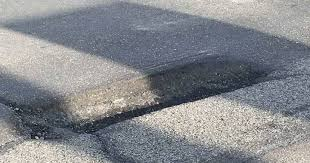

Images\users\kles90105\257_data_set\extra614.jpg


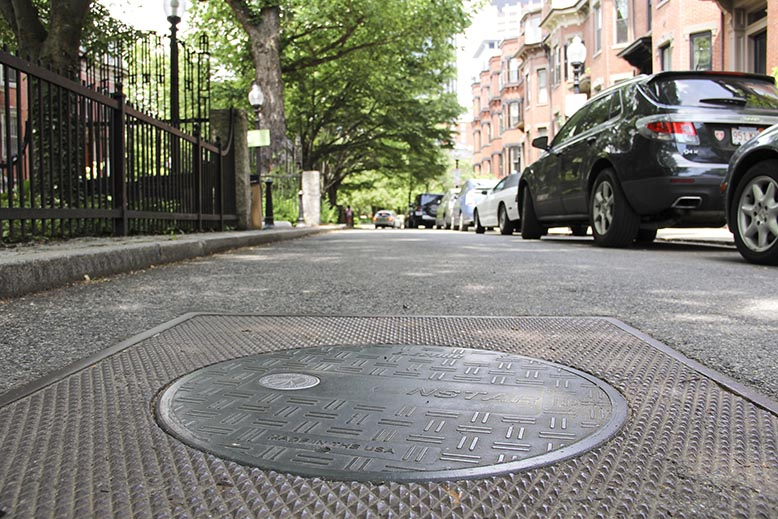

Images\users\kles90105\257_data_set\pothole_neg153.jpg


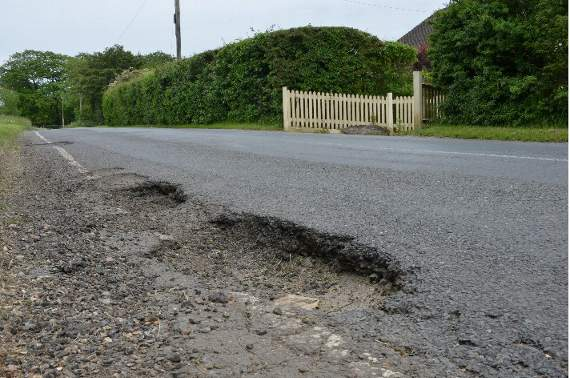

Images\users\kles90105\257_data_set\pwy0085.jpg


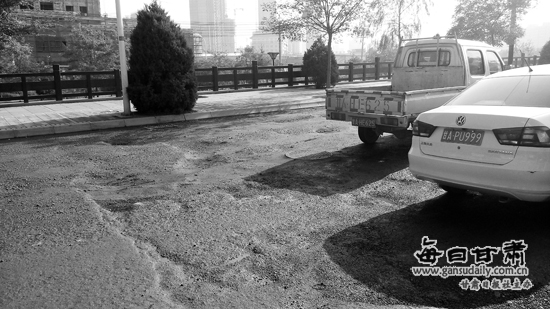

Images\users\kles90105\257_data_set\241p.jpg


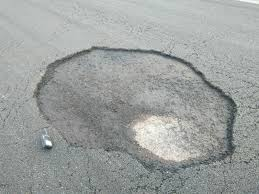

Images\users\kles90105\Positive Images\95.jpg


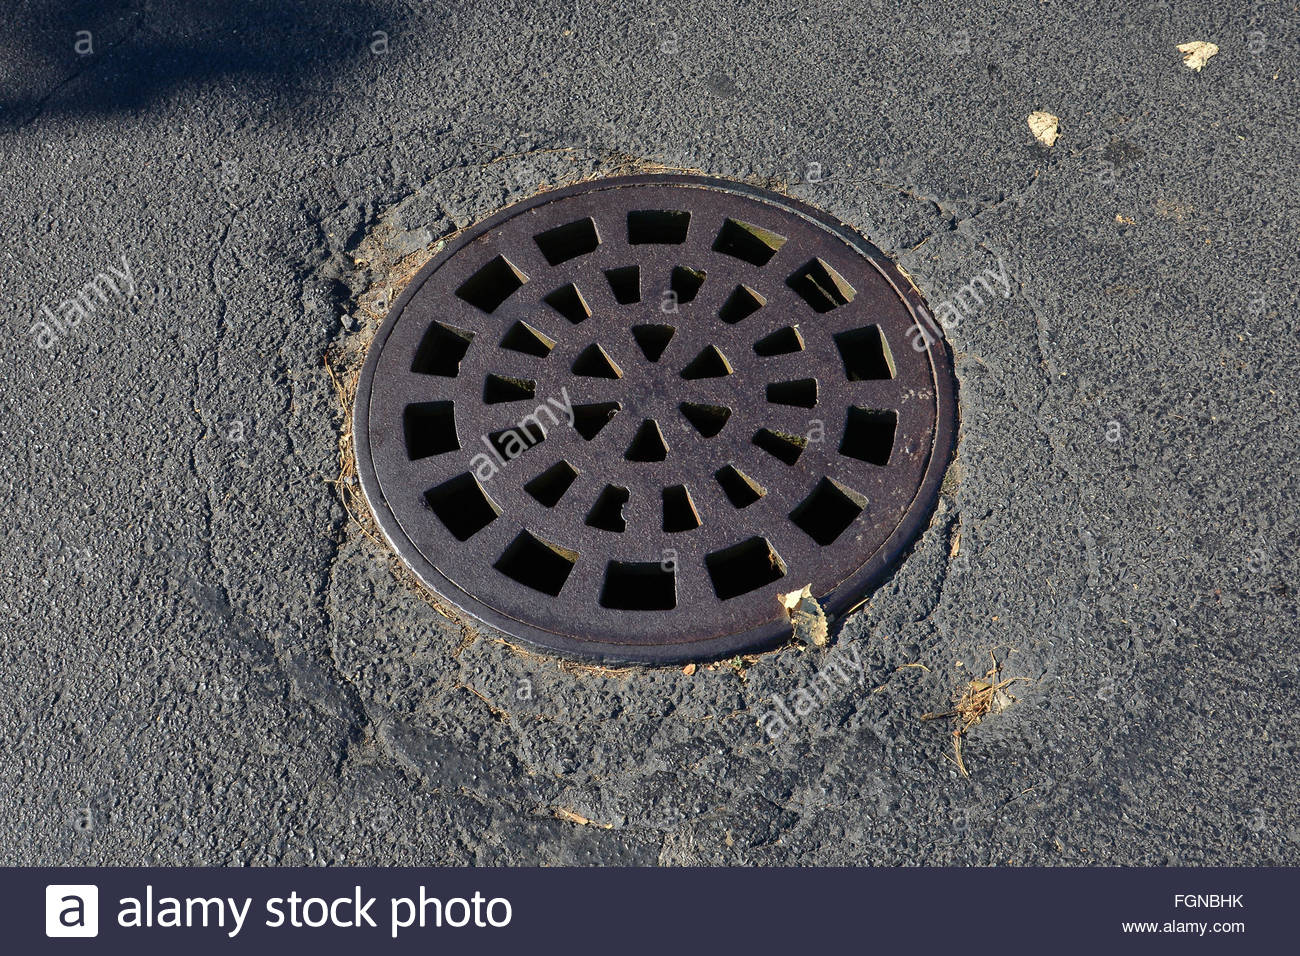

Images\users\kles90105\257_data_set\pothole_neg121.jpg


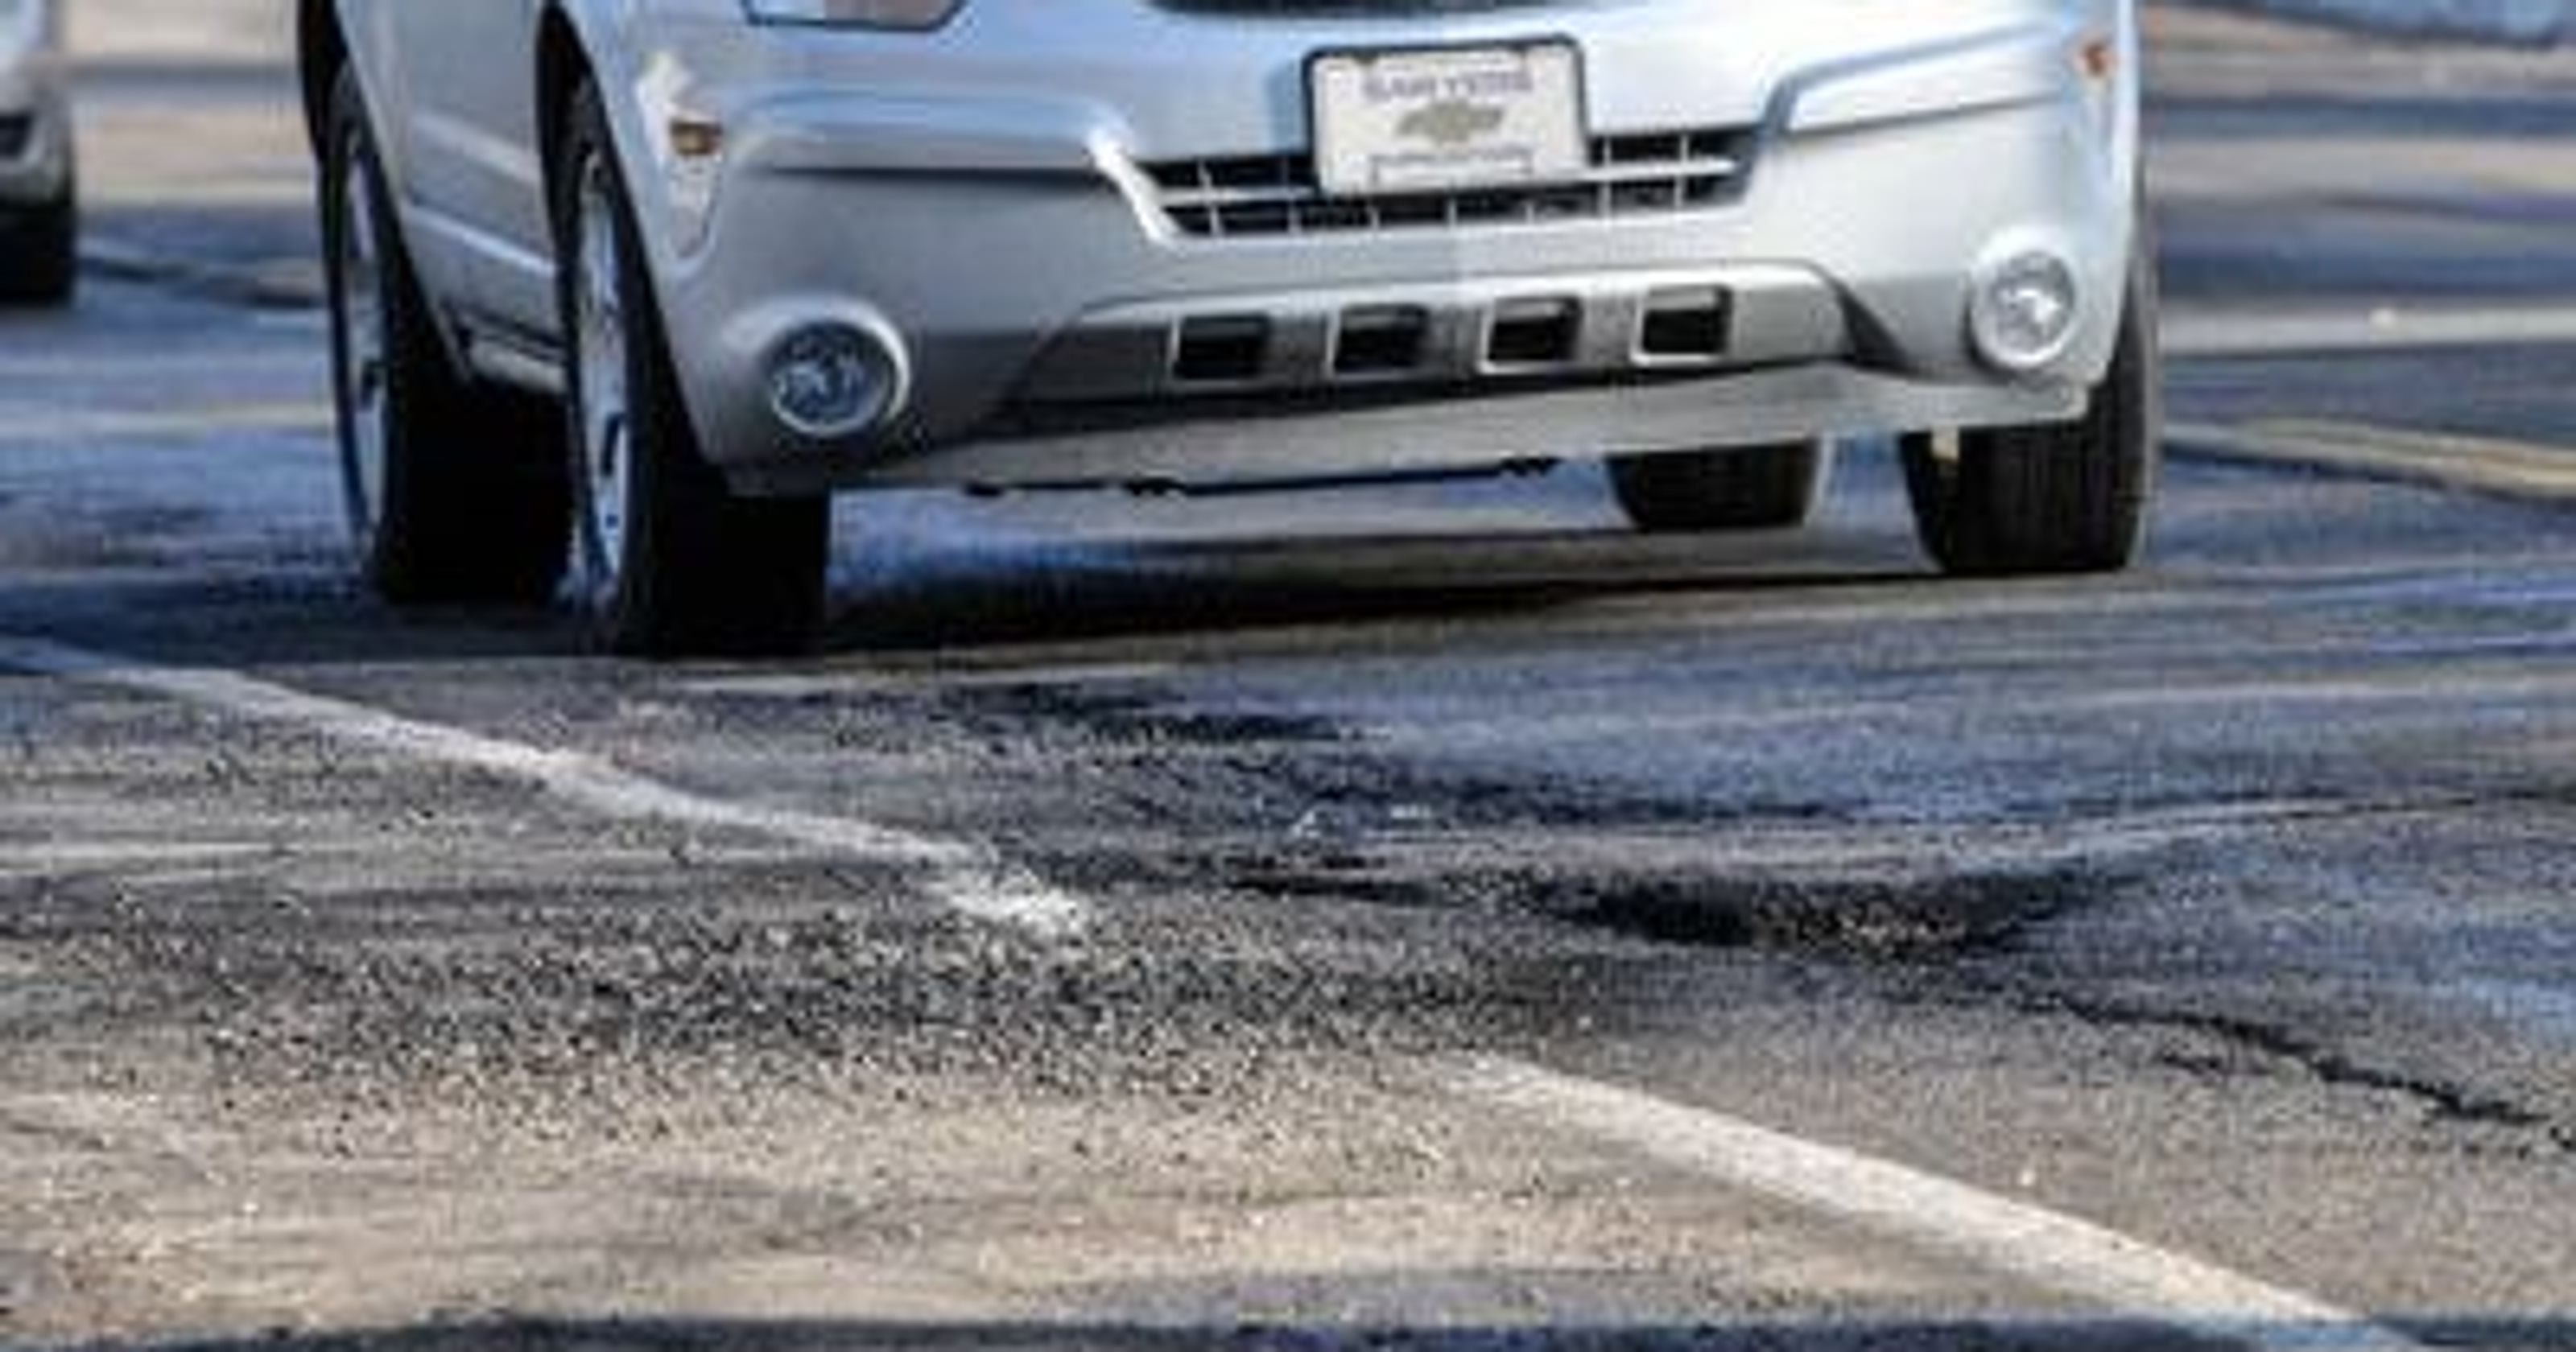

Images\users\kles90105\257_data_set\pothole_pos107.jpg


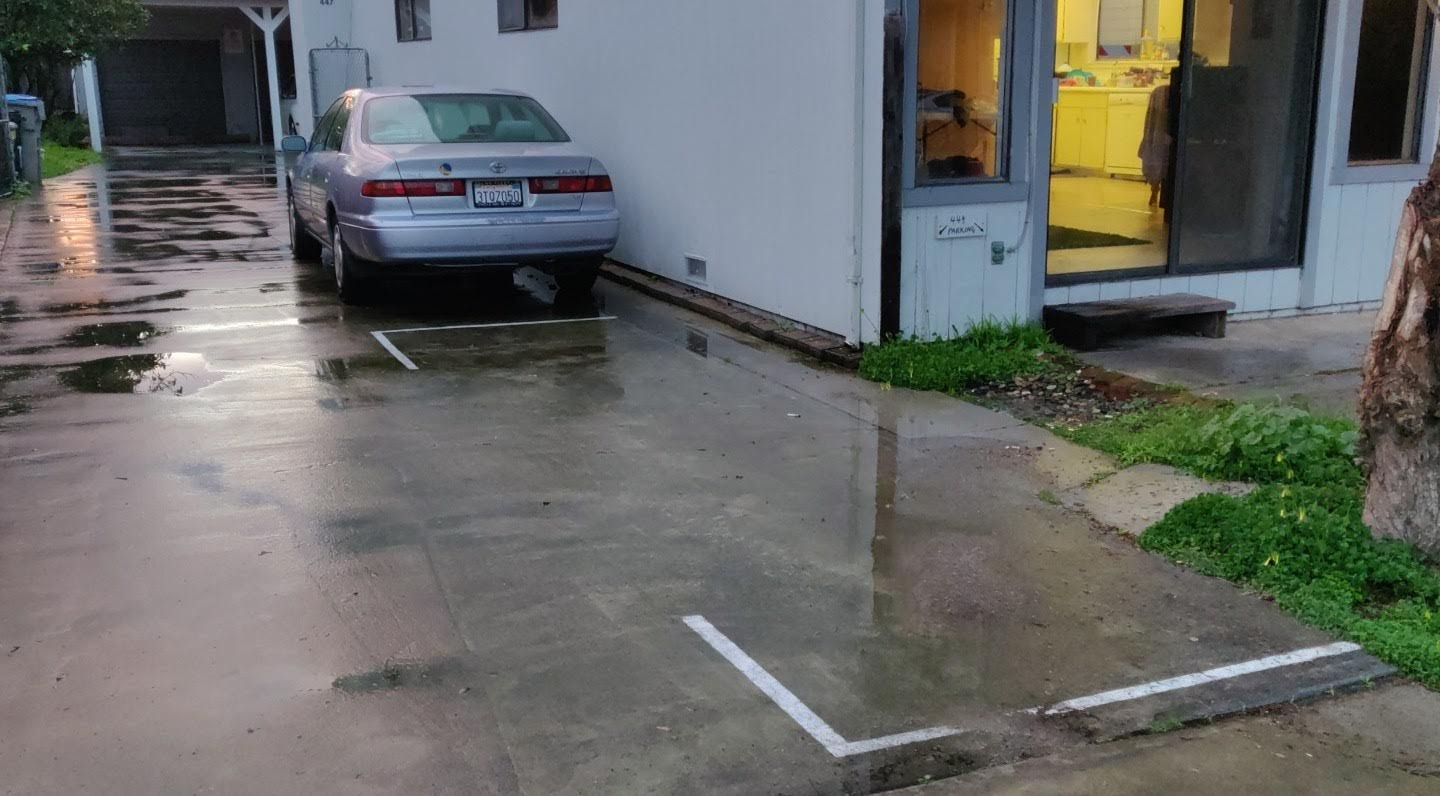

Images\users\kles90105\Negative Images\15.jpg


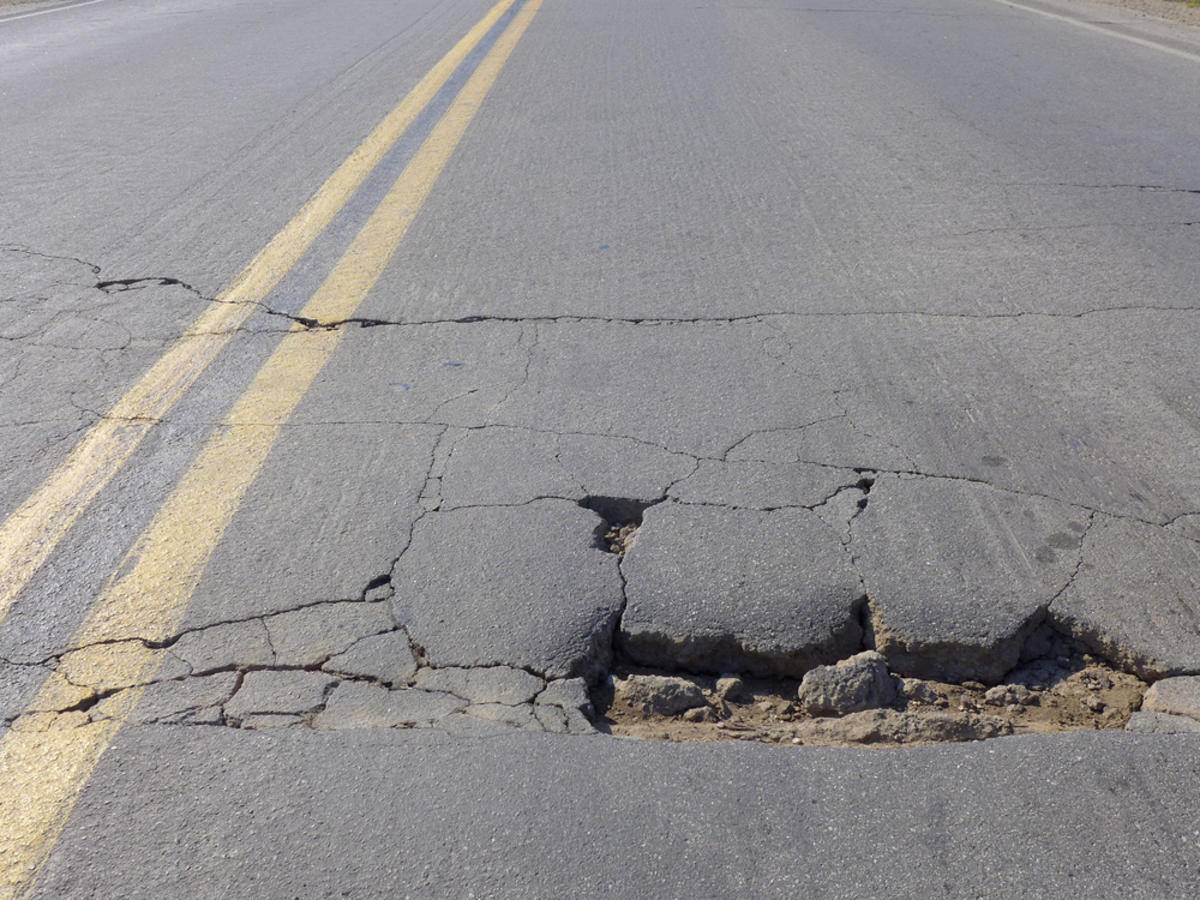

Images\users\kles90105\257_data_set\pothole_pos518.jpg


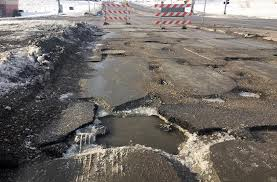

Images\users\kles90105\257_data_set\extra230.jpg


In [6]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

## Prepare training data

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    x_list = []
    y_list = []
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(all_image_paths[i])
        if(str(co.find("./name").text) == 'no pothole'):
            outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        elif(str(co.find("./name").text) == 'pothole'):
            if(co.find("./attributes").text == None):
                outfile = 'training_objects/pothole3-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole%s-%s.png' % (str(co.find("./attributes").text), str(uuid.uuid4()))
        else:
            if(str(co.find("./name").text) == 'pothole1' or str(co.find("./name").text) == 'pothole2' 
               or str(co.find("./name").text) == 'pothole3' or str(co.find("./name").text) == 'pothole4'):
                outfile = 'training_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
            elif(str(co.find("./name").text) == 'crack'):
                outfile = 'training_objects/pothole1-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((480, 480)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 1200
object
name : paint
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:48
id : 0
polygon
username : anonymous
pt
x : 836
y : 508
pt
x : 825
y : 513
pt
x : 1052
y : 621
pt
x : 1089
y : 616
pt
x : 1074
y : 600

paint
point
836 508
point
825 513
point
1052 621
point
1089 616
point
1074 600
top-left 825 508
bottom-right 1089 621

Save as: training_objects/pothole0-19b4daf3-ece4-43a0-8ace-a2442f59fa57.png

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
p

Save as: training_objects/pothole2-dae27e0e-4cd9-4212-87a4-d3743867611a.png

filename : 107n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 683
ncols : 1024
object
name : pattern
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:07:48
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 371
y : 446
pt
x : 606
y : 446
pt
x : 606
y : 679
pt
x : 371
y : 679

pattern
point
371 446
point
606 446
point
606 679
point
371 679
top-left 371 446
bottom-right 606 679

Save as: training_objects/pothole0-71af15a7-78a5-4b3b-aa6d-1755a38d8c4f.png

filename : 107p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 184
ncols : 326
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:19
id : 0
type : bounding_box
polygon
username : Be

Save as: training_objects/pothole1-f50a8909-6e69-467e-8f6e-fec8af409964.png

filename : 112n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 640
ncols : 640
object
name : manhole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:10:00
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 412
y : 398
pt
x : 437
y : 398
pt
x : 437
y : 410
pt
x : 412
y : 410

manhole
point
412 398
point
437 398
point
437 410
point
412 410
top-left 412 398
bottom-right 437 410

Save as: training_objects/pothole0-c680a215-9901-499f-8d52-eb00ed7ddfae.png

filename : 112p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 193
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:58
id : 0
type : bounding_box
polygon
username : Ber

Save as: training_objects/pothole3-06364fed-eeb8-4893-bdc2-baf8bf4266af.png

pothole3
point
126 16
point
158 16
point
158 30
point
126 30
top-left 126 16
bottom-right 158 30

Save as: training_objects/pothole3-08d03765-8051-435f-8f26-01e277c74ebb.png

pothole3
point
118 46
point
151 46
point
151 66
point
118 66
top-left 118 46
bottom-right 151 66

Save as: training_objects/pothole3-50f7f993-6ae6-4874-a350-cd2c3e874c1b.png

pothole3
point
25 32
point
94 32
point
94 76
point
25 76
top-left 25 32
bottom-right 94 76

Save as: training_objects/pothole3-4b400d72-7f55-4ba2-b76b-4adcc9576932.png

pothole3
point
13 110
point
44 110
point
44 130
point
13 130
top-left 13 110
bottom-right 44 130

Save as: training_objects/pothole3-5b9c20a3-646a-4946-94ff-a54557d50747.png

pothole3
point
3 135
point
46 135
point
46 157
point
3 157
top-left 3 135
bottom-right 46 157

Save as: training_objects/pothole3-b26c0aa5-fcc4-4e18-9b3e-8b1203df4719.png

pothole3
point
58 107
point
75 107
point
75 112
point
58 

Save as: training_objects/pothole4-d2a70ac3-7ae1-497a-883e-21303e4f1f2f.png

filename : 121p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 287
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:47:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 145
y : 91
pt
x : 281
y : 91
pt
x : 281
y : 158
pt
x : 145
y : 158
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:47:16
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 66
y : 99
pt
x : 80
y : 99
pt
x : 80
y : 104
pt
x : 66
y : 104

pothole1
point
145 91
point
281 91
point
281 158
point
145 158
top-left 145 91
bottom-right 281 158

Save as: training_objects/pothole1-9ac8dc9e-8346-4a5e-8ca4-984b9d3ca5c1.png

pothole2
point
66 99
point
80 99
point
80 104
point
66 104
top-left 66 99
b

Save as: training_objects/pothole2-eeb88a87-eba1-4314-a7e5-64d0c632afd7.png

pothole2
point
258 26
point
243 22
point
258 19
point
268 22
top-left 243 19
bottom-right 268 26

Save as: training_objects/pothole2-6dabef40-e637-457e-a6ba-d495fe6f8d20.png

pothole1
point
2 71
point
81 71
point
81 153
point
2 153
top-left 2 71
bottom-right 81 153

Save as: training_objects/pothole1-b8ce28f1-d380-4b68-a3a9-ba2e9138d220.png

pothole1
point
77 27
point
151 11
point
164 15
point
87 32
top-left 77 11
bottom-right 164 32

Save as: training_objects/pothole1-7a5c17ac-a837-4e96-880c-9cb4791f7a63.png

pothole0
point
271 56
point
295 56
point
295 78
point
271 78
top-left 271 56
bottom-right 295 78

Save as: training_objects/pothole0-045451a1-1b07-48b0-af73-296443ca706e.png

filename : 130p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 256
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None


filename : 138p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 189
ncols : 267
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:57:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 61
pt
x : 214
y : 61
pt
x : 214
y : 186
pt
x : 15
y : 186

pothole3
point
15 61
point
214 61
point
214 186
point
15 186
top-left 15 61
bottom-right 214 186

Save as: training_objects/pothole3-9ab52341-932b-4dc6-9327-766eab3c3298.png

filename : 139p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 304
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:56:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 96
y : 42
pt
x : 227
y : 42
pt
x : 227
y : 111
pt
x : 96
y : 111
object
name : pothole1
del

Save as: training_objects/pothole1-86ed17fd-d6cd-49e4-999f-d2ff2f845a0e.png

filename : 144p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 194
ncols : 259
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:03
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 103
y : 38
pt
x : 134
y : 38
pt
x : 134
y : 52
pt
x : 103
y : 52
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:07
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 43
y : 21
pt
x : 66
y : 21
pt
x : 66
y : 31
pt
x : 43
y : 31

pothole2
point
103 38
point
134 38
point
134 52
point
103 52
top-left 103 38
bottom-right 134 52

Save as: training_objects/pothole2-19fa70ee-6f79-43f1-b57e-20434d0628d3.png

pothole2
point
43 21
point
66 21
point
66 31
point
43 31
top-left 43 21
bottom-righ

filename : 151p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 275
ncols : 183
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:04
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 18
y : 174
pt
x : 151
y : 174
pt
x : 151
y : 223
pt
x : 18
y : 223

pothole2
point
18 174
point
151 174
point
151 223
point
18 223
top-left 18 174
bottom-right 151 223

Save as: training_objects/pothole2-8f959bc8-bbae-40c3-8e0f-bc1ade54dd22.png

filename : 152p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 674
ncols : 1200
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:13:52
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 244
y : 77
pt
x : 1115
y : 77
pt
x : 1115
y : 637
pt
x : 244
y : 637

pothole3
point

filename : 158p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:17:55
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 62
y : 85
pt
x : 269
y : 85
pt
x : 269
y : 186
pt
x : 62
y : 186

pothole3
point
62 85
point
269 85
point
269 186
point
62 186
top-left 62 85
bottom-right 269 186

Save as: training_objects/pothole3-2aaf9b18-5cc4-41a7-bcf8-8ebccc050cdf.png

filename : 159p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 370
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 52
y : 25
pt
x : 303
y : 25
pt
x : 303
y : 147
pt
x : 52
y : 147

pothole2
point
52 25
poin

filename : 168p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 174
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:39
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 41
y : 32
pt
x : 127
y : 32
pt
x : 127
y : 79
pt
x : 41
y : 79

pothole3
point
41 32
point
127 32
point
127 79
point
41 79
top-left 41 32
bottom-right 127 79

Save as: training_objects/pothole3-012d2d91-1c61-43a2-ac02-12110ec4106a.png

filename : 169p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 186
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:50
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 29
y : 45
pt
x : 111
y : 45
pt
x : 111
y : 98
pt
x : 29
y : 98
object
name : pothole1
deleted :

Save as: training_objects/pothole3-8f3624a6-fd81-40c1-969b-1dd2b43244f3.png

filename : 175p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 219
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:31
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 80
y : 73
pt
x : 126
y : 73
pt
x : 126
y : 120
pt
x : 80
y : 120
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:35
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 97
y : 50
pt
x : 112
y : 50
pt
x : 112
y : 57
pt
x : 97
y : 57

pothole3
point
80 73
point
126 73
point
126 120
point
80 120
top-left 80 73
bottom-right 126 120

Save as: training_objects/pothole3-56b4bb7e-937a-4e69-981b-9ddc0ff87779.png

pothole3
point
97 50
point
112 50
point
112 57
point
97 57
top-left 97 50
bottom-

Save as: training_objects/pothole3-682e3113-20d4-426b-b3d1-2a99f88ee6f4.png

pothole
point
133 215
point
208 215
point
208 229
point
133 229
top-left 133 215
bottom-right 208 229

Save as: training_objects/pothole3-28002c5c-fbb8-4392-8b89-29f849065b7a.png

pothole
point
75 240
point
311 240
point
311 338
point
75 338
top-left 75 240
bottom-right 311 338

Save as: training_objects/pothole3-1b946904-36ba-4d6c-9968-26ea48d27dd8.png

pothole
point
229 209
point
307 209
point
307 234
point
229 234
top-left 229 209
bottom-right 307 234

Save as: training_objects/pothole3-f5f82b66-b4c7-4720-9a39-380d6c2cce28.png

pothole
point
323 206
point
413 206
point
413 228
point
323 228
top-left 323 206
bottom-right 413 228

Save as: training_objects/pothole3-3cfcd036-1d4e-4327-99a1-befba7349651.png

pothole
point
344 247
point
414 247
point
414 272
point
344 272
top-left 344 247
bottom-right 414 272

Save as: training_objects/pothole2-97413965-ed57-4caa-8d7a-918ca0574544.png

pothole
point
41 226
point

Save as: training_objects/pothole3-ac51af7c-5cda-4aca-979c-a7d3e300f112.png

filename : 186p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 412
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:40:30
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 512
y : 187
pt
x : 263
y : 187
pt
x : 263
y : 271
pt
x : 512
y : 271
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 06:57:28
id : 1
polygon
username : Shiyan Cai
pt
x : 13
y : 329
pt
x : 39
y : 369
pt
x : 256
y : 260
pt
x : 242
y : 246
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 06:57:43
id : 2
polygon
username : Shiyan Cai
pt
x : 314
y : 290
pt
x : 104
y : 412
pt
x : 62
y : 411
pt
x : 271
y : 283



Save as: training_objects/pothole1-32c50bd4-ce54-495f-8f3a-c13418f9d04f.png

filename : 195p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:33
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 207
pt
x : 281
y : 207
pt
x : 281
y : 244
pt
x : 232
y : 244
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:38
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 267
y : 154
pt
x : 320
y : 154
pt
x : 320
y : 166
pt
x : 267
y : 166

pothole
point
232 207
point
281 207
point
281 244
point
232 244
top-left 232 207
bottom-right 281 244

Save as: training_objects/pothole3-ba90cbf2-4738-4dda-b457-86f5cdf3ffa2.png

pothole
point
267 154
point
320 154
point
320 166
po

filename : 200p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 334
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:13
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 129
y : 204
pt
x : 364
y : 204
pt
x : 364
y : 312
pt
x : 129
y : 312
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:19
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 124
y : 146
pt
x : 239
y : 146
pt
x : 239
y : 195
pt
x : 124
y : 195
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:06:24
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 241
y : 121
pt
x : 288
y : 121
pt
x : 288
y : 135
pt
x : 241
y : 135

pothole
point
129 204
point
364 20

Save as: training_objects/pothole1-e54e82e4-dab9-4303-bd25-85e952bad3b9.png

filename : 208p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 374
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:09:06
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 229
pt
x : 299
y : 229
pt
x : 299
y : 248
pt
x : 232
y : 248
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:09:14
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 138
y : 162
pt
x : 384
y : 162
pt
x : 384
y : 197
pt
x : 138
y : 197

pothole
point
232 229
point
299 229
point
299 248
point
232 248
top-left 232 229
bottom-right 299 248

Save as: training_objects/pothole3-f43b02c2-b7cf-4253-8019-967d70a6146e.png

pothole
point
138 162
point
384 162
point
384 197
po

Save as: training_objects/pothole3-74cb030e-d562-46f5-8327-3b52e6a39ca9.png

filename : 21n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 177
ncols : 235
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:08:20
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 6
y : 105
pt
x : 108
y : 105
pt
x : 108
y : 168
pt
x : 6
y : 168

pothole0
point
6 105
point
108 105
point
108 168
point
6 168
top-left 6 105
bottom-right 108 168

Save as: training_objects/pothole0-8a0527ee-83fb-4a84-b6f9-11282a204e1e.png

filename : 21p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 435
ncols : 608
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:41:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 34
y : 313


filename : 224p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:15:55
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 345
y : 66
pt
x : 6
y : 66
pt
x : 6
y : 220
pt
x : 345
y : 220

pothole
point
345 66
point
6 66
point
6 220
point
345 220
top-left 6 66
bottom-right 345 220

Save as: training_objects/pothole4-f9ce3a1c-312d-43d5-83a2-1321ebea8c31.png

filename : 225p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 205
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:16:12
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 254
y : 68
pt
x : 49
y : 68
pt
x : 49
y : 203
pt
x : 254
y : 203

pothole

Save as: training_objects/pothole3-c5819aba-3699-4f3f-921f-bb5b55e77888.png

pothole
point
302 106
point
446 106
point
446 142
point
302 142
top-left 302 106
bottom-right 446 142

Save as: training_objects/pothole3-02943ac6-af7a-4db6-bc5a-40dc1213f33d.png

pothole
point
453 153
point
598 153
point
598 255
point
453 255
top-left 453 153
bottom-right 598 255

Save as: training_objects/pothole3-c70a4e33-0c58-4105-8f2a-a8b99b457a19.png

filename : 232p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 400
ncols : 533
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:18:57
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 48
y : 319
pt
x : 234
y : 319
pt
x : 234
y : 374
pt
x : 48
y : 374
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:19:01
id : 1
t

filename : 239p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 242
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:21:05
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 32
y : 109
pt
x : 340
y : 109
pt
x : 340
y : 172
pt
x : 32
y : 172

pothole
point
32 109
point
340 109
point
340 172
point
32 172
top-left 32 109
bottom-right 340 172

Save as: training_objects/pothole3-d2bb5c5d-43fa-4df2-9aa5-f122d03c1a28.png

filename : 23n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 262
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:24
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 214
y : 108
pt
x : 243
y : 108
pt
x : 243
y : 161
pt
x : 214
y : 161

pothol

filename : 250p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 375
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:23:03
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 64
y : 142
pt
x : 391
y : 142
pt
x : 391
y : 283
pt
x : 64
y : 283

pothole
point
64 142
point
391 142
point
391 283
point
64 283
top-left 64 142
bottom-right 391 283

Save as: training_objects/pothole3-96b2d2eb-5c52-4c8c-929e-7358cc20edbf.png

filename : 251p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 307
ncols : 306
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:23:07
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 30
y : 235
pt
x : 151
y : 235
pt
x : 151
y : 279
pt
x : 30
y : 

filename : 25n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 248
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:44
id : 0
polygon
username : Bert
pt
x : 107
y : 124
pt
x : 108
y : 164
pt
x : 246
y : 165
pt
x : 125
y : 124

pothole0
point
107 124
point
108 164
point
246 165
point
125 124
top-left 107 124
bottom-right 246 165

Save as: training_objects/pothole0-ff23ec87-0de8-4f27-885e-e84ecb24c13f.png

filename : 25p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 768
ncols : 1024
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:49:50
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 123
y : 114
pt
x : 963
y : 114
pt
x : 963
y : 427
pt
x : 123
y : 427
object
name : pothole0
deleted :

Save as: training_objects/pothole3-0be833f0-a419-4304-a15d-7e6825f45e87.png

filename : 271p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 200
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:24
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 93
y : 108
pt
x : 288
y : 108
pt
x : 288
y : 156
pt
x : 93
y : 156

pothole
point
93 108
point
288 108
point
288 156
point
93 156
top-left 93 108
bottom-right 288 156

Save as: training_objects/pothole3-2f6acdd4-2a07-40a9-be44-ff1adee80bdc.png

filename : 272p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 403
ncols : 540
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:34
id : 0
type : bounding_box
polygon
username : Shiy

filename : 283p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:18
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 234
y : 155
pt
x : 298
y : 155
pt
x : 298
y : 225
pt
x : 234
y : 225
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:23
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 272
y : 93
pt
x : 301
y : 93
pt
x : 301
y : 152
pt
x : 272
y : 152
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:26
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 305
y : 156
pt
x : 398
y : 156
pt
x : 398
y : 185
pt
x : 305
y : 185

pothole
point
234 155
point
298 155


Save as: training_objects/pothole3-43ec22cd-d52c-4d96-9053-078f479407ff.png

pothole
point
2 94
point
48 94
point
48 127
point
2 127
top-left 2 94
bottom-right 48 127

Save as: training_objects/pothole2-576e2a34-5f9d-4453-b95e-8c9afae5a1be.png

filename : 293p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:30:36
id : 0
polygon
username : Shiyan Cai
pt
x : 392
y : 181
pt
x : 229
y : 309
pt
x : 443
y : 328
pt
x : 537
y : 198
pt
x : 398
y : 175

pothole
point
392 181
point
229 309
point
443 328
point
537 198
point
398 175
top-left 229 175
bottom-right 537 328

Save as: training_objects/pothole3-4c2c10df-1081-4cb0-bc56-20354188a9f3.png

filename : 294p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 610
ncols : 495
object

Save as: training_objects/pothole3-25c019de-2633-47dc-82be-426023310bf5.png

pothole
point
6 204
point
256 204
point
256 559
point
6 559
top-left 6 204
bottom-right 256 559

Save as: training_objects/pothole1-fe899115-d19d-4f9b-bd60-d8824c265217.png

pothole
point
15 195
point
15 554
point
260 514
point
246 354
point
595 357
point
621 465
point
996 389
point
988 269
top-left 15 195
bottom-right 996 554

Save as: training_objects/pothole1-46e6bf8b-c483-4a8e-9584-659d7e2bd75b.png

filename : 301p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:32:54
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 219
y : 185
pt
x : 356
y : 185
pt
x : 356
y : 233
pt
x : 219
y : 233
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
isp

Save as: training_objects/pothole3-1ac38063-3304-4257-abc4-58ab2a1698f9.png

pothole
point
212 101
point
60 339
point
223 359
point
263 106
point
217 102
top-left 60 101
bottom-right 263 359

Save as: training_objects/pothole1-2e7ab657-6b0b-49df-90da-39f48c565cba.png

pothole
point
326 233
point
314 355
point
491 356
point
427 234
top-left 314 233
bottom-right 491 356

Save as: training_objects/pothole1-7231be0c-6e5d-410b-9492-2463ff0ad90d.png

filename : 307p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 675
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:35:09
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 18
y : 119
pt
x : 1149
y : 119
pt
x : 1149
y : 671
pt
x : 18
y : 671

pothole
point
18 119
point
1149 119
point
1149 671
point
18 671
top-left 18 119
bottom-right 1149 671

Save as: training_objects/potho

Save as: training_objects/pothole1-fe4000b9-081a-4b96-b1f7-7f5a7048ed4e.png

filename : 315p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 400
ncols : 630
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:37:44
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 256
y : 302
pt
x : 478
y : 302
pt
x : 478
y : 386
pt
x : 256
y : 386

pothole
point
256 302
point
478 302
point
478 386
point
256 386
top-left 256 302
bottom-right 478 386

Save as: training_objects/pothole4-33463e1b-e09f-4dde-9a9e-8b2b70cec05d.png

filename : 316p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 900
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:37:56
id : 0
type : bounding_box
polygon
username :

ispartof : None
date : 18-Mar-2019 07:40:41
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 271
y : 194
pt
x : 505
y : 194
pt
x : 505
y : 530
pt
x : 271
y : 530

pothole
point
271 194
point
505 194
point
505 530
point
271 530
top-left 271 194
bottom-right 505 530

Save as: training_objects/pothole3-9e571836-b7b7-459c-982a-a23b6357a527.png

filename : 326p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 263
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:40:47
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 40
y : 89
pt
x : 395
y : 89
pt
x : 395
y : 250
pt
x : 40
y : 250

pothole
point
40 89
point
395 89
point
395 250
point
40 250
top-left 40 89
bottom-right 395 250

Save as: training_objects/pothole4-74a91e5f-3754-4e04-8c1e-298dc803b26a.png

filename : 327p.jpg
folder : users/robert4213//pothole_d

filename : 335p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 634
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:42:51
id : 0
polygon
username : Shiyan Cai
pt
x : 53
y : 401
pt
x : 161
y : 575
pt
x : 797
y : 540
pt
x : 736
y : 486
pt
x : 352
y : 483
pt
x : 259
y : 380

pothole
point
53 401
point
161 575
point
797 540
point
736 486
point
352 483
point
259 380
top-left 53 380
bottom-right 797 575

Save as: training_objects/pothole3-6a5c892b-ffcb-41d3-a114-fd23716d14df.png

filename : 336p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 256
ncols : 410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:43:04
id : 0
polygon
username : Shiyan Cai
pt
x : 230
y : 100
pt
x : 44
y : 177
pt
x 

filename : 344p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 571
ncols : 428
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:46:58
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 134
y : 82
pt
x : 284
y : 82
pt
x : 284
y : 452
pt
x : 134
y : 452

pothole
point
134 82
point
284 82
point
284 452
point
134 452
top-left 134 82
bottom-right 284 452

Save as: training_objects/pothole3-b724c21e-1c75-4869-82e8-120f6be9201b.png

filename : 345p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 404
ncols : 720
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:03
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 228
y : 134
pt
x : 432
y : 134
pt
x : 432
y : 196
pt
x : 228
y 

Save as: training_objects/pothole0-e47122e3-909d-43db-b1d7-309520851e23.png

filename : 37p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 337
ncols : 600
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:59:20
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 218
y : 184
pt
x : 371
y : 184
pt
x : 371
y : 277
pt
x : 218
y : 277
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:59:29
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 195
y : 96
pt
x : 221
y : 96
pt
x : 221
y : 108
pt
x : 195
y : 108

pothole1
point
218 184
point
371 184
point
371 277
point
218 277
top-left 218 184
bottom-right 371 277

Save as: training_objects/pothole1-97891dff-8086-44df-a7c7-167b0d1d0d72.png

pothole2
point
195 96
point
221 96
point
221 108
point
195

Save as: training_objects/pothole0-cd1fffd8-af8f-4385-9d80-9214d600ea3f.png

filename : 41p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 405
ncols : 611
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:01:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 264
y : 276
pt
x : 377
y : 276
pt
x : 377
y : 298
pt
x : 264
y : 298

pothole3
point
264 276
point
377 276
point
377 298
point
264 298
top-left 264 276
bottom-right 377 298

Save as: training_objects/pothole3-9a391616-4cbe-40b3-9026-dfa2d8866ab6.png

filename : 42n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 301
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x :

Save as: training_objects/pothole4-29d56d0c-f035-475a-9570-f085865cf977.png

pothole3
point
50 253
point
191 253
point
191 289
point
50 289
top-left 50 253
bottom-right 191 289

Save as: training_objects/pothole3-e3af9df8-0117-4cf3-8269-b4a9555365db.png

pothole3
point
695 217
point
778 217
point
778 260
point
695 260
top-left 695 217
bottom-right 778 260

Save as: training_objects/pothole3-afdd7067-9ccc-445e-975a-a56b1df9ffcc.png

pothole3
point
613 146
point
666 146
point
666 166
point
613 166
top-left 613 146
bottom-right 666 166

Save as: training_objects/pothole3-89c02e4a-0206-4490-afd1-8745c270ca64.png

pothole3
point
537 143
point
592 143
point
592 161
point
537 161
top-left 537 143
bottom-right 592 161

Save as: training_objects/pothole3-68ab7c8b-2996-4a49-ab65-18c549fff5a1.png

pothole3
point
409 175
point
464 175
point
464 196
point
409 196
top-left 409 175
bottom-right 464 196

Save as: training_objects/pothole3-a34d7232-8039-4e4f-bea6-2adffb3a4a21.png

pothole3
point
330 18

Save as: training_objects/pothole3-cf9c7119-b378-4e62-8e14-fdde87e48501.png

pothole1
point
118 110
point
194 110
point
194 158
point
118 158
top-left 118 110
bottom-right 194 158

Save as: training_objects/pothole1-79a3c4fc-2097-4419-8ccf-c1bc80ae31e3.png

filename : 56n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 222
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:14:59
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 16
y : 62
pt
x : 194
y : 62
pt
x : 194
y : 122
pt
x : 16
y : 122

pothole0
point
16 62
point
194 62
point
194 122
point
16 122
top-left 16 62
bottom-right 194 122

Save as: training_objects/pothole0-86aaf15e-f9c4-470f-b7d2-54795e59d6dd.png

filename : 56p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 160
ncols : 251
object
name : pothole2
deleted : 0
ver

filename : 5p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 216
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:45
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 5
y : 62
pt
x : 89
y : 62
pt
x : 89
y : 102
pt
x : 5
y : 102
object
name : pothole2
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:52
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 14
y : 9
pt
x : 201
y : 9
pt
x : 201
y : 116
pt
x : 14
y : 116
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:58
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 128
y : 62
pt
x : 140
y : 62
pt
x : 140
y : 73
pt
x : 128
y : 73
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attribut

Save as: training_objects/pothole1-463cdfda-7e63-4a73-b464-5d56cc5def06.png

filename : 63n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 307
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:25:03
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 70
y : 59
pt
x : 115
y : 59
pt
x : 115
y : 88
pt
x : 70
y : 88

pothole0
point
70 59
point
115 59
point
115 88
point
70 88
top-left 70 59
bottom-right 115 88

Save as: training_objects/pothole0-68db3ead-2ada-49eb-9abf-ba5c5d53db11.png

filename : 63p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 176
ncols : 255
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:58:26
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 111
y : 98
pt
x : 200

Save as: training_objects/pothole0-7480fd7c-23f4-4746-85ca-12769bc9e6b2.png

filename : 72p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 151
ncols : 244
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 59
y : 103
pt
x : 120
y : 103
pt
x : 120
y : 124
pt
x : 59
y : 124
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:12
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 208
y : 93
pt
x : 243
y : 93
pt
x : 243
y : 127
pt
x : 208
y : 127

pothole2
point
59 103
point
120 103
point
120 124
point
59 124
top-left 59 103
bottom-right 120 124

Save as: training_objects/pothole2-0767f150-89a9-4efd-95ef-93e5c84f8173.png

pothole1
point
208 93
point
243 93
point
243 127
point
208 127
top-left 2

Save as: training_objects/pothole3-9f2f5a9f-636d-4325-9a64-6630abf99870.png

pothole2
point
98 121
point
114 121
point
114 130
point
98 130
top-left 98 121
bottom-right 114 130

Save as: training_objects/pothole2-f9aec66b-6168-4b6d-b99f-97d83cf577ec.png

pothole2
point
102 107
point
112 107
point
112 115
point
102 115
top-left 102 107
bottom-right 112 115

Save as: training_objects/pothole2-fec33f18-2f6c-4007-af10-1f9a8ec2559d.png

pothole1
point
40 155
point
128 155
point
128 191
point
40 191
top-left 40 155
bottom-right 128 191

Save as: training_objects/pothole1-d7719463-9b02-4271-b56b-f47eb1c428e5.png

filename : 77n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 624
ncols : 1000
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:46:03
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 251
y : 439
pt
x : 346
y : 439
pt
x : 3

Save as: training_objects/pothole2-e541ae28-3d38-4cff-9971-14e56889f1e9.png

pothole3
point
341 148
point
401 148
point
401 174
point
341 174
top-left 341 148
bottom-right 401 174

Save as: training_objects/pothole3-d2130f13-b769-4ca7-9759-a9a6263bade7.png

pothole2
point
352 188
point
365 188
point
365 211
point
352 211
top-left 352 188
bottom-right 365 211

Save as: training_objects/pothole2-3d7cde04-3611-49fd-873e-c902263b7e1c.png

pothole1
point
365 130
point
436 130
point
436 152
point
365 152
top-left 365 130
bottom-right 436 152

Save as: training_objects/pothole1-279b5920-2092-4dd7-981d-5f810c2f23ae.png

pothole1
point
112 279
point
219 279
point
219 346
point
112 346
top-left 112 279
bottom-right 219 346

Save as: training_objects/pothole1-d98b6ac1-c9f6-496f-a7ef-f4b3216f4559.png

filename : 82n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 710
ncols : 1060
object
name : pothole_lv1
deleted : 0
verified : 0
occluded

Save as: training_objects/pothole0-4824f647-80c8-4d2f-bb4e-3770aeed0c5f.png

shadow
point
637 333
point
622 337
point
606 345
point
590 356
point
584 367
point
577 378
point
576 381
point
639 381
top-left 576 333
bottom-right 639 381

Save as: training_objects/pothole0-5fa115ec-82c3-4398-86e0-f9dc540d6e37.png

shadow
point
371 183
point
322 191
point
330 193
point
374 188
top-left 322 183
bottom-right 374 193

Save as: training_objects/pothole0-f1bcb307-6a55-41e7-9630-cd15f15bf34b.png

shadow
point
367 176
point
276 186
point
284 190
point
376 181
top-left 276 176
bottom-right 376 190

Save as: training_objects/pothole0-037f68c9-30e7-44af-b7db-eb26354a8d50.png

filename : 88p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 199
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:23:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x

Save as: training_objects/pothole1-63961d94-f7b4-4dd0-9683-bcfaf2648a71.png

filename : 96n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 779
ncols : 1280
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:00:55
id : 0
polygon
username : anonymous
pt
x : 1276
y : 687
pt
x : 1228
y : 678
pt
x : 1242
y : 700
pt
x : 1268
y : 714
pt
x : 1280
y : 714

shadow
point
1276 687
point
1228 678
point
1242 700
point
1268 714
point
1280 714
top-left 1228 678
bottom-right 1280 714

Save as: training_objects/pothole0-433ebede-b8dd-4e36-be0c-ba6c243ce5ad.png

filename : 96p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 160
ncols : 213
object
name : pothole0
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:25:33
id : 0
type : bounding_box


Save as: training_objects/pothole2-555b143d-57c7-4b51-82f0-3cc2e3f5257a.png

filename : extra104.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 192
ncols : 262
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:27:29
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 243
y : 121
pt
x : 34
y : 121
pt
x : 34
y : 19
pt
x : 243
y : 19

pothole2
point
243 121
point
34 121
point
34 19
point
243 19
top-left 34 19
bottom-right 243 121

Save as: training_objects/pothole2-1eef934e-acca-4d75-bd5a-d3effdbba9fd.png

filename : extra105.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:27:34
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 202
y : 

filename : extra127.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 149
ncols : 263
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:31:28
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 215
y : 128
pt
x : 93
y : 128
pt
x : 93
y : 84
pt
x : 215
y : 84

pothole0
point
215 128
point
93 128
point
93 84
point
215 84
top-left 93 84
bottom-right 215 128

Save as: training_objects/pothole0-5b899614-ba69-418f-a09b-6b1566dcf536.png

filename : extra128.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:31:32
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 218
y : 162
pt
x : 64
y : 162
pt
x : 64
y : 93
pt
x : 218
y : 93

pothole1
point
218 

Save as: training_objects/pothole0-e386b975-d311-4e2c-a457-0d041a441751.png

pothole1
point
151 117
point
74 117
point
74 82
point
151 82
top-left 74 82
bottom-right 151 117

Save as: training_objects/pothole1-e5d9b427-deed-4fe1-8d36-9f5093a2505c.png

filename : extra14.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:11:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 229
y : 154
pt
x : 83
y : 154
pt
x : 83
y : 88
pt
x : 229
y : 88

pothole3
point
229 154
point
83 154
point
83 88
point
229 88
top-left 83 88
bottom-right 229 154

Save as: training_objects/pothole3-27f184b0-1b0c-440f-a921-8a94bd54def7.png

filename : extra140.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 287
object
name : pothole0
deleted : 0
verified

filename : extra150.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 176
ncols : 286
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:34:24
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 138
y : 164
pt
x : 90
y : 164
pt
x : 90
y : 146
pt
x : 138
y : 146
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:34:28
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 169
y : 145
pt
x : 140
y : 145
pt
x : 140
y : 135
pt
x : 169
y : 135
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:34:33
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 39
y : 138
pt
x : 135
y : 138
pt
x : 135
y : 101
pt
x : 39
y : 101

pothole2
point
138 164
point
90 164
point

filename : extra16.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 300
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:11:38
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 222
y : 95
pt
x : 140
y : 95
pt
x : 140
y : 71
pt
x : 222
y : 71

pothole4
point
222 95
point
140 95
point
140 71
point
222 71
top-left 140 71
bottom-right 222 95

Save as: training_objects/pothole4-b3a2d614-e941-4b26-85e1-3a3150427eae.png

filename : extra160.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:37:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 233
y : 179
pt
x : 7
y : 179
pt
x : 7
y : 73
pt
x : 233
y : 73
object
name : pothole3


top-left 43 56
bottom-right 274 103

Save as: training_objects/pothole2-093ed9c3-1b65-42e9-ab52-97516b3e7e93.png

filename : extra177.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:43:17
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 203
y : 170
pt
x : 168
y : 170
pt
x : 168
y : 144
pt
x : 203
y : 144
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:43:23
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 126
y : 129
pt
x : 151
y : 129
pt
x : 151
y : 138
pt
x : 126
y : 138

pothole2
point
203 170
point
168 170
point
168 144
point
203 144
top-left 168 144
bottom-right 203 170

Save as: training_objects/pothole2-e5278318-e2d6-4930-9428-469e89d7aeaf.png

pothole2
point
126 1

Save as: training_objects/pothole2-19b89453-cd88-435b-9e7b-a4d1be720fb2.png

pothole3
point
185 153
point
138 153
point
138 135
point
185 135
top-left 138 135
bottom-right 185 153

Save as: training_objects/pothole3-ab52936e-029d-4567-a773-31ea0f453c3e.png

pothole3
point
161 118
point
233 118
point
233 130
point
161 130
top-left 161 118
bottom-right 233 130

Save as: training_objects/pothole3-0affbddd-5663-40c4-aa2c-4b03f02b68ab.png

pothole3
point
241 118
point
189 118
point
189 106
point
241 106
top-left 189 106
bottom-right 241 118

Save as: training_objects/pothole3-a12254fd-748e-420c-a6b5-1b1eb2e5471e.png

pothole3
point
158 110
point
189 110
point
189 119
point
158 119
top-left 158 110
bottom-right 189 119

Save as: training_objects/pothole3-f2b18589-b05f-429a-81d3-4d9d70101dbd.png

pothole3
point
161 107
point
99 107
point
99 97
point
161 97
top-left 99 97
bottom-right 161 107

Save as: training_objects/pothole3-381a5e6c-4a1b-4cf1-9cd0-0935892a5451.png

pothole3
point
178 171
p

Save as: training_objects/pothole0-c2baac77-c351-4b6f-820a-6a9193f9daf2.png

filename : extra196.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 177
ncols : 284
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:47:00
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 221
y : 164
pt
x : 19
y : 164
pt
x : 19
y : 77
pt
x : 221
y : 77

pothole3
point
221 164
point
19 164
point
19 77
point
221 77
top-left 19 77
bottom-right 221 164

Save as: training_objects/pothole3-a82068ac-9332-4655-baaf-f65df1d7813d.png

filename : extra197.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 397
ncols : 855
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:47:06
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 589
y : 

filename : extra208.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 535
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:48:16
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 577
y : 523
pt
x : 432
y : 523
pt
x : 432
y : 401
pt
x : 577
y : 401

pothole1
point
577 523
point
432 523
point
432 401
point
577 401
top-left 432 401
bottom-right 577 523

Save as: training_objects/pothole1-9ae75e2f-e6a5-4c38-a750-c1395fd34d7c.png

filename : extra209.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 318
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:48:21
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 228
y : 117
pt
x : 75
y : 117
pt
x : 75
y : 48
pt
x : 228
y : 48

pothole2


Save as: training_objects/pothole3-be4ca80a-b864-43cc-820a-b516d447572a.png

pothole2
point
457 504
point
79 504
point
79 386
point
457 386
top-left 79 386
bottom-right 457 504

Save as: training_objects/pothole2-000c3e40-0a0c-4e28-86b0-9c129e904e36.png

pothole2
point
510 396
point
927 396
point
927 532
point
510 532
top-left 510 396
bottom-right 927 532

Save as: training_objects/pothole2-ce97f205-9b14-4bcd-bda7-27d9acffae72.png

filename : extra215.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 292
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:49:37
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 184
y : 117
pt
x : 129
y : 117
pt
x : 129
y : 96
pt
x : 184
y : 96
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:49:42
id : 1
type : 

filename : extra231.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 20:15:35
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 237
y : 164
pt
x : 131
y : 164
pt
x : 131
y : 103
pt
x : 237
y : 103

pothole3
point
237 164
point
131 164
point
131 103
point
237 103
top-left 131 103
bottom-right 237 164

Save as: training_objects/pothole3-c6d0aba2-9076-4b99-a1b2-13f4aad86162.png

filename : extra232.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 300
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 20:15:42
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 237
y : 160
pt
x : 16
y : 160
pt
x : 16
y : 97
pt
x : 237
y : 97

pothole1


Save as: training_objects/pothole3-d39b99d2-1617-47b5-b5cb-8d68665a8c48.png

pothole1
point
253 178
point
190 178
point
190 109
point
253 109
top-left 190 109
bottom-right 253 178

Save as: training_objects/pothole1-b9632550-3f4a-46aa-a5d9-65b07be5078a.png

filename : extra250.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 176
ncols : 286
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 20:18:49
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 275
y : 174
pt
x : 43
y : 174
pt
x : 43
y : 115
pt
x : 275
y : 115

pothole3
point
275 174
point
43 174
point
43 115
point
275 115
top-left 43 115
bottom-right 275 174

Save as: training_objects/pothole3-93192240-0fcd-45e4-aa79-3d856e778b6c.png

filename : extra251.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 300
object
name : pothole1
deleted 

Save as: training_objects/pothole3-afeebba5-e968-449b-ad07-9ada511a0eb3.png

pothole3
point
147 37
point
211 37
point
211 56
point
147 56
top-left 147 37
bottom-right 211 56

Save as: training_objects/pothole3-e48fcad6-6c28-4fae-810a-42e69956fda1.png

pothole3
point
50 118
point
1 118
point
1 83
point
50 83
top-left 1 83
bottom-right 50 118

Save as: training_objects/pothole3-76610cf7-7d56-4dff-a829-6327308ba9b3.png

filename : extra259.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 22:51:33
id : 0
polygon
username : mike
pt
x : 46
y : 135
pt
x : 42
y : 160
pt
x : 88
y : 169
pt
x : 140
y : 151
pt
x : 143
y : 129
pt
x : 132
y : 123
pt
x : 108
y : 120
pt
x : 86
y : 123
pt
x : 69
y : 125
pt
x : 51
y : 133

pothole3
point
46 135
point
42 160
point
88 169
point
140 151
point
143 129
point
132 123
point

filename : extra269.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 194
ncols : 259
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 20:21:59
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 225
y : 159
pt
x : 115
y : 159
pt
x : 115
y : 134
pt
x : 225
y : 134
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 20:22:06
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 108
y : 167
pt
x : 190
y : 167
pt
x : 190
y : 179
pt
x : 108
y : 179

pothole2
point
225 159
point
115 159
point
115 134
point
225 134
top-left 115 134
bottom-right 225 159

Save as: training_objects/pothole2-bcd2d2f1-ebd0-4a91-8361-2f9db400ffc6.png

pothole2
point
108 167
point
190 167
point
190 179
point
108 179
top-left 108 167
bottom-right 190 179

Save as: training_objects/poth

Save as: training_objects/pothole1-7c5ed242-60d2-4701-8417-731168fea41d.png

filename : extra282.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 225
ncols : 169
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 22:57:01
id : 0
polygon
username : mike
pt
x : 130
y : 106
pt
x : 84
y : 77
pt
x : 52
y : 113
pt
x : 24
y : 175
pt
x : 66
y : 178
pt
x : 116
y : 169
pt
x : 135
y : 143

pothole1
point
130 106
point
84 77
point
52 113
point
24 175
point
66 178
point
116 169
point
135 143
top-left 24 77
bottom-right 135 178

Save as: training_objects/pothole1-48dca91b-440f-43a2-9872-724d59f69180.png

filename : extra283.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 259
ncols : 194
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 22:57:12
id : 0
poly

Save as: training_objects/pothole2-481dcf11-b749-4bee-99ce-fe6df2d5f191.png

filename : extra35.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 171
ncols : 295
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:18:05
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 262
y : 153
pt
x : 2
y : 153
pt
x : 2
y : 61
pt
x : 262
y : 61

pothole4
point
262 153
point
2 153
point
2 61
point
262 61
top-left 2 61
bottom-right 262 153

Save as: training_objects/pothole4-cb1fdd7d-497d-48e9-87e3-397915dc24d8.png

filename : extra36.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 262
ncols : 192
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:18:11
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 186
y : 244
pt


Save as: training_objects/pothole2-cedf3e2d-9664-43a2-b3dc-ab9bf38e4060.png

filename : extra392.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:08:33
id : 0
polygon
username : mike
pt
x : 321
y : 300
pt
x : 425
y : 305
pt
x : 420
y : 415
pt
x : 256
y : 429
pt
x : 256
y : 336

pothole1
point
321 300
point
425 305
point
420 415
point
256 429
point
256 336
top-left 256 300
bottom-right 425 429

Save as: training_objects/pothole1-725a7ece-933f-4462-8a60-942de01ad308.png

filename : extra393.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:08:49
id : 0
polygon
username : mike
pt
x : 343
y : 340
pt
x : 478
y : 

object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:11:06
id : 0
polygon
username : mike
pt
x : 226
y : 194
pt
x : 703
y : 281
pt
x : 654
y : 593
pt
x : 43
y : 539
pt
x : 52
y : 249

pothole1
point
226 194
point
703 281
point
654 593
point
43 539
point
52 249
top-left 43 194
bottom-right 703 593

Save as: training_objects/pothole1-9b3d301b-1126-4dbe-9153-e1540db30e31.png

filename : extra404.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:11:29
id : 0
polygon
username : mike
pt
x : 422
y : 303
pt
x : 530
y : 309
pt
x : 555
y : 387
pt
x : 527
y : 413
pt
x : 320
y : 389
pt
x : 340
y : 343

pothole1
point
422 303
point
530 309
point
555 387
point
527 413
point
320 389
point
340 343
top-left 320 303
bottom-right 

716 279
point
657 315
point
565 359
point
440 398
point
321 439
point
187 461
point
118 461
point
44 459
point
6 457
point
1 412
point
21 389
point
65 359
point
120 332
point
162 320
point
247 330
point
315 339
point
371 331
point
413 318
point
447 280
point
449 236
point
432 218
point
398 209
point
349 203
point
322 185
point
321 155
point
339 125
point
384 108
point
433 100
top-left 1 100
bottom-right 760 461

Save as: training_objects/pothole3-ee68a818-f618-4d20-9f19-76499d974acd.png

filename : extra418.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 162
ncols : 312
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:27:17
id : 0
polygon
username : anonymous
pt
x : 151
y : 50
pt
x : 183
y : 64
pt
x : 201
y : 84
pt
x : 207
y : 109
pt
x : 193
y : 133
pt
x : 140
y : 150
pt
x : 81
y : 152
pt
x : 37
y : 146
pt
x : 9
y : 133
pt
x : 3
y : 116
pt
x : 10
y : 98
pt
x 

filename : extra426.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:28:26
id : 0
polygon
username : anonymous
pt
x : 394
y : 109
pt
x : 361
y : 153
pt
x : 279
y : 304
pt
x : 242
y : 407
pt
x : 242
y : 490
pt
x : 266
y : 553
pt
x : 314
y : 589
pt
x : 364
y : 597
pt
x : 409
y : 598
pt
x : 452
y : 581
pt
x : 485
y : 544
pt
x : 517
y : 461
pt
x : 533
y : 428
pt
x : 549
y : 362
pt
x : 556
y : 290
pt
x : 548
y : 215
pt
x : 532
y : 159
pt
x : 505
y : 130
pt
x : 455
y : 117

pothole3
point
394 109
point
361 153
point
279 304
point
242 407
point
242 490
point
266 553
point
314 589
point
364 597
point
409 598
point
452 581
point
485 544
point
517 461
point
533 428
point
549 362
point
556 290
point
548 215
point
532 159
point
505 130
point
455 117
top-left 242 109
bottom-right 556 598

Save as: training_ob

top-left 8 117
bottom-right 796 568

Save as: training_objects/pothole4-aa42df54-0a36-471e-b460-1e9ac90fe858.png

filename : extra439.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:29:58
id : 0
polygon
username : anonymous
pt
x : 355
y : 174
pt
x : 494
y : 179
pt
x : 583
y : 255
pt
x : 628
y : 420
pt
x : 572
y : 492
pt
x : 276
y : 505
pt
x : 124
y : 373
pt
x : 153
y : 274
pt
x : 273
y : 198

pothole4
point
355 174
point
494 179
point
583 255
point
628 420
point
572 492
point
276 505
point
124 373
point
153 274
point
273 198
top-left 124 174
bottom-right 628 505

Save as: training_objects/pothole4-89fe1054-10a3-40c8-8d04-fd02b657e9bb.png

filename : extra44.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole2
deleted :

filename : extra453.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:32:22
id : 0
polygon
username : anonymous
pt
x : 356
y : 305
pt
x : 430
y : 309
pt
x : 455
y : 353
pt
x : 425
y : 414
pt
x : 311
y : 418
pt
x : 204
y : 395
pt
x : 183
y : 353
pt
x : 248
y : 315

pothole1
point
356 305
point
430 309
point
455 353
point
425 414
point
311 418
point
204 395
point
183 353
point
248 315
top-left 183 305
bottom-right 455 418

Save as: training_objects/pothole1-0b494674-0b98-4586-b526-7525d0a66f2c.png

filename : extra454.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:32:28
id : 0
polygon
username : anonymous
pt

filename : extra465.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:35:27
id : 0
polygon
username : anonymous
pt
x : 550
y : 295
pt
x : 377
y : 338
pt
x : 259
y : 419
pt
x : 230
y : 501
pt
x : 309
y : 550
pt
x : 507
y : 562
pt
x : 649
y : 557
pt
x : 713
y : 522
pt
x : 745
y : 460
pt
x : 771
y : 397
pt
x : 766
y : 335
pt
x : 708
y : 302
pt
x : 619
y : 301
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 16:35:32
id : 1
polygon
username : anonymous
pt
x : 16
y : 280
pt
x : 137
y : 272
pt
x : 189
y : 303
pt
x : 184
y : 383
pt
x : 88
y : 394
pt
x : 29
y : 393
pt
x : 16
y : 395
pt
x : 11
y : 280

pothole4
point
550 295
point
377 338
point
259 419
point
230 501
point
309 550
point
507 562
point
649 557
point
713 52

Save as: training_objects/pothole3-916858e1-49e4-4600-aff5-7048abe8b0ca.png

filename : extra48.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 335
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:20:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 332
y : 143
pt
x : 167
y : 143
pt
x : 167
y : 10
pt
x : 332
y : 10
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:20:07
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 17
y : 37
pt
x : 202
y : 37
pt
x : 202
y : 148
pt
x : 17
y : 148

pothole3
point
332 143
point
167 143
point
167 10
point
332 10
top-left 167 10
bottom-right 332 143

Save as: training_objects/pothole3-33700c8d-8f91-432b-b56c-71285dbb2af7.png

pothole1
point
17 37
point
202 37
point
202 148
point
17 148
top-le

343 454
point
315 404
point
322 350
point
363 312
top-left 315 303
bottom-right 623 476

Save as: training_objects/pothole2-e4678711-548c-49c4-ac3e-09b02cf14383.png

filename : extra492.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 19:40:11
id : 0
polygon
username : anonymous
pt
x : 381
y : 87
pt
x : 481
y : 94
pt
x : 571
y : 122
pt
x : 653
y : 169
pt
x : 688
y : 265
pt
x : 666
y : 348
pt
x : 555
y : 386
pt
x : 436
y : 374
pt
x : 340
y : 345
pt
x : 292
y : 279
pt
x : 299
y : 176
pt
x : 352
y : 119

pothole2
point
381 87
point
481 94
point
571 122
point
653 169
point
688 265
point
666 348
point
555 386
point
436 374
point
340 345
point
292 279
point
299 176
point
352 119
top-left 292 87
bottom-right 688 386

Save as: training_objects/pothole2-d599a551-4f25-4a44-b8b2-e0a554905ddc.png

filename : ex

Save as: training_objects/pothole3-522203fa-ec6c-4564-b109-f171e9a7a570.png

filename : extra502.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:14:45
id : 0
polygon
username : mike
pt
x : 474
y : 190
pt
x : 557
y : 395
pt
x : 435
y : 424
pt
x : 140
y : 369
pt
x : 138
y : 219
pt
x : 328
y : 170

pothole1
point
474 190
point
557 395
point
435 424
point
140 369
point
138 219
point
328 170
top-left 138 170
bottom-right 557 424

Save as: training_objects/pothole1-fe065719-1f88-40c0-b957-de218c1b0af4.png

filename : extra503.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:14:51
id : 0
polygon
username : mike
p

filename : extra522.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:19:24
id : 0
polygon
username : mike
pt
x : 123
y : 34
pt
x : 168
y : 28
pt
x : 201
y : 33
pt
x : 237
y : 68
pt
x : 241
y : 93
pt
x : 233
y : 117
pt
x : 203
y : 123
pt
x : 150
y : 112
pt
x : 107
y : 99
pt
x : 98
y : 71

pothole3
point
123 34
point
168 28
point
201 33
point
237 68
point
241 93
point
233 117
point
203 123
point
150 112
point
107 99
point
98 71
top-left 98 28
bottom-right 241 123

Save as: training_objects/pothole3-a335fe82-340c-4c8b-b19f-4d088ca25ff0.png

filename : extra523.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 168
ncols : 299
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:1

Save as: training_objects/pothole1-bf0361ea-17d8-417e-8fd9-6b550dfc98ae.png

filename : extra539.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 149
ncols : 339
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:25:16
id : 0
polygon
username : mike
pt
x : 93
y : 44
pt
x : 148
y : 37
pt
x : 198
y : 37
pt
x : 247
y : 53
pt
x : 277
y : 80
pt
x : 283
y : 106
pt
x : 270
y : 120
pt
x : 229
y : 129
pt
x : 171
y : 128
pt
x : 142
y : 117
pt
x : 103
y : 103
pt
x : 67
y : 89
pt
x : 62
y : 80
pt
x : 69
y : 60
pt
x : 86
y : 49

pothole4
point
93 44
point
148 37
point
198 37
point
247 53
point
277 80
point
283 106
point
270 120
point
229 129
point
171 128
point
142 117
point
103 103
point
67 89
point
62 80
point
69 60
point
86 49
top-left 62 37
bottom-right 283 129

Save as: training_objects/pothole4-975ac63e-067d-409c-aaee-4de21e9277d3.png

filename : extra54.jpg
folder : u

Save as: training_objects/pothole2-0bd46e02-913d-45dc-95c1-3a21022f69c6.png

filename : extra551.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:35:42
id : 0
polygon
username : mike
pt
x : 399
y : 301
pt
x : 558
y : 297
pt
x : 602
y : 529
pt
x : 426
y : 578
pt
x : 210
y : 477
pt
x : 343
y : 340

pothole2
point
399 301
point
558 297
point
602 529
point
426 578
point
210 477
point
343 340
top-left 210 297
bottom-right 602 578

Save as: training_objects/pothole2-50b1b85f-55de-43ac-8bf3-d2842ac67f97.png

filename : extra552.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:35:52
id : 0
polygon
username : mike
p

Save as: training_objects/pothole2-dad12c52-6636-4cb3-af65-9af115ee66c1.png

filename : extra564.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:37:48
id : 0
polygon
username : mike
pt
x : 248
y : 277
pt
x : 689
y : 103
pt
x : 770
y : 150
pt
x : 756
y : 172
pt
x : 761
y : 245
pt
x : 758
y : 279
pt
x : 288
y : 437

pothole2
point
248 277
point
689 103
point
770 150
point
756 172
point
761 245
point
758 279
point
288 437
top-left 248 103
bottom-right 770 437

Save as: training_objects/pothole2-d7c8585d-3766-450f-83ae-b5262679047f.png

filename : extra565.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:37:54

filename : extra576.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:39:10
id : 0
polygon
username : mike
pt
x : 305
y : 163
pt
x : 300
y : 379
pt
x : 481
y : 375
pt
x : 504
y : 145

pothole2
point
305 163
point
300 379
point
481 375
point
504 145
top-left 300 145
bottom-right 504 379

Save as: training_objects/pothole2-42314c24-71d6-45b5-838b-018e554a02ba.png

filename : extra577.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:39:19
id : 0
polygon
username : mike
pt
x : 605
y : 162
pt
x : 426
y : 514
pt
x : 724
y : 517
pt
x : 757
y : 174

pothole1
point
605 162
point
426 514
point
724 517
point
757 174
to

Save as: training_objects/pothole2-9ff8c4e3-0b2f-4086-a04b-226e88cb42af.png

filename : extra59.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:20:37
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 242
y : 178
pt
x : 20
y : 178
pt
x : 20
y : 98
pt
x : 242
y : 98

pothole3
point
242 178
point
20 178
point
20 98
point
242 98
top-left 20 98
bottom-right 242 178

Save as: training_objects/pothole3-bf226f83-1b15-4539-a0b8-75a0bc1dab71.png

filename : extra590.jpg
folder : users/myu121//newdata2
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 09-May-2019 23:42:23
id : 0
polygon
username : mike
pt
x : 334
y : 267
pt
x : 407
y : 258
pt
x : 51

Save as: training_objects/pothole3-13d6d05e-5955-4d5d-a310-6f44ee4a498b.png

pothole1
point
0 151
point
191 151
point
191 256
point
0 256
top-left 0 151
bottom-right 191 256

Save as: training_objects/pothole1-d561f227-f8f7-461a-8672-514caf30868c.png

filename : extra608.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:35:20
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 71
y : 105
pt
x : 193
y : 105
pt
x : 193
y : 142
pt
x : 71
y : 142
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:35:28
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 236
y : 3
pt
x : 2
y : 3
pt
x : 2
y : 100
pt
x : 236
y : 100

pothole3
point
71 105
point
193 105
point
193 142
point
71 142
t

Save as: training_objects/pothole0-673c231e-4178-499d-8cbf-5d16be0ae6cd.png

filename : extra622.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 167
ncols : 301
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:37:23
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 173
y : 73
pt
x : 284
y : 73
pt
x : 284
y : 148
pt
x : 173
y : 148

pothole3
point
173 73
point
284 73
point
284 148
point
173 148
top-left 173 73
bottom-right 284 148

Save as: training_objects/pothole3-c43ab339-0d0f-418b-bd6b-ab6cfc976de4.png

filename : extra623.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 138
ncols : 365
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:37:31
id : 0
type : bounding_box
polygon
username : an

Save as: training_objects/pothole3-290a989d-24f8-46d3-a3d7-3f91ed8a479f.png

pothole1
point
83 71
point
244 71
point
244 189
point
83 189
top-left 83 71
bottom-right 244 189

Save as: training_objects/pothole1-f60a90f9-bdd5-4ac8-8eaa-348e758e301b.png

filename : extra642.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 169
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:39:53
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 27
y : 65
pt
x : 145
y : 65
pt
x : 145
y : 191
pt
x : 27
y : 191

pothole2
point
27 65
point
145 65
point
145 191
point
27 191
top-left 27 65
bottom-right 145 191

Save as: training_objects/pothole2-41cdb509-aa24-4412-be53-e8201ebd64a3.png

filename : extra643.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 194
ncols : 259
object
name : pothole2
d

Save as: training_objects/pothole3-f9a1fe07-9a5a-4354-b22d-e4e26a1aa0d9.png

filename : extra652.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 203
ncols : 248
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:41:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 65
y : 76
pt
x : 167
y : 76
pt
x : 167
y : 117
pt
x : 65
y : 117

pothole3
point
65 76
point
167 76
point
167 117
point
65 117
top-left 65 76
bottom-right 167 117

Save as: training_objects/pothole3-4166de2d-41cf-4d91-b385-2d19a9576327.png

filename : extra653.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 168
ncols : 300
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:41:25
id : 0
type : bounding_box
polygon
username : anonymo

Save as: training_objects/pothole3-3ba36138-6b3f-4757-a0a9-4e57f529a817.png

filename : extra667.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 194
ncols : 259
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:42:36
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 57
y : 87
pt
x : 195
y : 87
pt
x : 195
y : 151
pt
x : 57
y : 151

pothole3
point
57 87
point
195 87
point
195 151
point
57 151
top-left 57 87
bottom-right 195 151

Save as: training_objects/pothole3-4fd04def-9be0-4a46-adc3-e05b89591046.png

filename : extra668.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 194
ncols : 259
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:42:41
id : 0
type : bounding_box
polygon
username : anonymo

filename : extra679.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 194
ncols : 259
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:46:27
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 12
y : 45
pt
x : 257
y : 45
pt
x : 257
y : 131
pt
x : 12
y : 131
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:46:30
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 217
y : 104
pt
x : 252
y : 104
pt
x : 252
y : 124
pt
x : 217
y : 124
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:46:34
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 52
y : 116
pt
x : 17
y : 116
pt
x : 17
y : 125
pt
x : 52
y : 125

pothole1
point
12 45
point
257 45
po

Save as: training_objects/pothole3-7e00b1b8-4102-414a-ae76-4d20a78bcbfa.png

filename : extra690.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:48:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 118
y : 83
pt
x : 258
y : 83
pt
x : 258
y : 172
pt
x : 118
y : 172
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:48:28
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 118
y : 44
pt
x : 1
y : 44
pt
x : 1
y : 181
pt
x : 118
y : 181

pothole2
point
118 83
point
258 83
point
258 172
point
118 172
top-left 118 83
bottom-right 258 172

Save as: training_objects/pothole2-94d0a535-3e0e-40d9-abed-18bdeb251e21.png

pothole0
point
118 44
point
1 44
point
1 181
point
118 181


filename : extra71.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 194
ncols : 259
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:22:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 183
y : 159
pt
x : 63
y : 159
pt
x : 63
y : 99
pt
x : 183
y : 99
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:22:07
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 256
y : 174
pt
x : 168
y : 174
pt
x : 168
y : 76
pt
x : 256
y : 76

pothole2
point
183 159
point
63 159
point
63 99
point
183 99
top-left 63 99
bottom-right 183 159

Save as: training_objects/pothole2-8de2a8e5-2f8e-42ed-a0ad-3aef44ca2f22.png

pothole1
point
256 174
point
168 174
point
168 76
point
256 76
top-left 168 76
bottom-right 256 174

Save as: training_objects/pothole1-6ee1fed6-50

filename : extra726.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 276
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:53:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 59
y : 52
pt
x : 176
y : 52
pt
x : 176
y : 105
pt
x : 59
y : 105

pothole3
point
59 52
point
176 52
point
176 105
point
59 105
top-left 59 52
bottom-right 176 105

Save as: training_objects/pothole3-4c0b2b09-6bcc-4c17-8f41-579cdc1cc45c.png

filename : extra727.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 168
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:53:56
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 140
y : 80
pt
x : 294
y : 80
pt
x : 294
y : 134
pt
x : 140
y : 134


filename : extra74.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 185
ncols : 272
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:22:28
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 214
y : 155
pt
x : 68
y : 155
pt
x : 68
y : 135
pt
x : 214
y : 135

pothole0
point
214 155
point
68 155
point
68 135
point
214 135
top-left 68 135
bottom-right 214 155

Save as: training_objects/pothole0-2c05873b-2a64-4a88-8640-629b6477e681.png

filename : extra740.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:57:53
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 3
y : 2
pt
x : 258
y : 2
pt
x : 258
y : 73
pt
x : 3
y : 73

pothole0
poi

filename : extra776.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 164
ncols : 307
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:00:10
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 14
y : 82
pt
x : 296
y : 82
pt
x : 296
y : 148
pt
x : 14
y : 148

pothole0
point
14 82
point
296 82
point
296 148
point
14 148
top-left 14 82
bottom-right 296 148

Save as: training_objects/pothole0-bb93ab15-90da-47bf-97e0-63f34b34691e.png

filename : extra777.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:00:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 2
y : 32
pt
x : 273
y : 32
pt
x : 273
y : 181
pt
x : 2
y : 181

pot

filename : extra792.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 168
ncols : 300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:02:59
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 116
y : 32
pt
x : 253
y : 32
pt
x : 253
y : 118
pt
x : 116
y : 118

pothole0
point
116 32
point
253 32
point
253 118
point
116 118
top-left 116 32
bottom-right 253 118

Save as: training_objects/pothole0-c67f2ade-73eb-455e-8f24-3fabce88a842.png

filename : extra793.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 163
ncols : 310
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:03:04
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 52
y : 7
pt
x : 300
y : 7
pt
x : 300
y : 156
pt
x : 52
y : 156

Save as: training_objects/pothole3-686d3c15-ec6d-45a3-a354-5f8b5f2a1921.png

pothole3
point
1729 1500
point
1896 1500
point
1896 1570
point
1729 1570
top-left 1729 1500
bottom-right 1896 1570

Save as: training_objects/pothole3-855a5e90-dbcd-4c97-9217-0d6d11a8255e.png

filename : extra804.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 2760
ncols : 3680
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:05:42
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1558
y : 1647
pt
x : 1865
y : 1647
pt
x : 1865
y : 1787
pt
x : 1558
y : 1787
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:05:45
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 1954
y : 1520
pt
x : 2086
y : 1520
pt
x : 2086
y : 1566
pt
x : 1954
y : 1566
object
name : potho

Save as: training_objects/pothole0-22df594b-8899-47e1-be0f-0665028abbaa.png

pothole0
point
35 1857
point
3675 1857
point
3675 2748
point
35 2748
top-left 35 1857
bottom-right 3675 2748

Save as: training_objects/pothole0-379326c1-cb06-48f2-ae77-7833e22dced7.png

filename : extra813.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 2760
ncols : 3680
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:08:49
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 2194
y : 1539
pt
x : 2454
y : 1539
pt
x : 2454
y : 1686
pt
x : 2194
y : 1686

pothole2
point
2194 1539
point
2454 1539
point
2454 1686
point
2194 1686
top-left 2194 1539
bottom-right 2454 1686

Save as: training_objects/pothole2-e7b633b1-08e9-4e8f-9898-a223aa7a5613.png

filename : extra814.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrow

filename : extra825.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 190
ncols : 265
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:11:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 25
y : 79
pt
x : 251
y : 79
pt
x : 251
y : 175
pt
x : 25
y : 175

pothole0
point
25 79
point
251 79
point
251 175
point
25 175
top-left 25 79
bottom-right 251 175

Save as: training_objects/pothole0-268d62f9-0024-40db-9e0a-8c56428b1c6f.png

filename : extra826.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:11:20
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 29
y : 80
pt
x : 274
y : 80
pt
x : 274
y : 182
pt
x : 29
y : 182

p

filename : extra844.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 179
ncols : 282
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:18:33
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 37
y : 29
pt
x : 266
y : 29
pt
x : 266
y : 166
pt
x : 37
y : 166

pothole0
point
37 29
point
266 29
point
266 166
point
37 166
top-left 37 29
bottom-right 266 166

Save as: training_objects/pothole0-8dea596b-985c-4585-a040-f7a3b0b1073a.png

filename : extra845.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 183
ncols : 275
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 04:18:37
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 54
y : 57
pt
x : 260
y : 57
pt
x : 260
y : 175
pt
x : 54
y : 175

p

filename : extra94.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:25:43
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 198
y : 136
pt
x : 108
y : 136
pt
x : 108
y : 99
pt
x : 198
y : 99

pothole0
point
198 136
point
108 136
point
108 99
point
198 99
top-left 108 99
bottom-right 198 136

Save as: training_objects/pothole0-08b080cd-8c23-4365-b450-ba4054e16a33.png

filename : extra95.jpg
folder : users/kles90105//extra2
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 19:25:48
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 223
y : 155
pt
x : 147
y : 155
pt
x : 147
y : 118
pt
x : 223
y : 118

pothole0
poi

Save as: training_objects/pothole0-2c192d6e-f150-4109-8c82-3b9106403ee1.png

filename : pothole_neg107.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 2205
ncols : 2940
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:48:46
id : 0
polygon
username : anonymous
pt
x : 475
y : 1722
pt
x : 1030
y : 1362
pt
x : 1732
y : 1538
pt
x : 1823
y : 1795
pt
x : 1623
y : 2040
pt
x : 1277
y : 2056
pt
x : 880
y : 2048
pt
x : 540
y : 1908
pt
x : 471
y : 1799

pothole0
point
475 1722
point
1030 1362
point
1732 1538
point
1823 1795
point
1623 2040
point
1277 2056
point
880 2048
point
540 1908
point
471 1799
top-left 471 1362
bottom-right 1823 2056

Save as: training_objects/pothole0-553891b1-dfa5-4e5c-b9b6-d703021eb7bf.png

filename : pothole_neg108.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1400
ncols : 2000
object
name : pothole0
delete

filename : pothole_neg12.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 348
ncols : 600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:43:46
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 36
y : 190
pt
x : 582
y : 190
pt
x : 582
y : 341
pt
x : 36
y : 341

pothole0
point
36 190
point
582 190
point
582 341
point
36 341
top-left 36 190
bottom-right 582 341

Save as: training_objects/pothole0-c9ad6993-bc96-486d-9cab-fe8c8eba78b1.png

filename : pothole_neg120.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 656
ncols : 915
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:36:27
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 418
y : 143
pt
x : 725
y : 143
pt
x : 725
y : 323
pt
x : 

Save as: training_objects/pothole1-05eca20f-1532-46a4-9948-fe3daf795279.png

filename : pothole_neg131.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 957
ncols : 1300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:40:17
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 344
y : 191
pt
x : 742
y : 191
pt
x : 742
y : 394
pt
x : 344
y : 394

pothole0
point
344 191
point
742 191
point
742 394
point
344 394
top-left 344 191
bottom-right 742 394

Save as: training_objects/pothole0-70ba5813-8298-4f07-a592-acadfc74ea77.png

filename : pothole_neg132.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 865
ncols : 1300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:40:28
id : 0
type : boundin

filename : pothole_neg141.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 795
ncols : 1086
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:41:55
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 253
y : 343
pt
x : 777
y : 343
pt
x : 777
y : 514
pt
x : 253
y : 514

pothole0
point
253 343
point
777 343
point
777 514
point
253 514
top-left 253 343
bottom-right 777 514

Save as: training_objects/pothole0-8d5503ba-14bc-43ab-af25-c858a14d89ab.png

filename : pothole_neg142.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 957
ncols : 1300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:42:00
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 551
y : 474
pt
x : 940
y : 474
pt
x

Save as: training_objects/pothole0-30f12306-3ec6-48db-9db7-92618ee45ce3.png

filename : pothole_neg157.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 454
ncols : 605
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:46:40
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 264
y : 122
pt
x : 551
y : 122
pt
x : 551
y : 282
pt
x : 264
y : 282
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:46:46
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 162
y : 131
pt
x : 3
y : 131
pt
x : 3
y : 289
pt
x : 162
y : 289

pothole0
point
264 122
point
551 122
point
551 282
point
264 282
top-left 264 122
bottom-right 551 282

Save as: training_objects/pothole0-184bb0bc-7a07-472d-a9fb-af7a4f29a63d.png

pothole0
point
162 131
point
3 131
point
3

Save as: training_objects/pothole0-2839374c-3fba-4ba5-8e83-d439c862b8ef.png

pothole0
point
374 183
point
447 183
point
447 220
point
374 220
top-left 374 183
bottom-right 447 220

Save as: training_objects/pothole0-a68fcb26-6c40-4e1b-adf9-e1344637beb8.png

pothole0
point
106 132
point
152 132
point
152 150
point
106 150
top-left 106 132
bottom-right 152 150

Save as: training_objects/pothole0-eeb8625c-5d81-419e-aeab-a54e25767137.png

pothole0
point
414 71
point
464 71
point
464 112
point
414 112
top-left 414 71
bottom-right 464 112

Save as: training_objects/pothole0-39f3b8a6-86d6-4377-b914-277b4fb60e4a.png

filename : pothole_neg163.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 461
ncols : 592
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:47:26
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 35
y : 47
pt
x : 534
y : 47

Save as: training_objects/pothole0-a2f43f5e-e615-4074-bc2d-61b237049980.png

filename : pothole_neg172.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 417
ncols : 625
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:50:22
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 162
y : 286
pt
x : 238
y : 286
pt
x : 238
y : 319
pt
x : 162
y : 319
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:30:24
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 90
y : 196
pt
x : 2
y : 196
pt
x : 2
y : 277
pt
x : 90
y : 277

pothole0
point
162 286
point
238 286
point
238 319
point
162 319
top-left 162 286
bottom-right 238 319

Save as: training_objects/pothole0-a899cc53-cddf-467f-ac13-d4b780d868c2.png

pothole0
point
90 196
point
2 196
point
2 27

filename : pothole_neg185.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 424
ncols : 636
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:09:12
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 249
y : 383
pt
x : 372
y : 383
pt
x : 372
y : 336
pt
x : 249
y : 336

sewer cover0
point
249 383
point
372 383
point
372 336
point
249 336
top-left 249 336
bottom-right 372 383

Save as: training_objects/pothole0-e684f59a-c803-4713-97f9-0384d6993a49.png

filename : pothole_neg186.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 371
ncols : 660
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:09:26
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 11
y : 17
pt
x : 638
y : 17
pt
x : 638
y : 349
p

Save as: training_objects/pothole0-378140ca-fbe3-4e52-974f-f57419ea9829.png

filename : pothole_neg198.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 200
ncols : 300
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:14:12
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 261
y : 86
pt
x : 86
y : 86
pt
x : 86
y : 131
pt
x : 261
y : 131
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:14:23
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 137
y : 45
pt
x : 29
y : 45
pt
x : 29
y : 125
pt
x : 137
y : 125

sewer cover0
point
261 86
point
86 86
point
86 131
point
261 131
top-left 86 86
bottom-right 261 131

Save as: training_objects/pothole0-21b1c84a-1f63-4400-8476-d0d7a72cc553.png

noise
point
137 45
point
29 45
point
29 125
point
137 125
to

Save as: training_objects/pothole0-9080caf3-b53f-4b48-8199-d1372a77bf2e.png

filename : pothole_neg210.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 1114
ncols : 750
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:19:17
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 235
y : 855
pt
x : 485
y : 855
pt
x : 485
y : 1056
pt
x : 235
y : 1056

sewer cover0
point
235 855
point
485 855
point
485 1056
point
235 1056
top-left 235 855
bottom-right 485 1056

Save as: training_objects/pothole0-0c8e8134-c213-4cc8-a183-2b1700ccf898.png

filename : pothole_neg211.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 1167
ncols : 750
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:19:28
id : 0
type : bounding_bo

filename : pothole_neg221.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 956
ncols : 1300
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:23:27
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 347
y : 171
pt
x : 964
y : 171
pt
x : 964
y : 672
pt
x : 347
y : 672

sewer cover0
point
347 171
point
964 171
point
964 672
point
347 672
top-left 347 171
bottom-right 964 672

Save as: training_objects/pothole0-0d52b5b5-4fd6-40a3-8587-2cfc60addaf2.png

filename : pothole_neg222.jpg
folder : users/pwy0424//pothole_extra/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 795
ncols : 1086
object
name : sewer cover0
deleted : 0
verified : 0
occluded : no
attributes : 0
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:23:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 267
y : 367
pt
x : 763
y : 367
pt
x : 7

filename : pothole_neg25.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1333
ncols : 1000
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:46:59
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 581
y : 714
pt
x : 895
y : 714
pt
x : 895
y : 882
pt
x : 581
y : 882

pothole0
point
581 714
point
895 714
point
895 882
point
581 882
top-left 581 714
bottom-right 895 882

Save as: training_objects/pothole0-d728c499-af33-47f8-a632-4caac13f7adb.png

filename : pothole_neg26.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 410
ncols : 618
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:47:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 105
y : 82
pt
x : 132
y : 82
pt
x : 132
y : 114
pt
x : 105
y : 11

Save as: training_objects/pothole0-a37a974a-01db-47a1-93a2-cdb425085542.png

filename : pothole_neg40.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1333
ncols : 1000
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:48:33
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 465
y : 355
pt
x : 785
y : 355
pt
x : 785
y : 644
pt
x : 465
y : 644

pothole0
point
465 355
point
785 355
point
785 644
point
465 644
top-left 465 355
bottom-right 785 644

Save as: training_objects/pothole0-58f4149f-6308-4cdf-973a-5179342f9243.png

filename : pothole_neg41.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 480
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:48:37
id : 0
type : bounding_box
polygon
username : 

Save as: training_objects/pothole0-aa62c30c-0148-4b6c-88d7-d2be52113058.png

filename : pothole_neg54.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 667
ncols : 1000
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:51:42
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 409
y : 408
pt
x : 583
y : 408
pt
x : 583
y : 634
pt
x : 409
y : 634

pothole0
point
409 408
point
583 408
point
583 634
point
409 634
top-left 409 408
bottom-right 583 634

Save as: training_objects/pothole0-9567972f-45fc-4b1c-b2ea-529aad508242.png

filename : pothole_neg55.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1365
ncols : 2048
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:51:47
id : 0
type : bounding_box
polygon
username :

filename : pothole_neg69.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 800
ncols : 1200
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:37:13
id : 0
polygon
username : anonymous
pt
x : 5
y : 795
pt
x : 7
y : 13
pt
x : 1185
y : 12
pt
x : 1195
y : 795

pothole0
point
5 795
point
7 13
point
1185 12
point
1195 795
top-left 5 12
bottom-right 1195 795

Save as: training_objects/pothole0-f867d223-e7c5-4262-a813-c6023ea29d30.png

filename : pothole_neg7.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 400
ncols : 300
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:43:12
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 69
y : 233
pt
x : 216
y : 233
pt
x : 216
y : 320
pt
x : 69
y : 320

pothole0
point
69 233
point
216 233

Save as: training_objects/pothole0-a224c804-b8e7-4066-8d0e-26e59140cf81.png

filename : pothole_neg82.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 417
ncols : 625
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:40:59
id : 0
polygon
username : anonymous
pt
x : 182
y : 273
pt
x : 285
y : 292
pt
x : 233
y : 337
pt
x : 107
y : 309

pothole0
point
182 273
point
285 292
point
233 337
point
107 309
top-left 107 273
bottom-right 285 337

Save as: training_objects/pothole0-6d8304ea-df34-4510-8e50-3ad441703311.png

filename : pothole_neg83.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 424
ncols : 636
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:41:49
id : 0
polygon
username : anonymous
pt
x : 262
y : 309
pt
x : 375
y : 316
pt
x : 396


Save as: training_objects/pothole0-909d6d3d-2e05-432f-84dd-82bf588d7877.png

filename : pothole_neg98.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 2525
ncols : 3835
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:46:33
id : 0
polygon
username : anonymous
pt
x : 963
y : 1718
pt
x : 3001
y : 1945
pt
x : 2959
y : 2486
pt
x : 565
y : 2341

pothole0
point
963 1718
point
3001 1945
point
2959 2486
point
565 2341
top-left 565 1718
bottom-right 3001 2486

Save as: training_objects/pothole0-2a04dd29-9b5b-42cb-b4cb-bee04376108a.png

filename : pothole_neg99.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1536
ncols : 2048
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:46:39
id : 0
polygon
username : anonymous
pt
x : 569
y : 180
pt
x : 1880

filename : pothole_pos108.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1680
ncols : 3200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:16:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 3028
y : 1620
pt
x : 178
y : 1620
pt
x : 178
y : 644
pt
x : 3028
y : 644

pothole3
point
3028 1620
point
178 1620
point
178 644
point
3028 644
top-left 178 644
bottom-right 3028 1620

Save as: training_objects/pothole3-f13ffe08-2920-4757-b188-5ec2c5565c76.png

filename : pothole_pos109.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1350
ncols : 2400
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:16:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 2172
y : 1291
pt
x : 448
y : 1291
pt
x : 448
y : 83

Save as: training_objects/pothole1-7cf954e8-0f2e-4b3f-b576-257f5e739866.png

pothole1
point
1429 1554
point
550 1554
point
550 1013
point
1429 1013
top-left 550 1013
bottom-right 1429 1554

Save as: training_objects/pothole1-e9697984-9412-4a88-acd5-02589e29fd3c.png

filename : pothole_pos117.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 401
ncols : 534
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:17:35
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 411
y : 393
pt
x : 248
y : 393
pt
x : 248
y : 164
pt
x : 411
y : 164
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:17:39
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 291
y : 156
pt
x : 154
y : 156
pt
x : 154
y : 44
pt
x : 291
y : 44
object
name : pothole1
deleted : 0
verified : 0
occ

filename : pothole_pos129.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 507
ncols : 900
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:22:45
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 782
y : 231
pt
x : 187
y : 231
pt
x : 187
y : 93
pt
x : 782
y : 93

pothole2
point
782 231
point
187 231
point
187 93
point
782 93
top-left 187 93
bottom-right 782 231

Save as: training_objects/pothole2-619abb9a-5ea9-4f0e-aec4-721617b16747.png

filename : pothole_pos13.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 448
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:55:02
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 21
y : 435
pt
x : 711
y : 435
pt
x : 711
y : 235
pt
x : 21
y : 235

pot

545 233
point
545 275
point
350 275
top-left 350 233
bottom-right 545 275

Save as: training_objects/pothole3-c4555259-d04a-4d37-b96d-d9bb501e5133.png

pothole3
point
88 255
point
314 255
point
314 306
point
88 306
top-left 88 255
bottom-right 314 306

Save as: training_objects/pothole3-17a5218d-9fc0-4206-9fd2-14835f1e4501.png

pothole3
point
81 216
point
192 216
point
192 230
point
81 230
top-left 81 216
bottom-right 192 230

Save as: training_objects/pothole3-1a42aac7-99b4-4a1d-af11-c940ec0f3b8d.png

filename : pothole_pos141.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1680
ncols : 3200
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:43:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 534
y : 1091
pt
x : 2842
y : 1091
pt
x : 2842
y : 1617
pt
x : 534
y : 1617
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes 

filename : pothole_pos153.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1080
ncols : 1920
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:45:35
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1225
y : 1075
pt
x : 44
y : 1075
pt
x : 44
y : 769
pt
x : 1225
y : 769

pothole1
point
1225 1075
point
44 1075
point
44 769
point
1225 769
top-left 44 769
bottom-right 1225 1075

Save as: training_objects/pothole1-482d47bb-2c8b-46ea-829b-fa3689dec8e4.png

filename : pothole_pos154.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 720
ncols : 1280
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:45:40
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 917
y : 441
pt
x : 338
y : 441
pt
x : 338
y : 168
pt
x : 

Save as: training_objects/pothole1-893e52f3-f4b7-46ea-a044-0c6b086fed2e.png

pothole1
point
446 246
point
322 246
point
322 162
point
446 162
top-left 322 162
bottom-right 446 246

Save as: training_objects/pothole1-3b626988-53e1-4a89-9d16-a4cdd1064cb4.png

filename : pothole_pos162.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 533
ncols : 800
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:47:21
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 509
y : 522
pt
x : 6
y : 522
pt
x : 6
y : 223
pt
x : 509
y : 223

pothole1
point
509 522
point
6 522
point
6 223
point
509 223
top-left 6 223
bottom-right 509 522

Save as: training_objects/pothole1-1dfe5e78-b803-4624-8d9b-e2baff6d44f2.png

filename : pothole_pos163.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 450
ncols : 300
object
name : pothole

filename : pothole_pos174.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 636
ncols : 1272
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 314
y : 202
pt
x : 916
y : 202
pt
x : 916
y : 473
pt
x : 314
y : 473

pothole3
point
314 202
point
916 202
point
916 473
point
314 473
top-left 314 202
bottom-right 916 473

Save as: training_objects/pothole3-145e9608-4f92-413d-a869-ed484a3c0015.png

filename : pothole_pos175.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1365
ncols : 2048
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:21
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 523
y : 802
pt
x : 1212
y : 802
pt
x : 1212
y : 1322
pt
x : 52

Save as: training_objects/pothole1-1e2ca46e-a652-4f3b-90c1-85df0d215e11.png

filename : pothole_pos188.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 687
ncols : 1024
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:01:03
id : 0
polygon
username : anonymous
pt
x : 562
y : 425
pt
x : 775
y : 557
pt
x : 645
y : 655
pt
x : 427
y : 512
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:01:08
id : 1
polygon
username : anonymous
pt
x : 536
y : 334
pt
x : 585
y : 376
pt
x : 650
y : 353
pt
x : 631
y : 316
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:01:12
id : 2
polygon
username : anonymous
pt
x : 627
y : 229
pt
x : 753
y : 246
pt
x : 777
y : 216
pt
x : 691
y : 203
pt
x : 637
y : 204

p

filename : pothole_pos198.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:25:24
id : 0
polygon
username : anonymous
pt
x : 396
y : 81
pt
x : 366
y : 363
pt
x : 584
y : 406
pt
x : 629
y : 153
pt
x : 530
y : 78

pothole4
point
396 81
point
366 363
point
584 406
point
629 153
point
530 78
top-left 366 78
bottom-right 629 406

Save as: training_objects/pothole4-1e0f204d-b2cf-4fed-8f3e-7300c84f1b3c.png

filename : pothole_pos199.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 400
ncols : 600
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:25:30
id : 0
polygon
username : anonymous
pt
x : 254
y : 173
pt
x : 161
y : 288
pt
x : 267
y : 339
pt
x : 450
y : 336
pt
x : 446
y : 188



Save as: training_objects/pothole3-1915d779-0d4a-44f4-8d4a-323eb243039d.png

filename : pothole_pos210.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 379
ncols : 674
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:26:49
id : 0
polygon
username : anonymous
pt
x : 244
y : 134
pt
x : 398
y : 134
pt
x : 447
y : 180
pt
x : 468
y : 286
pt
x : 385
y : 313
pt
x : 239
y : 302
pt
x : 162
y : 242
pt
x : 188
y : 175

pothole0
point
244 134
point
398 134
point
447 180
point
468 286
point
385 313
point
239 302
point
162 242
point
188 175
top-left 162 134
bottom-right 468 313

Save as: training_objects/pothole0-ad4cc350-f475-429e-8eb7-08f31f0e1086.png

filename : pothole_pos211.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 399
ncols : 667
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : 

Save as: training_objects/pothole2-6d6b3582-fb46-48a0-8b06-ee3624845c8d.png

filename : pothole_pos221.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 576
ncols : 768
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:31:01
id : 0
polygon
username : anonymous
pt
x : 342
y : 300
pt
x : 471
y : 295
pt
x : 549
y : 301
pt
x : 579
y : 316
pt
x : 547
y : 355
pt
x : 458
y : 374
pt
x : 381
y : 377
pt
x : 311
y : 363
pt
x : 313
y : 323

pothole3
point
342 300
point
471 295
point
549 301
point
579 316
point
547 355
point
458 374
point
381 377
point
311 363
point
313 323
top-left 311 295
bottom-right 579 377

Save as: training_objects/pothole3-f2e9d32d-102f-4dfc-92de-244634bf4d05.png

filename : pothole_pos222.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 770
ncols : 1200
object
name : pothole1
deleted : 0
verified : 0
occluded : no
a

filename : pothole_pos232.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1949
ncols : 1484
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:32:50
id : 0
polygon
username : anonymous
pt
x : 1481
y : 870
pt
x : 26
y : 854
pt
x : 29
y : 1930
pt
x : 1460
y : 1913

pothole4
point
1481 870
point
26 854
point
29 1930
point
1460 1913
top-left 26 854
bottom-right 1481 1930

Save as: training_objects/pothole4-d6ee5923-4ef8-46ec-8de2-d3045ad6c6fd.png

filename : pothole_pos233.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 215
ncols : 380
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:32:58
id : 0
polygon
username : anonymous
pt
x : 53
y : 105
pt
x : 154
y : 76
pt
x : 259
y : 71
pt
x : 307
y : 83
pt
x : 367
y : 139
pt
x : 364
y : 183
pt
x : 

filename : pothole_pos246.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 1280
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:39:09
id : 0
polygon
username : anonymous
pt
x : 752
y : 469
pt
x : 929
y : 468
pt
x : 1157
y : 573
pt
x : 1177
y : 641
pt
x : 918
y : 687
pt
x : 528
y : 684
pt
x : 202
y : 637
pt
x : 78
y : 577
pt
x : 131
y : 483
pt
x : 530
y : 455

pothole3
point
752 469
point
929 468
point
1157 573
point
1177 641
point
918 687
point
528 684
point
202 637
point
78 577
point
131 483
point
530 455
top-left 78 455
bottom-right 1177 687

Save as: training_objects/pothole3-d81db364-8a73-45f2-b5af-402b902207a3.png

filename : pothole_pos247.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 180
ncols : 320
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
isp

filename : pothole_pos257.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 768
ncols : 512
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:40:20
id : 0
polygon
username : anonymous
pt
x : 279
y : 426
pt
x : 347
y : 443
pt
x : 352
y : 552
pt
x : 293
y : 625
pt
x : 212
y : 649
pt
x : 131
y : 613
pt
x : 129
y : 538
pt
x : 171
y : 457
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:40:25
id : 1
polygon
username : anonymous
pt
x : 300
y : 264
pt
x : 284
y : 313
pt
x : 399
y : 317
pt
x : 391
y : 251

pothole3
point
279 426
point
347 443
point
352 552
point
293 625
point
212 649
point
131 613
point
129 538
point
171 457
top-left 129 426
bottom-right 352 649

Save as: training_objects/pothole3-e03cd206-f672-4537-b9bd-57383859de14.png

pothole2
point
300 264
point
284 313
point


Save as: training_objects/pothole3-9f015472-5ee2-44ad-ab02-cbeda22c65c8.png

filename : pothole_pos267.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 300
ncols : 450
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:44:38
id : 0
polygon
username : anonymous
pt
x : 356
y : 142
pt
x : 281
y : 188
pt
x : 395
y : 225
pt
x : 428
y : 184
pt
x : 407
y : 157
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 06:44:42
id : 1
polygon
username : anonymous
pt
x : 111
y : 141
pt
x : 65
y : 142
pt
x : 28
y : 152
pt
x : 18
y : 171
pt
x : 36
y : 186
pt
x : 83
y : 185
pt
x : 128
y : 174
pt
x : 135
y : 154

pothole3
point
356 142
point
281 188
point
395 225
point
428 184
point
407 157
top-left 281 142
bottom-right 428 225

Save as: training_objects/pothole3-3e979f93-9fcd-488a-9635-46d482d4e17c

Save as: training_objects/pothole4-23de80fc-cc7f-4255-8446-bbe68b17bd65.png

filename : pothole_pos28.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 485
ncols : 727
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:56:55
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 409
y : 330
pt
x : 304
y : 330
pt
x : 304
y : 257
pt
x : 409
y : 257
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:57:00
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 523
y : 462
pt
x : 165
y : 462
pt
x : 165
y : 233
pt
x : 523
y : 233

pothole2
point
409 330
point
304 330
point
304 257
point
409 257
top-left 304 257
bottom-right 409 330

Save as: training_objects/pothole2-347e829f-2706-42aa-b909-be0ae9765e4d.png

pothole3
point
523 462
point
165 462
point
165 233
point
5

Save as: training_objects/pothole3-3b218007-abe6-4500-9a9a-e10c79e8a9cd.png

filename : pothole_pos29.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1632
ncols : 1224
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:57:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1085
y : 974
pt
x : 422
y : 974
pt
x : 422
y : 425
pt
x : 1085
y : 425

pothole3
point
1085 974
point
422 974
point
422 425
point
1085 425
top-left 422 425
bottom-right 1085 974

Save as: training_objects/pothole3-eda366cc-6d99-41b1-ae43-a5a80c15bd66.png

filename : pothole_pos290.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 797
ncols : 1140
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:49:55
id : 0
polygon
username : anonymous
pt
x : 534
y :

filename : pothole_pos30.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 720
ncols : 1280
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:57:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1190
y : 709
pt
x : 25
y : 709
pt
x : 25
y : 41
pt
x : 1190
y : 41

pothole2
point
1190 709
point
25 709
point
25 41
point
1190 41
top-left 25 41
bottom-right 1190 709

Save as: training_objects/pothole2-c7068b20-0883-47e9-9608-0a077195cdc0.png

filename : pothole_pos300.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 509
ncols : 907
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:51:14
id : 0
polygon
username : anonymous
pt
x : 367
y : 254
pt
x : 358
y : 289
pt
x : 309
y : 295
pt
x : 267
y : 290
pt
x : 254
y : 272
pt
x : 2

181 257
point
358 266
point
357 250
top-left 181 240
bottom-right 358 266

Save as: training_objects/pothole0-d933df2a-dc89-4d4d-9396-eb9b1e8db826.png

filename : pothole_pos308.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 401
ncols : 534
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:52:31
id : 0
polygon
username : anonymous
pt
x : 79
y : 221
pt
x : 41
y : 270
pt
x : 42
y : 327
pt
x : 177
y : 333
pt
x : 339
y : 339
pt
x : 446
y : 328
pt
x : 479
y : 292
pt
x : 431
y : 247
pt
x : 291
y : 223

pothole0
point
79 221
point
41 270
point
42 327
point
177 333
point
339 339
point
446 328
point
479 292
point
431 247
point
291 223
top-left 41 221
bottom-right 479 339

Save as: training_objects/pothole0-0a3496a0-7d83-4f11-9a95-c616bdaac95f.png

filename : pothole_pos309.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 

Save as: training_objects/pothole2-c5c4da5b-32aa-4b80-8184-ecdf8262a40d.png

filename : pothole_pos32.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 490
ncols : 735
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:57:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 556
y : 478
pt
x : 119
y : 478
pt
x : 119
y : 266
pt
x : 556
y : 266

pothole2
point
556 478
point
119 478
point
119 266
point
556 266
top-left 119 266
bottom-right 556 478

Save as: training_objects/pothole2-40de31bc-4741-4307-9d11-17bbcb68f515.png

filename : pothole_pos320.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 453
ncols : 660
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 07:53:54
id : 0
polygon
username : anonymous
pt
x : 324
y : 236
pt


filename : pothole_pos327.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 1080
ncols : 1920
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 19:54:17
id : 0
polygon
username : anonymous
pt
x : 700
y : 749
pt
x : 1314
y : 741
pt
x : 1358
y : 929
pt
x : 437
y : 866
pt
x : 469
y : 798
pt
x : 572
y : 742
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 19:54:23
id : 1
polygon
username : anonymous
pt
x : 1278
y : 565
pt
x : 1338
y : 536
pt
x : 1341
y : 325
pt
x : 1184
y : 276
pt
x : 959
y : 298
pt
x : 868
y : 387
pt
x : 871
y : 508
pt
x : 918
y : 574
pt
x : 1093
y : 597
pt
x : 1276
y : 574

pothole3
point
700 749
point
1314 741
point
1358 929
point
437 866
point
469 798
point
572 742
top-left 437 741
bottom-right 1358 929

Save as: training_objects/pothole3-284f7826-e5fb-4557-ba77-

Save as: training_objects/pothole3-5062cb10-04a7-498b-bd34-076e0c963bb7.png

filename : pothole_pos339.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 264
ncols : 350
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:14:39
id : 0
polygon
username : anonymous
pt
x : 178
y : 78
pt
x : 274
y : 88
pt
x : 308
y : 131
pt
x : 299
y : 196
pt
x : 214
y : 228
pt
x : 133
y : 217
pt
x : 101
y : 185
pt
x : 68
y : 140
pt
x : 88
y : 106
pt
x : 143
y : 90

pothole3
point
178 78
point
274 88
point
308 131
point
299 196
point
214 228
point
133 217
point
101 185
point
68 140
point
88 106
point
143 90
top-left 68 78
bottom-right 308 228

Save as: training_objects/pothole3-9b8363cd-ccd3-481b-aa41-de9e565d9d52.png

filename : pothole_pos34.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 401
ncols : 534
object
name : pothole1
deleted : 

Save as: training_objects/pothole3-55f863e7-130c-4880-95a6-30e51f5aad3a.png

filename : pothole_pos353.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 805
ncols : 1200
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:16:17
id : 0
polygon
username : anonymous
pt
x : 518
y : 209
pt
x : 730
y : 171
pt
x : 903
y : 227
pt
x : 999
y : 394
pt
x : 854
y : 616
pt
x : 657
y : 632
pt
x : 410
y : 549
pt
x : 296
y : 401

pothole2
point
518 209
point
730 171
point
903 227
point
999 394
point
854 616
point
657 632
point
410 549
point
296 401
top-left 296 171
bottom-right 999 632

Save as: training_objects/pothole2-7d8eec3a-c6e2-48a1-bed5-fad857e5b465.png

filename : pothole_pos354.jpg
folder : users/myu121//newdata
source
submittedBy : MICHAEL YU
imagesize
nrows : 413
ncols : 620
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts :

filename : pothole_pos362.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 453
ncols : 680
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:51:07
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 179
y : 176
pt
x : 526
y : 176
pt
x : 526
y : 419
pt
x : 179
y : 419

pothole2
point
179 176
point
526 176
point
526 419
point
179 419
top-left 179 176
bottom-right 526 419

Save as: training_objects/pothole2-1e2a682e-40bc-4e6a-a3a7-8b6ef6c1fcf3.png

filename : pothole_pos363.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 380
ncols : 540
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:51:14
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 49
y : 95
pt
x : 539
y : 95
pt
x : 53

filename : pothole_pos372.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 485
ncols : 727
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:53:46
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 27
y : 213
pt
x : 725
y : 213
pt
x : 725
y : 483
pt
x : 27
y : 483
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:31:32
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 256
y : 6
pt
x : 723
y : 6
pt
x : 723
y : 248
pt
x : 256
y : 248

pothole3
point
27 213
point
725 213
point
725 483
point
27 483
top-left 27 213
bottom-right 725 483

Save as: training_objects/pothole3-eeaf9cbe-b86f-412c-a6ba-2a0ad99e1afd.png

pothole0
point
256 6
point
723 6
point
723 248
point
256 248
top-left 256 6
bottom-right 723 248

Save as: training_objects/

Save as: training_objects/pothole2-c10fefc0-9ebb-4032-88a1-4b0eb4c20cb6.png

filename : pothole_pos380.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 675
ncols : 1200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:55:19
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 284
y : 31
pt
x : 870
y : 31
pt
x : 870
y : 544
pt
x : 284
y : 544
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:55:24
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 6
y : 5
pt
x : 1195
y : 5
pt
x : 1195
y : 666
pt
x : 6
y : 666

pothole3
point
284 31
point
870 31
point
870 544
point
284 544
top-left 284 31
bottom-right 870 544

Save as: training_objects/pothole3-edb401a2-54d4-4c7c-8647-bf94c6a5e357.png

pothole1
point
6 5
point
1195 5
point
1195 666
p

filename : pothole_pos392.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 302
ncols : 457
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 04:57:47
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 33
y : 189
pt
x : 302
y : 189
pt
x : 302
y : 288
pt
x : 33
y : 288
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:32:43
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 299
y : 39
pt
x : 361
y : 39
pt
x : 361
y : 94
pt
x : 299
y : 94
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:32:51
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 420
y : 48
pt
x : 440
y : 48
pt
x : 440
y : 75
pt
x : 420
y : 75

pothole3
point
33 189
point


filename : pothole_pos4.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 563
ncols : 750
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:53:18
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 190
y : 303
pt
x : 654
y : 303
pt
x : 654
y : 502
pt
x : 190
y : 502

pothole3
point
190 303
point
654 303
point
654 502
point
190 502
top-left 190 303
bottom-right 654 502

Save as: training_objects/pothole3-4367d8cc-9183-437b-9618-685b791df64b.png

filename : pothole_pos40.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 357
ncols : 635
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:58:56
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 470
y : 302
pt
x : 226
y : 302
pt
x : 226
y : 175
pt
x : 470
y : 175

Save as: training_objects/pothole3-dc7df217-41d6-42eb-81b1-3895587f0293.png

filename : pothole_pos41.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 465
ncols : 800
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:59:01
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 537
y : 407
pt
x : 51
y : 407
pt
x : 51
y : 99
pt
x : 537
y : 99

pothole3
point
537 407
point
51 407
point
51 99
point
537 99
top-left 51 99
bottom-right 537 407

Save as: training_objects/pothole3-2f434ba4-ba29-4ede-9ef4-0fc77133d4ea.png

filename : pothole_pos410.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 401
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:01:33
id : 0
type : bounding_box
polygon
username : an

Save as: training_objects/pothole3-1671ef28-58a5-4681-b180-450e6dbf8833.png

pothole3
point
241 145
point
331 145
point
331 164
point
241 164
top-left 241 145
bottom-right 331 164

Save as: training_objects/pothole3-4086ee49-e081-44f8-af5f-462870571522.png

pothole3
point
693 406
point
796 406
point
796 505
point
693 505
top-left 693 406
bottom-right 796 505

Save as: training_objects/pothole3-9e74cf0e-e716-4e4d-aa08-38eeddac85ad.png

filename : pothole_pos417.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 750
ncols : 500
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:03:11
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 340
y : 241
pt
x : 459
y : 241
pt
x : 459
y : 342
pt
x : 340
y : 342
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019

Save as: training_objects/pothole1-01a4e65e-4f48-4b18-bf64-a5b18a5aadd8.png

filename : pothole_pos426.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 187
ncols : 310
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:04:59
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 63
y : 102
pt
x : 158
y : 102
pt
x : 158
y : 143
pt
x : 63
y : 143
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:05:04
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 1
y : 1
pt
x : 308
y : 1
pt
x : 308
y : 187
pt
x : 1
y : 187

pothole2
point
63 102
point
158 102
point
158 143
point
63 143
top-left 63 102
bottom-right 158 143

Save as: training_objects/pothole2-868b7240-ec31-4369-a294-dd367a36e0fe.png

pothole1
point
1 1
point
308 1
point
308 187
point


filename : pothole_pos436.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 465
ncols : 620
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:06:53
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 147
y : 223
pt
x : 613
y : 223
pt
x : 613
y : 433
pt
x : 147
y : 433
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:34:01
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 184
y : 2
pt
x : 402
y : 2
pt
x : 402
y : 136
pt
x : 184
y : 136

pothole3
point
147 223
point
613 223
point
613 433
point
147 433
top-left 147 223
bottom-right 613 433

Save as: training_objects/pothole3-fe878e63-6e1f-43c9-9b60-e5de0d0f5263.png

pothole0
point
184 2
point
402 2
point
402 136
point
184 136
top-left 184 2
bottom-right 402 136

Save as: training_obj

filename : pothole_pos444.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 551
ncols : 980
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:08:18
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 141
y : 85
pt
x : 816
y : 85
pt
x : 816
y : 451
pt
x : 141
y : 451
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:08:28
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 2
y : 15
pt
x : 277
y : 15
pt
x : 277
y : 542
pt
x : 2
y : 542
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:08:31
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 730
y : 46
pt
x : 972
y : 46
pt
x : 972
y : 549
pt
x : 730
y : 549

pothole2
point
141 85
point


Save as: training_objects/pothole3-747f6b76-3740-4a6b-a739-8d5ada0b0528.png

filename : pothole_pos456.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 420
ncols : 630
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:09:46
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 83
y : 88
pt
x : 575
y : 88
pt
x : 575
y : 352
pt
x : 83
y : 352

pothole3
point
83 88
point
575 88
point
575 352
point
83 352
top-left 83 88
bottom-right 575 352

Save as: training_objects/pothole3-0394d096-3a03-45ee-a2ef-dd1eb84ecb02.png

filename : pothole_pos457.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 766
ncols : 1200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:09:51
id : 0
type : bounding_box
polyg

point
1080 411
point
1080 718
point
11 718
top-left 11 411
bottom-right 1080 718

Save as: training_objects/pothole1-12e73cfd-3e14-453e-a551-1075a7f4395b.png

filename : pothole_pos467.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 240
ncols : 320
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:11:57
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1
y : 42
pt
x : 318
y : 42
pt
x : 318
y : 194
pt
x : 1
y : 194

pothole3
point
1 42
point
318 42
point
318 194
point
1 194
top-left 1 42
bottom-right 318 194

Save as: training_objects/pothole3-84d9b24e-8029-42e9-96ae-8f1bb6b7f3b6.png

filename : pothole_pos468.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 701
ncols : 898
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None


filename : pothole_pos478.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 3092
ncols : 4653
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:13:20
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1381
y : 1754
pt
x : 4082
y : 1754
pt
x : 4082
y : 2801
pt
x : 1381
y : 2801

pothole3
point
1381 1754
point
4082 1754
point
4082 2801
point
1381 2801
top-left 1381 1754
bottom-right 4082 2801

Save as: training_objects/pothole3-cde5767c-b0ff-4f54-b91c-08590542d3e9.png

filename : pothole_pos479.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 387
ncols : 620
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:13:27
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 62
y : 116
pt
x

Save as: training_objects/pothole1-69d690cd-d907-4e2f-8726-65fabfab5291.png

filename : pothole_pos485.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 196
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:15:05
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 22
y : 45
pt
x : 251
y : 45
pt
x : 251
y : 190
pt
x : 22
y : 190
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:15:09
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 242
y : 5
pt
x : 290
y : 5
pt
x : 290
y : 43
pt
x : 242
y : 43
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:15:14
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 108
y : 1
pt
x : 1
y 

Save as: training_objects/pothole3-00c9ecfe-c546-4b60-90f5-608a1757b9fe.png

filename : pothole_pos491.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 201
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:16:04
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 58
y : 60
pt
x : 245
y : 60
pt
x : 245
y : 172
pt
x : 58
y : 172

pothole3
point
58 60
point
245 60
point
245 172
point
58 172
top-left 58 60
bottom-right 245 172

Save as: training_objects/pothole3-1ccbf5a5-268e-425f-a658-d5f023afe7f6.png

filename : pothole_pos492.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 478
ncols : 720
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:16:11
id : 0
type : bounding_box
polygo

filename : pothole_pos50.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 720
ncols : 1280
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:00:39
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 391
y : 305
pt
x : 1042
y : 305
pt
x : 1042
y : 579
pt
x : 391
y : 579

pothole3
point
391 305
point
1042 305
point
1042 579
point
391 579
top-left 391 305
bottom-right 1042 579

Save as: training_objects/pothole3-9aac6074-88c6-4a1f-b9af-23a76e268aef.png

filename : pothole_pos500.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 330
ncols : 620
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:17:25
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 80
y : 140
pt
x : 418
y : 140
pt
x : 418
y : 3

point
610 143
point
134 143
top-left 134 62
bottom-right 610 143

Save as: training_objects/pothole0-19d8d575-bede-42a9-bebc-9e238c902663.png

pothole3
point
290 1
point
511 1
point
511 47
point
290 47
top-left 290 1
bottom-right 511 47

Save as: training_objects/pothole3-a94f148d-b81f-483c-a1f0-1b22acd56e71.png

pothole1
point
655 28
point
746 28
point
746 153
point
655 153
top-left 655 28
bottom-right 746 153

Save as: training_objects/pothole1-ce5e81da-53c7-428b-a5bc-b2f0a56ed215.png

pothole3
point
564 262
point
743 262
point
743 388
point
564 388
top-left 564 262
bottom-right 743 388

Save as: training_objects/pothole3-0452934f-c536-4179-b2a6-6220d5e6b216.png

pothole0
point
15 36
point
108 36
point
108 171
point
15 171
top-left 15 36
bottom-right 108 171

Save as: training_objects/pothole0-78f5f4ce-2766-4f19-a50f-aef9e14725a6.png

filename : pothole_pos51.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 225
ncols : 400
object
name : 

Save as: training_objects/pothole1-68e6890b-f19e-4ad9-a1f9-31635b7d853c.png

pothole0
point
1 1
point
1009 1
point
1009 221
point
1 221
top-left 1 1
bottom-right 1009 221

Save as: training_objects/pothole0-75cdacf4-5071-44af-a1f3-9479ba605636.png

filename : pothole_pos519.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 720
ncols : 960
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:21:02
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 275
y : 494
pt
x : 512
y : 494
pt
x : 512
y : 616
pt
x : 275
y : 616
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:21:08
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 233
y : 6
pt
x : 552
y : 6
pt
x : 552
y : 377
pt
x : 233
y : 377
object
name : pothole0
deleted : 0
verified : 0
occl

Save as: training_objects/pothole1-c6f377a0-64a1-4dc9-bf85-da263ebc2dc7.png

filename : pothole_pos526.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 600
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:22:38
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 157
y : 121
pt
x : 598
y : 121
pt
x : 598
y : 513
pt
x : 157
y : 513
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:22:41
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 1
y : 125
pt
x : 172
y : 125
pt
x : 172
y : 469
pt
x : 1
y : 469
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:22:44
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 20
y : 3
pt
x :

Save as: training_objects/pothole3-1f63e1ae-724c-4c1c-95c4-045921634bcc.png

pothole3
point
341 238
point
955 238
point
955 520
point
341 520
top-left 341 238
bottom-right 955 520

Save as: training_objects/pothole3-6104edea-ab59-4e93-9591-6ae9bc3d0999.png

filename : pothole_pos535.jpg
folder : users/robert4213//pothole_data/extra_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 360
ncols : 752
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:27:00
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 341
y : 95
pt
x : 580
y : 95
pt
x : 580
y : 192
pt
x : 341
y : 192
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 05:27:05
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 7
y : 118
pt
x : 419
y : 118
pt
x : 419
y : 354
pt
x : 7
y : 354
object
name : pothole3
deleted : 0
verified :

filename : pothole_pos546.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 708
ncols : 1024
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:17:21
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 408
y : 344
pt
x : 827
y : 344
pt
x : 827
y : 272
pt
x : 408
y : 272
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:17:27
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 465
y : 441
pt
x : 10
y : 441
pt
x : 10
y : 688
pt
x : 465
y : 688
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:17:37
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 297
y : 195
pt
x : 13
y : 195
pt
x : 13
y : 304
pt
x : 297
y : 304

pothole0
point
408 344
point
827 344
po

filename : pothole_pos559.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:26:16
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 77
y : 337
pt
x : 251
y : 337
pt
x : 251
y : 237
pt
x : 77
y : 237
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:26:24
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 364
y : 93
pt
x : 587
y : 93
pt
x : 587
y : 46
pt
x : 364
y : 46

pothole0
point
77 337
point
251 337
point
251 237
point
77 237
top-left 77 237
bottom-right 251 337

Save as: training_objects/pothole0-7f5b5601-242e-4a80-992b-5862ad688cf7.png

pothole1
point
364 93
point
587 93
point
587 46
point
364 46
top-left 364 46
bottom-right 587 93

Save as: training_objects/pothole1-e7b5

filename : pothole_pos570.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 455
ncols : 684
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:41:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 9
y : 150
pt
x : 672
y : 150
pt
x : 672
y : 438
pt
x : 9
y : 438

pothole0
point
9 150
point
672 150
point
672 438
point
9 438
top-left 9 150
bottom-right 672 438

Save as: training_objects/pothole0-10cac7f9-edda-4316-bf92-588ba07b4a90.png

filename : pothole_pos571.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 07:41:53
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 556
y : 189
pt
x : 213
y : 189
pt
x : 213
y : 280
pt
x : 556
y 

Save as: training_objects/pothole0-67cad047-75b0-4c4a-aa5a-8e9754db3f7b.png

filename : pothole_pos581.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 467
ncols : 700
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:08:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 695
y : 396
pt
x : 579
y : 396
pt
x : 579
y : 187
pt
x : 695
y : 187

pothole0
point
695 396
point
579 396
point
579 187
point
695 187
top-left 579 187
bottom-right 695 396

Save as: training_objects/pothole0-2f20a439-7cc7-4fa8-ad8c-265fb1cd5931.png

filename : pothole_pos582.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 573
ncols : 763
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:09:19
id : 0
type : bounding_box
polygon
us

x : 204
y : 120
pt
x : 204
y : 68
pt
x : 49
y : 68
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:10:05
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 37
y : 169
pt
x : 226
y : 169
pt
x : 226
y : 200
pt
x : 37
y : 200
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:10:09
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 76
y : 239
pt
x : 393
y : 239
pt
x : 393
y : 395
pt
x : 76
y : 395
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:10:16
id : 3
type : bounding_box
polygon
username : pwy0424
pt
x : 393
y : 194
pt
x : 608
y : 194
pt
x : 608
y : 265
pt
x : 393
y : 265

pothole0
point
49 120
point
204 120
point
204 68
point
49 68
top-left 49 68
bottom-right 204 120

Save as: training_objects/pothole0-

485 397
point
363 397
top-left 363 342
bottom-right 485 397

Save as: training_objects/pothole2-c7209537-7def-4ffd-a87e-6d4cc21d84dd.png

pothole2
point
455 442
point
647 442
point
647 526
point
455 526
top-left 455 442
bottom-right 647 526

Save as: training_objects/pothole2-c7b607d2-8810-4226-86f9-16163b94c2c0.png

pothole1
point
318 310
point
773 310
point
773 657
point
318 657
top-left 318 310
bottom-right 773 657

Save as: training_objects/pothole1-c62ad087-c14f-4dc2-af60-c0ec364ea23e.png

filename : pothole_pos60.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 457
ncols : 640
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:02:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 621
y : 397
pt
x : 65
y : 397
pt
x : 65
y : 312
pt
x : 621
y : 312

pothole3
point
621 397
point
65 397
point
65 312
point
621 312
top-left 65 312
bottom-right

Save as: training_objects/pothole3-c3113318-e4ac-40bf-bf56-67b8b166c20a.png

filename : pothole_pos610.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1080
ncols : 1620
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:16:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 50
y : 980
pt
x : 1555
y : 980
pt
x : 1555
y : 334
pt
x : 50
y : 334

pothole0
point
50 980
point
1555 980
point
1555 334
point
50 334
top-left 50 334
bottom-right 1555 980

Save as: training_objects/pothole0-5b39bcaa-82a2-40fe-bcea-aaaa6357b5f8.png

filename : pothole_pos611.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 330
ncols : 570
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:16:34
id : 0
type : bounding_box
polygon


filename : pothole_pos62.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 338
ncols : 600
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:02:26
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 445
y : 257
pt
x : 103
y : 257
pt
x : 103
y : 85
pt
x : 445
y : 85

pothole2
point
445 257
point
103 257
point
103 85
point
445 85
top-left 103 85
bottom-right 445 257

Save as: training_objects/pothole2-e2e54d8b-d0c1-414e-ae24-e9a93cd9bbca.png

filename : pothole_pos620.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 600
ncols : 1200
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:18:57
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 41
y : 173
pt
x : 1037
y : 173
pt
x : 1037
y : 357
pt
x : 41
y :

Save as: training_objects/pothole0-0b4bbe73-9169-4bc2-a38d-93afb02afed7.png

pothole1
point
564 312
point
1091 312
point
1091 601
point
564 601
top-left 564 312
bottom-right 1091 601

Save as: training_objects/pothole1-50e89e9d-dc6b-4509-96bc-1e28b532708e.png

pothole2
point
1002 17
point
1494 17
point
1494 386
point
1002 386
top-left 1002 17
bottom-right 1494 386

Save as: training_objects/pothole2-0db9b2af-db05-4620-b30d-a0b02b3721ce.png

pothole3
point
1334 907
point
1891 907
point
1891 436
point
1334 436
top-left 1334 436
bottom-right 1891 907

Save as: training_objects/pothole3-6a80db25-b37c-45c2-b11d-42afae510e31.png

filename : pothole_pos628.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 600
ncols : 800
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:24:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 29
y : 442
pt
x : 19

Save as: training_objects/pothole0-3e8cd354-8bb2-49bf-aabd-97ccaac56a6f.png

pothole1
point
857 739
point
306 739
point
306 203
point
857 203
top-left 306 203
bottom-right 857 739

Save as: training_objects/pothole1-1961b5a0-53a5-4360-85e2-ee200cd723b8.png

filename : pothole_pos639.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 320
ncols : 450
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:21:39
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 144
y : 270
pt
x : 340
y : 270
pt
x : 340
y : 164
pt
x : 144
y : 164

pothole0
point
144 270
point
340 270
point
340 164
point
144 164
top-left 144 164
bottom-right 340 270

Save as: training_objects/pothole0-80da30cf-8316-4030-a7fa-28a9d26ea1d0.png

filename : pothole_pos64.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 315
ncols : 420
object

Save as: training_objects/pothole0-c9a7b29d-ed8d-40ec-a405-2ef27cb90c88.png

filename : pothole_pos652.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 219
ncols : 372
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:28:52
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 46
y : 113
pt
x : 277
y : 113
pt
x : 277
y : 180
pt
x : 46
y : 180

pothole0
point
46 113
point
277 113
point
277 180
point
46 180
top-left 46 113
bottom-right 277 180

Save as: training_objects/pothole0-a45d4456-3ca9-4fbc-bfaf-59425ade74c1.png

filename : pothole_pos653.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 300
ncols : 490
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:29:37
id : 0
type : bounding_box
polygon
usernam

Save as: training_objects/pothole0-c22d01e0-de55-44aa-b395-27bc6cedc3f6.png

filename : pothole_pos666.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 352
ncols : 625
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:33:51
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 18
y : 269
pt
x : 155
y : 269
pt
x : 155
y : 226
pt
x : 18
y : 226

pothole0
point
18 269
point
155 269
point
155 226
point
18 226
top-left 18 226
bottom-right 155 269

Save as: training_objects/pothole0-0c04ac7b-7f7c-4a4b-881d-5c4ec4b5c7c3.png

filename : pothole_pos667.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 427
ncols : 640
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:47:59
id : 0
type : bounding_box
polygon
usernam

Save as: training_objects/pothole0-e17ea056-18dc-4d94-b6f5-8b75b4852494.png

filename : pothole_pos678.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 422
ncols : 634
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:50:52
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 618
y : 143
pt
x : 11
y : 143
pt
x : 11
y : 407
pt
x : 618
y : 407

pothole0
point
618 143
point
11 143
point
11 407
point
618 407
top-left 11 143
bottom-right 618 407

Save as: training_objects/pothole0-febfb25e-31d4-465a-a002-808042c60dd0.png

filename : pothole_pos679.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 490
ncols : 735
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:51:07
id : 0
type : bounding_box
polygon
usernam

filename : pothole_pos691.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 317
ncols : 634
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:54:08
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 112
y : 139
pt
x : 552
y : 139
pt
x : 552
y : 269
pt
x : 112
y : 269

pothole0
point
112 139
point
552 139
point
552 269
point
112 269
top-left 112 139
bottom-right 552 269

Save as: training_objects/pothole0-1cb58fb7-b2b6-4c70-a11a-e53092379eea.png

filename : pothole_pos692.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 284
ncols : 306
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:54:23
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 166
y : 217
pt
x : 123
y : 217
pt
x : 123
y : 143
pt


Save as: training_objects/pothole0-e5e2494e-5fc8-4040-a581-172a1e363769.png

filename : pothole_pos701.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1366
ncols : 2226
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:57:19
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 230
y : 1341
pt
x : 1089
y : 1341
pt
x : 1089
y : 513
pt
x : 230
y : 513

pothole0
point
230 1341
point
1089 1341
point
1089 513
point
230 513
top-left 230 513
bottom-right 1089 1341

Save as: training_objects/pothole0-18d59515-144b-4c3e-aeb7-820c5e5c8c73.png

filename : pothole_pos702.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 406
ncols : 700
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 08:57:30
id : 0
type : bounding_bo

Save as: training_objects/pothole0-90b1f20a-a7ca-410a-af60-e5268f85d6a3.png

filename : pothole_pos716.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 540
ncols : 720
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:01:30
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 170
y : 386
pt
x : 361
y : 386
pt
x : 361
y : 281
pt
x : 170
y : 281

pothole0
point
170 386
point
361 386
point
361 281
point
170 281
top-left 170 281
bottom-right 361 386

Save as: training_objects/pothole0-ce67a76a-ddcb-4b44-b78f-0b1ad9ce7130.png

filename : pothole_pos717.jpg
folder : users/pwy0424//pothole_extra/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 534
ncols : 810
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 03-May-2019 09:01:43
id : 0
type : bounding_box
polygon
us

filename : pothole_pos80.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 411
ncols : 620
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:06:30
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 581
y : 386
pt
x : 391
y : 386
pt
x : 391
y : 213
pt
x : 581
y : 213
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:06:34
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 358
y : 232
pt
x : 189
y : 232
pt
x : 189
y : 185
pt
x : 358
y : 185
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:06:37
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 579
y : 167
pt
x : 462
y : 167
pt
x : 462
y : 128
pt
x : 579
y : 128

pothole2
point
581 386
point
391 386
point


Save as: training_objects/pothole1-d1eee95c-0780-4f10-8219-e98a2b8ad6dd.png

filename : pothole_pos92.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 262
ncols : 350
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:08:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 313
y : 186
pt
x : 54
y : 186
pt
x : 54
y : 61
pt
x : 313
y : 61

pothole3
point
313 186
point
54 186
point
54 61
point
313 61
top-left 54 61
bottom-right 313 186

Save as: training_objects/pothole3-41f26145-5db4-4b0e-bef7-93a9c59b1d31.png

filename : pothole_pos93.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 480
ncols : 640
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 21:08:37
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 

Save as: training_objects/pothole3-116ee12b-9598-4e81-8a52-5e17587e0af5.png

pothole
point
2351 1688
point
2966 1688
point
2966 1989
point
2351 1989
top-left 2351 1688
bottom-right 2966 1989

Save as: training_objects/pothole3-2f4a1315-499e-4bdf-a2fb-b1ee72dacdcc.png

pothole
point
199 236
point
797 236
point
797 639
point
199 639
top-left 199 236
bottom-right 797 639

Save as: training_objects/pothole3-3bbb31ab-7a72-4242-af76-8e47223aa760.png

pothole
point
57 724
point
1965 724
point
1965 1135
point
57 1135
top-left 57 724
bottom-right 1965 1135

Save as: training_objects/pothole3-2c1606f0-e547-4e48-a6a2-563c38912633.png

filename : pwy0004.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 180
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:50:26
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 78
y : 78
pt
x : 202
y : 78
p

Save as: training_objects/pothole3-46bbdf69-954c-45a7-a2e2-956fd6080384.png

filename : pwy0012.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 399
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:52:21
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 49
y : 116
pt
x : 214
y : 116
pt
x : 214
y : 159
pt
x : 49
y : 159
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:52:24
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 256
y : 99
pt
x : 337
y : 99
pt
x : 337
y : 134
pt
x : 256
y : 134
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:52:28
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 85
y : 176
pt
x : 568
y : 176
pt
x

username : anonymous
pt
x : 304
y : 239
pt
x : 432
y : 239
pt
x : 432
y : 281
pt
x : 304
y : 281
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:35
id : 12
type : bounding_box
polygon
username : anonymous
pt
x : 449
y : 244
pt
x : 557
y : 244
pt
x : 557
y : 278
pt
x : 449
y : 278
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:39
id : 13
type : bounding_box
polygon
username : anonymous
pt
x : 582
y : 189
pt
x : 836
y : 189
pt
x : 836
y : 269
pt
x : 582
y : 269

pothole
point
540 451
point
845 451
point
845 514
point
540 514
top-left 540 451
bottom-right 845 514

Save as: training_objects/pothole3-65d756af-f3f9-493c-9eac-d8342521690a.png

pothole
point
882 211
point
970 211
point
970 236
point
882 236
top-left 882 211
bottom-right 970 236

Save as: training_objects/pothole3-d6eb02c0-ff98-41d9-87db-fb37

bottom-right 472 161

Save as: training_objects/pothole3-3e898d44-b444-4e26-9dc6-673394a9ef36.png

filename : pwy0026.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 468
ncols : 650
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:58:40
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 155
y : 360
pt
x : 436
y : 360
pt
x : 436
y : 468
pt
x : 155
y : 468
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:58:44
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 144
y : 265
pt
x : 538
y : 265
pt
x : 538
y : 320
pt
x : 144
y : 320
object
name : pothole
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:58:48
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 251
y : 

Save as: training_objects/pothole0-7a8b256c-4c9a-4916-b068-a9c0e93b0eb8.png

crack
point
561 383
point
683 383
point
683 461
point
561 461
top-left 561 383
bottom-right 683 461

Save as: training_objects/pothole1-5ba7b9cd-4d89-421d-b500-f550353eed5e.png

crack
point
1036 211
point
1137 211
point
1137 302
point
1036 302
top-left 1036 211
bottom-right 1137 302

Save as: training_objects/pothole1-12c0465b-009d-4012-8aef-0a4617485aab.png

crack
point
1057 620
point
1137 620
point
1137 736
point
1057 736
top-left 1057 620
bottom-right 1137 736

Save as: training_objects/pothole1-0a0e41ca-39dc-488b-b5a3-85a936abc74f.png

crack
point
207 606
point
344 606
point
344 745
point
207 745
top-left 207 606
bottom-right 344 745

Save as: training_objects/pothole1-199dde75-0919-4eec-9149-aa7859b227ea.png

filename : pwy0033.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 354
ncols : 644
object
name : pothole
deleted : 0
verified : 0
occluded : no
attribu

filename : pwy0042.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:36:57
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 25
y : 305
pt
x : 572
y : 305
pt
x : 572
y : 484
pt
x : 25
y : 484

noise
point
25 305
point
572 305
point
572 484
point
25 484
top-left 25 305
bottom-right 572 484

Save as: training_objects/pothole0-7dca223b-0851-49a4-a187-95341ab81039.png

filename : pwy0043.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 212
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:36:48
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 133
y : 136
pt
x : 223
y : 136
pt
x : 223
y : 192
pt
x : 133
y : 192

pothole
poi

Save as: training_objects/pothole3-e677068e-24bd-4497-85e6-7a5051949ba0.png

pothole
point
516 347
point
637 347
point
637 435
point
516 435
top-left 516 347
bottom-right 637 435

Save as: training_objects/pothole3-fcda739c-6e70-4701-b1fe-21cd5b7f4c42.png

pothole
point
438 114
point
544 114
point
544 146
point
438 146
top-left 438 114
bottom-right 544 146

Save as: training_objects/pothole3-7f36e419-3108-4088-a406-9ae6d81621f3.png

pothole
point
384 77
point
488 77
point
488 105
point
384 105
top-left 384 77
bottom-right 488 105

Save as: training_objects/pothole3-d2538b38-77b3-4f55-8f2b-4aa53563a63b.png

pothole
point
502 72
point
552 72
point
552 98
point
502 98
top-left 502 72
bottom-right 552 98

Save as: training_objects/pothole3-66fc5654-a3ba-4f62-8ed6-5381b94c52b5.png

pothole
point
541 51
point
586 51
point
586 76
point
541 76
top-left 541 51
bottom-right 586 76

Save as: training_objects/pothole3-ea095ba7-5c3d-4e89-9765-578d665a5ded.png

pothole
point
605 56
point
656 56
poin

filename : pwy0054.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 495
ncols : 880
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:47:06
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 371
y : 280
pt
x : 741
y : 280
pt
x : 741
y : 454
pt
x : 371
y : 454
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:47:12
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 619
y : 91
pt
x : 786
y : 91
pt
x : 786
y : 160
pt
x : 619
y : 160
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:47:15
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 713
y : 188
pt
x : 764
y : 188
pt
x : 764
y : 296
pt
x : 713
y : 296

pothole
point
371 280
point
741 280
point
741 454

Save as: training_objects/pothole0-12702790-ca04-40cc-9707-ef6b5b6aa92e.png

crack
point
483 256
point
559 256
point
559 244
point
483 244
top-left 483 244
bottom-right 559 256

Save as: training_objects/pothole1-f37845a4-5e77-44ed-9ffd-735f00154947.png

crack
point
400 284
point
438 284
point
438 344
point
400 344
top-left 400 284
bottom-right 438 344

Save as: training_objects/pothole1-382a0d3f-8e8e-4e9b-a2a3-6d0e0072426e.png

crack
point
298 239
point
344 239
point
344 218
point
298 218
top-left 298 218
bottom-right 344 239

Save as: training_objects/pothole1-5d7e9ffc-4544-4224-9910-f0a68079dfaa.png

filename : pwy0059.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:50:50
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 96
y : 41
pt
x : 491
y : 41
pt
x : 491
y : 295
pt
x 

Save as: training_objects/pothole3-13711392-1ae6-4e6c-8720-a57b8ce8147b.png

filename : pwy0070.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 446
ncols : 630
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:54
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 409
y : 210
pt
x : 538
y : 210
pt
x : 538
y : 284
pt
x : 409
y : 284
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:57
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 207
y : 301
pt
x : 294
y : 301
pt
x : 294
y : 404
pt
x : 207
y : 404
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:56:01
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 400
y : 152
pt
x : 541
y : 152
pt
x : 541


Save as: training_objects/pothole3-6edea2b6-4240-4fd0-93d0-4fb31e964fde.png

pothole
point
323 40
point
518 40
point
518 100
point
323 100
top-left 323 40
bottom-right 518 100

Save as: training_objects/pothole3-12057cd2-054c-4bf8-b086-06527a228b4b.png

crack
point
62 311
point
311 311
point
311 432
point
62 432
top-left 62 311
bottom-right 311 432

Save as: training_objects/pothole1-88ddcc2e-8ed0-4cfc-b015-7b7bed91525d.png

filename : pwy0080.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 503
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:59:37
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 454
y : 8
pt
x : 561
y : 8
pt
x : 561
y : 40
pt
x : 454
y : 40
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:59:40
id : 1
type : bounding_box

Save as: training_objects/pothole3-0b63a996-1572-45f0-80c0-bea16688494b.png

noise
point
448 267
point
672 267
point
672 395
point
448 395
top-left 448 267
bottom-right 672 395

Save as: training_objects/pothole0-162e4739-34ae-47c8-a72f-8c9bcc20a56c.png

filename : pwy0090.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:04:52
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 580
y : 527
pt
x : 686
y : 527
pt
x : 686
y : 588
pt
x : 580
y : 588

noise
point
580 527
point
686 527
point
686 588
point
580 588
top-left 580 527
bottom-right 686 588

Save as: training_objects/pothole0-e01f0387-6ae5-4d15-9011-436c401559df.png

filename : pwy0091.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted :

Save as: training_objects/pothole1-63e16702-59d7-4af1-b3e4-b3e1e57fa36a.png

crack
point
164 205
point
468 205
point
468 298
point
164 298
top-left 164 205
bottom-right 468 298

Save as: training_objects/pothole1-fce46619-4733-4ebb-9527-d2eb7be57a63.png

crack
point
356 6
point
478 6
point
478 86
point
356 86
top-left 356 6
bottom-right 478 86

Save as: training_objects/pothole1-0cb145ad-a1ef-4028-8bb0-f207248bbe4a.png

crack
point
29 11
point
330 11
point
330 84
point
29 84
top-left 29 11
bottom-right 330 84

Save as: training_objects/pothole1-0cebe34e-43e1-43f7-a178-397af2b20363.png

crack
point
407 152
point
474 152
point
474 193
point
407 193
top-left 407 152
bottom-right 474 193

Save as: training_objects/pothole1-56314c2f-ed56-4d66-8267-f42af961c983.png

filename : pwy0099.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1944
ncols : 2592
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : 

Save as: training_objects/pothole1-016159f5-be4b-4917-9c90-2087bde8268e.png

crack
point
465 107
point
608 107
point
608 223
point
465 223
top-left 465 107
bottom-right 608 223

Save as: training_objects/pothole1-1cc88dfb-b439-4345-b318-b4b9574c0a7c.png

filename : pwy0108.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 195
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:13:36
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 184
y : 87
pt
x : 228
y : 87
pt
x : 228
y : 116
pt
x : 184
y : 116

pothole
point
184 87
point
228 87
point
228 116
point
184 116
top-left 184 87
bottom-right 228 116

Save as: training_objects/pothole3-5a6d668a-d17d-4588-b705-e4f33688d02e.png

filename : pwy0109.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 630
ncols : 1200
object
name : pothole
deleted :

Save as: training_objects/pothole1-12728aea-f5e6-4ad3-8798-e14e4d8a8281.png

crack
point
75 486
point
405 486
point
405 786
point
75 786
top-left 75 486
bottom-right 405 786

Save as: training_objects/pothole1-6b8a147b-1477-4949-8605-1010ad6e63ac.png

filename : pwy0113.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 450
ncols : 845
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:15:11
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 145
y : 287
pt
x : 766
y : 287
pt
x : 766
y : 448
pt
x : 145
y : 448
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:15:13
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 223
y : 214
pt
x : 601
y : 214
pt
x : 601
y : 291
pt
x : 223
y : 291
object
name : pothole
deleted : 0
verified : 0
occluded : no
attrib

Save as: training_objects/pothole1-119ebef8-2c8f-48e3-a8a2-c781bff35390.png

crack
point
2367 1212
point
2898 1212
point
2898 1761
point
2367 1761
top-left 2367 1212
bottom-right 2898 1761

Save as: training_objects/pothole1-76833a44-e472-4649-be84-abc999acc4e7.png

filename : pwy0118.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 233
ncols : 350
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:47
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 169
y : 150
pt
x : 332
y : 150
pt
x : 332
y : 191
pt
x : 169
y : 191
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:16:49
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 164
y : 113
pt
x : 193
y : 113
pt
x : 193
y : 132
pt
x : 164
y : 132
object
name : crack
deleted : 0
verified : 0
occlude

Save as: training_objects/pothole3-9a9fc2e9-e7a3-4956-822c-0b3e37692f36.png

pothole
point
601 33
point
670 33
point
670 142
point
601 142
top-left 601 33
bottom-right 670 142

Save as: training_objects/pothole3-5501c2d2-3473-46ab-b6be-2d91d5d3dfff.png

pothole
point
406 99
point
568 99
point
568 170
point
406 170
top-left 406 99
bottom-right 568 170

Save as: training_objects/pothole3-fc06a2e0-3c57-4507-a6e3-da81d43e9b77.png

pothole
point
145 118
point
350 118
point
350 185
point
145 185
top-left 145 118
bottom-right 350 185

Save as: training_objects/pothole3-74761abf-dec0-449a-b0c2-213a23b65efa.png

pothole
point
34 64
point
296 64
point
296 123
point
34 123
top-left 34 64
bottom-right 296 123

Save as: training_objects/pothole3-7045f803-13a7-4fd3-89e0-a03141cd20cd.png

pothole
point
377 5
point
463 5
point
463 21
point
377 21
top-left 377 5
bottom-right 463 21

Save as: training_objects/pothole3-cefc2d4a-a1b7-446e-b472-05eb3aecce65.png

pothole
point
1 41
point
24 41
point
24 100


Save as: training_objects/pothole3-de46f3ad-acd6-45c5-9e46-01f087f8551d.png

pothole
point
292 178
point
574 178
point
574 325
point
292 325
top-left 292 178
bottom-right 574 325

Save as: training_objects/pothole3-ec9feecd-18b1-44bc-8ddb-86a6d6470547.png

crack
point
384 124
point
564 124
point
564 159
point
384 159
top-left 384 124
bottom-right 564 159

Save as: training_objects/pothole1-cd2f42fe-6627-4ac1-a5be-58cda857d83c.png

crack
point
242 236
point
275 236
point
275 321
point
242 321
top-left 242 236
bottom-right 275 321

Save as: training_objects/pothole1-3742a7d4-e597-4205-8d74-842ad2b2d992.png

filename : pwy0134.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:07
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 93
pt
x : 130
y : 93
pt
x : 130
y : 153
pt
x 

filename : pwy0139.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:33:21
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 160
y : 160
pt
x : 272
y : 160
pt
x : 272
y : 348
pt
x : 160
y : 348

noise
point
160 160
point
272 160
point
272 348
point
160 348
top-left 160 160
bottom-right 272 348

Save as: training_objects/pothole0-c93eba0c-f548-4952-ae0d-f333d3f37fb9.png

filename : pwy0140.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:31:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 133
y : 89
pt
x : 561
y : 89
pt
x : 561
y : 296
pt
x : 133
y : 296

pothole
poin

Save as: training_objects/pothole3-c5f436af-cdf1-49fd-8ab6-3392f98b1a5d.png

crack
point
450 447
point
812 447
point
812 507
point
450 507
top-left 450 447
bottom-right 812 507

Save as: training_objects/pothole1-7303ade4-a01b-4866-96cc-e94cff68fac5.png

crack
point
5 227
point
105 227
point
105 353
point
5 353
top-left 5 227
bottom-right 105 353

Save as: training_objects/pothole1-76280e7a-11fe-4e0a-aa9d-138be8f77722.png

pothole
point
131 176
point
1 176
point
1 206
point
131 206
top-left 1 176
bottom-right 131 206

Save as: training_objects/pothole3-f7498db8-8bad-4ff5-b860-f45e6d2a1d14.png

filename : pwy0147.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 400
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:27
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 124
y : 315
pt
x : 349
y : 315
pt
x : 349
y : 388
pt
x : 124
y

Save as: training_objects/pothole1-dce3b689-5850-41ef-bf3f-b2127e1e4c6a.png

filename : pwy0157.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 645
ncols : 968
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:40:57
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 221
y : 313
pt
x : 837
y : 313
pt
x : 837
y : 575
pt
x : 221
y : 575

crack
point
221 313
point
837 313
point
837 575
point
221 575
top-left 221 313
bottom-right 837 575

Save as: training_objects/pothole1-f84a003c-4104-4655-a221-0d76050d15ec.png

filename : pwy0158.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 580
ncols : 1265
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:41:05
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 340


Save as: training_objects/pothole3-0105ff70-3ebd-4ddb-881f-91a3426e3361.png

pothole
point
324 30
point
383 30
point
383 50
point
324 50
top-left 324 30
bottom-right 383 50

Save as: training_objects/pothole3-75d13284-6008-4c52-aa11-88b6bc41eade.png

pothole
point
174 0
point
283 0
point
283 14
point
174 14
top-left 174 0
bottom-right 283 14

Save as: training_objects/pothole3-a3dc57ac-dd73-4b44-8819-24a5be029ea9.png

pothole
point
211 46
point
304 46
point
304 17
point
211 17
top-left 211 17
bottom-right 304 46

Save as: training_objects/pothole3-89d1779f-8950-45f9-a78e-94049d2523d3.png

pothole
point
215 59
point
459 59
point
459 147
point
215 147
top-left 215 59
bottom-right 459 147

Save as: training_objects/pothole3-52e28386-d7ac-4137-af75-5989a2f71a5b.png

filename : pwy0163.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 194
ncols : 259
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : 

filename : pwy0167.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 87
y : 116
pt
x : 207
y : 116
pt
x : 207
y : 140
pt
x : 87
y : 140

crack
point
87 116
point
207 116
point
207 140
point
87 140
top-left 87 116
bottom-right 207 140

Save as: training_objects/pothole1-c6613faa-bc25-41a7-a2b5-4173e31bba6c.png

filename : pwy0168.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 351
ncols : 624
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:45:26
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 174
y : 231
pt
x : 486
y : 231
pt
x : 486
y : 338
pt
x : 174
y : 338

pothole
point
1

filename : pwy0174.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 410
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 215
y : 263
pt
x : 324
y : 263
pt
x : 324
y : 297
pt
x : 215
y : 297
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:24
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 265
y : 183
pt
x : 315
y : 183
pt
x : 315
y : 207
pt
x : 265
y : 207
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:26
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 338
y : 221
pt
x : 494
y : 221
pt
x : 494
y : 268
pt
x : 338
y : 268
object
name : crack
deleted : 0
verified : 0
o

filename : pwy0181.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 360
ncols : 640
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:50:40
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 306
y : 226
pt
x : 540
y : 226
pt
x : 540
y : 346
pt
x : 306
y : 346

pothole
point
306 226
point
540 226
point
540 346
point
306 346
top-left 306 226
bottom-right 540 346

Save as: training_objects/pothole3-7111c53a-c383-450c-b3f7-3a541bc8d0f8.png

filename : pwy0182.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 240
ncols : 640
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:51:47
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 30
y : 181
pt
x : 313
y : 181
pt
x : 313
y : 232
pt
x : 30
y : 232

noise
poin

Save as: training_objects/pothole3-369b194f-7819-42f6-b8aa-184b1f9acc9a.png

crack
point
23 392
point
292 392
point
292 474
point
23 474
top-left 23 392
bottom-right 292 474

Save as: training_objects/pothole1-976a9850-b24c-4d55-820b-51e6b0d21219.png

filename : pwy0187.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:37
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 17
y : 195
pt
x : 152
y : 195
pt
x : 152
y : 305
pt
x : 17
y : 305
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:40
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 259
y : 132
pt
x : 585
y : 132
pt
x : 585
y : 204
pt
x : 259
y : 204
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : N

Save as: training_objects/pothole3-e6816c57-d7eb-4890-a34b-eddd7add34ed.png

filename : pwy0193.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 533
ncols : 800
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:57:32
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 286
y : 115
pt
x : 680
y : 115
pt
x : 680
y : 482
pt
x : 286
y : 482
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:57:37
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 346
y : 30
pt
x : 427
y : 30
pt
x : 427
y : 56
pt
x : 346
y : 56
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:57:40
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 380
y : 6
pt
x : 450
y : 6
pt
x : 450
y : 28
p

Save as: training_objects/pothole1-9e4577fd-7151-41ed-a4af-36f8e2d61bd1.png

crack
point
35 131
point
142 131
point
142 186
point
35 186
top-left 35 131
bottom-right 142 186

Save as: training_objects/pothole1-3377069a-2b9f-4656-a16f-76dd858c83ac.png

filename : 10.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1536
ncols : 2048
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:11:17
id : 0
polygon
username : mike
pt
x : 4
y : 904
pt
x : 2044
y : 841
pt
x : 2046
y : 1534
pt
x : 0
y : 1527

no pothole
point
4 904
point
2044 841
point
2046 1534
point
0 1527
top-left 0 841
bottom-right 2046 1534

Save as: training_objects/pothole0-602f4db4-efe4-49be-90c5-5b6ec1f6ba0e.png

filename : 100.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 767
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attribute

Save as: training_objects/pothole0-cecf9498-6fe8-4d87-9ded-96bf57b7435a.png

filename : 13.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:12:13
id : 0
polygon
username : mike
pt
x : 8
y : 830
pt
x : 51
y : 830
pt
x : 108
y : 835
pt
x : 132
y : 840
pt
x : 129
y : 856
pt
x : 104
y : 873
pt
x : 59
y : 879
pt
x : 40
y : 882
pt
x : 16
y : 882
pt
x : 0
y : 883
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:12:18
id : 1
polygon
username : mike
pt
x : 280
y : 879
pt
x : 309
y : 875
pt
x : 329
y : 882
pt
x : 330
y : 891
pt
x : 330
y : 896
pt
x : 308
y : 897
pt
x : 286
y : 897
pt
x : 265
y : 897
pt
x : 262
y : 891
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
haspart

Save as: training_objects/pothole0-8f4d6e5c-d6f5-4d6a-8aa6-d4718724ae3e.png

no pothole
point
633 739
point
585 790
point
533 855
point
512 894
point
514 896
point
623 892
point
698 899
point
726 901
point
714 867
point
714 814
point
714 780
point
721 760
point
735 742
point
764 726
point
812 723
point
835 721
point
847 714
point
858 692
point
842 671
point
794 662
point
771 665
point
739 678
point
719 698
point
690 710
point
639 715
point
628 723
top-left 512 662
bottom-right 858 901

Save as: training_objects/pothole0-c99ff1aa-d794-40c4-9440-8a21a037c813.png

filename : 18.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1231
ncols : 1641
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:27:35
id : 0
polygon
username : mike
pt
x : 178
y : 928
pt
x : 1169
y : 712
pt
x : 1331
y : 705
pt
x : 1258
y : 748
pt
x : 1267
y : 790
pt
x : 1265
y : 821
pt
x : 1240
y : 

Save as: training_objects/pothole0-ed183a1c-f02c-45a8-99f9-ab829d4d9545.png

filename : 30.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 900
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:36:39
id : 0
polygon
username : mike
pt
x : 612
y : 294
pt
x : 56
y : 558
pt
x : 838
y : 593
pt
x : 675
y : 296

no pothole
point
612 294
point
56 558
point
838 593
point
675 296
top-left 56 294
bottom-right 838 593

Save as: training_objects/pothole0-9b20ec27-57e2-4e7b-8e61-fbc210834d37.png

filename : 31.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 183
ncols : 275
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:36:48
id : 0
polygon
username : mike
pt
x : 141
y : 111
pt
x : 143
y : 121
pt
x : 144
y : 131
pt
x : 138
y : 144


filename : 41.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 768
ncols : 1024
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 01:05:22
id : 0
polygon
username : mike
pt
x : 604
y : 519
pt
x : 1004
y : 611
pt
x : 1014
y : 765
pt
x : 17
y : 760
pt
x : 21
y : 633
pt
x : 476
y : 520

no pothole
point
604 519
point
1004 611
point
1014 765
point
17 760
point
21 633
point
476 520
top-left 17 519
bottom-right 1014 765

Save as: training_objects/pothole0-7aaf3e88-0930-4480-9579-90a6bcfc7bf2.png

filename : 42.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1024
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:47:14
id : 0
polygon
username : mike
pt
x : 487
y : 516
pt
x : 27
y : 610
pt
x : 7
y : 1020
pt
x : 1018
y : 1015
pt
x 

1823 999
point
1840 967
point
1710 966
point
1686 980
point
1682 993
point
1708 997
top-left 1682 966
bottom-right 1840 1001

Save as: training_objects/pothole0-a8dd2d26-383a-4f15-b146-f734ce018dfe.png

filename : 50.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 800
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:09:41
id : 0
polygon
username : mike
pt
x : 619
y : 429
pt
x : 3
y : 583
pt
x : 6
y : 798
pt
x : 1192
y : 798
pt
x : 1184
y : 572
pt
x : 939
y : 555
pt
x : 676
y : 427

no pothole
point
619 429
point
3 583
point
6 798
point
1192 798
point
1184 572
point
939 555
point
676 427
top-left 3 427
bottom-right 1192 798

Save as: training_objects/pothole0-bed1c349-56e0-4190-a647-9c5a0dd29418.png

filename : 51.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : no pothole
delete

Save as: training_objects/pothole0-28e098e2-98bf-458d-be02-32b05726406e.png

filename : 64.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 892
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:42
id : 0
polygon
username : mike
pt
x : 541
y : 559
pt
x : 654
y : 543
pt
x : 1136
y : 882
pt
x : 214
y : 878

no pothole
point
541 559
point
654 543
point
1136 882
point
214 878
top-left 214 543
bottom-right 1136 882

Save as: training_objects/pothole0-acb7607e-cb51-4432-a67c-df804914db0e.png

filename : 65.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:02
id : 0
polygon
username : mike
pt
x : 254
y : 590
pt
x : 369
y : 584
pt
x : 431
y : 691
pt
x : 650


filename : 78.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 2175
ncols : 4304
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:00
id : 0
polygon
username : mike
pt
x : 35
y : 1459
pt
x : 4277
y : 1498
pt
x : 4288
y : 2158
pt
x : 55
y : 2173

no pothole
point
35 1459
point
4277 1498
point
4288 2158
point
55 2173
top-left 35 1459
bottom-right 4288 2173

Save as: training_objects/pothole0-21bad904-4578-4294-8822-786e4693831d.png

filename : 79.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1600
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:15
id : 0
polygon
username : mike
pt
x : 882
y : 430
pt
x : 615
y : 510
pt
x : 391
y : 653
pt
x : 8
y : 877
pt
x : 11
y : 1008
pt
x : 1596
y : 1016
pt
x : 1588
y : 792

n

Save as: training_objects/pothole0-eb471e4b-d811-48d2-a918-bedf3c466314.png

filename : 90.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 333
ncols : 500
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:27:14
id : 0
polygon
username : mike
pt
x : 188
y : 227
pt
x : 0
y : 291
pt
x : 2
y : 331
pt
x : 423
y : 332
pt
x : 447
y : 236
pt
x : 440
y : 226
pt
x : 449
y : 193
pt
x : 425
y : 193
pt
x : 339
y : 218

no pothole
point
188 227
point
0 291
point
2 331
point
423 332
point
447 236
point
440 226
point
449 193
point
425 193
point
339 218
top-left 0 193
bottom-right 449 332

Save as: training_objects/pothole0-a129d191-a377-4023-ba42-a409607ffc84.png

filename : 91.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 767
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts

Save as: training_objects/pothole1-b4e3e343-611e-4a46-ac74-86defcb2b448.png

filename : 102.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:54:45
id : 0
polygon
username : mike
pt
x : 486
y : 202
pt
x : 779
y : 249
pt
x : 762
y : 333
pt
x : 561
y : 371
pt
x : 326
y : 310
pt
x : 315
y : 236
pt
x : 374
y : 221
pt
x : 454
y : 203
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:54:50
id : 1
polygon
username : mike
pt
x : 160
y : 189
pt
x : 179
y : 207
pt
x : 155
y : 230
pt
x : 109
y : 239
pt
x : 67
y : 238
pt
x : 36
y : 226
pt
x : 30
y : 204
pt
x : 53
y : 178
pt
x : 105
y : 174

pothole
point
486 202
point
779 249
point
762 333
point
561 371
point
326 310
point
315 236
point
374 221
point
454 203
top-left 315 

Save as: training_objects/pothole3-6203dacd-6b83-48a1-82bf-3171c213143e.png

filename : 110.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : None
ncols : None
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:02:25
id : 0
polygon
username : mike
pt
x : 252
y : 129
pt
x : 225
y : 132
pt
x : 186
y : 135
pt
x : 153
y : 151
pt
x : 153
y : 182
pt
x : 179
y : 219
pt
x : 250
y : 239
pt
x : 315
y : 242
pt
x : 384
y : 241
pt
x : 443
y : 241
pt
x : 512
y : 245
pt
x : 542
y : 242
pt
x : 564
y : 234
pt
x : 524
y : 188
pt
x : 391
y : 149
pt
x : 300
y : 135

pothole
point
252 129
point
225 132
point
186 135
point
153 151
point
153 182
point
179 219
point
250 239
point
315 242
point
384 241
point
443 241
point
512 245
point
542 242
point
564 234
point
524 188
point
391 149
point
300 135
top-left 153 129
bottom-right 564 245

Save as: training_objects/pothole3-3a2719d3-e6eb

Save as: training_objects/pothole2-1fe9e367-cf3e-4fd2-a694-f0ee33ad6643.png

pothole
point
2208 1078
point
2375 1147
point
2595 1194
point
2667 1211
point
2719 1364
point
2612 1494
point
2563 1613
point
2214 1711
point
1861 1774
point
1572 1777
point
1448 1771
point
1272 1743
point
1168 1682
point
1147 1549
point
1277 1361
point
1748 1214
top-left 1147 1078
bottom-right 2719 1777

Save as: training_objects/pothole2-465162d2-61cc-4705-a1f8-6d48d9d8be33.png

filename : 119.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1536
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:04:08
id : 0
polygon
username : mike
pt
x : 709
y : 346
pt
x : 597
y : 341
pt
x : 597
y : 368
pt
x : 631
y : 410
pt
x : 665
y : 435
pt
x : 669
y : 465
pt
x : 654
y : 499
pt
x : 616
y : 516
pt
x : 561
y : 548
pt
x : 496
y : 583
pt
x : 377
y : 610
pt
x : 258
y : 586
pt
x : 157
y

x : 95
y : 126
pt
x : 104
y : 123
pt
x : 120
y : 123
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:05:00
id : 1
polygon
username : mike
pt
x : 135
y : 85
pt
x : 149
y : 85
pt
x : 166
y : 87
pt
x : 173
y : 93
pt
x : 165
y : 96
pt
x : 140
y : 98
pt
x : 126
y : 94
pt
x : 127
y : 87
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:05:04
id : 2
polygon
username : mike
pt
x : 62
y : 103
pt
x : 75
y : 103
pt
x : 76
y : 112
pt
x : 56
y : 117
pt
x : 43
y : 116
pt
x : 33
y : 113
pt
x : 39
y : 107
pt
x : 52
y : 106

pothole
point
128 126
point
156 124
point
176 126
point
183 132
point
171 139
point
140 140
point
105 138
point
82 139
point
90 132
point
95 131
point
95 126
point
104 123
point
120 123
top-left 82 123
bottom-right 183 140

Save as: training_objects/pothole2-1af152aa-c0aa-40f5-bf05-086550963434.png

pothole
poi

Save as: training_objects/pothole1-b42fa16b-3771-4660-87f4-0948639f920d.png

filename : 132.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 168
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:10:11
id : 0
polygon
username : mike
pt
x : 142
y : 96
pt
x : 151
y : 98
pt
x : 156
y : 104
pt
x : 157
y : 108
pt
x : 174
y : 115
pt
x : 181
y : 118
pt
x : 188
y : 120
pt
x : 190
y : 127
pt
x : 185
y : 132
pt
x : 177
y : 141
pt
x : 173
y : 149
pt
x : 162
y : 159
pt
x : 127
y : 160
pt
x : 108
y : 154
pt
x : 101
y : 153
pt
x : 98
y : 144
pt
x : 102
y : 131
pt
x : 115
y : 122
pt
x : 123
y : 117
pt
x : 128
y : 112
pt
x : 131
y : 104

pothole
point
142 96
point
151 98
point
156 104
point
157 108
point
174 115
point
181 118
point
188 120
point
190 127
point
185 132
point
177 141
point
173 149
point
162 159
point
127 160
point
108 154
point
101 153
point
98 144


parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:16:55
id : 5
polygon
username : mike
pt
x : 169
y : 631
pt
x : 240
y : 649
pt
x : 226
y : 678
pt
x : 163
y : 702
pt
x : 116
y : 696
pt
x : 102
y : 661
pt
x : 140
y : 639
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:17:02
id : 6
polygon
username : mike
pt
x : 1536
y : 737
pt
x : 1565
y : 720
pt
x : 1569
y : 692
pt
x : 1548
y : 694
pt
x : 1489
y : 700
pt
x : 1461
y : 698
pt
x : 1422
y : 700
pt
x : 1416
y : 722
pt
x : 1422
y : 722
pt
x : 1455
y : 733

pothole
point
562 779
point
692 783
point
730 818
point
696 881
point
582 916
point
376 912
point
336 861
point
411 814
top-left 336 779
bottom-right 730 916

Save as: training_objects/pothole3-a9e4e193-30ee-4b5f-ae32-ad67fa3f25a4.png

pothole
point
279 696
point
279 722
point
385 745
point
405 737
point
431 696
point
346 688
point
260 704
top-left 260 688
bottom-right 431 745

Save as: traini

filename : 153.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:20:58
id : 0
polygon
username : mike
pt
x : 272
y : 305
pt
x : 315
y : 311
pt
x : 293
y : 327
pt
x : 250
y : 338
pt
x : 210
y : 323
pt
x : 222
y : 314
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:04
id : 1
polygon
username : mike
pt
x : 436
y : 350
pt
x : 492
y : 367
pt
x : 475
y : 399
pt
x : 369
y : 381
pt
x : 374
y : 351

pothole
point
272 305
point
315 311
point
293 327
point
250 338
point
210 323
point
222 314
top-left 210 305
bottom-right 315 338

Save as: training_objects/pothole2-e8c320b8-98b2-42e5-a733-18e7dade9560.png

pothole
point
436 350
point
492 367
point
475 399
point
369 381
point
374 351
top-left 369 350
bottom-right 492 

Save as: training_objects/pothole2-a5840cfa-7c59-4408-b068-b4e89fad77ef.png

filename : 166.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 435
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:22:34
id : 0
polygon
username : mike
pt
x : 100
y : 349
pt
x : 357
y : 427
pt
x : 517
y : 392
pt
x : 272
y : 311

pothole
point
100 349
point
357 427
point
517 392
point
272 311
top-left 100 311
bottom-right 517 427

Save as: training_objects/pothole3-16371ada-6aa1-4aad-8fd7-4d1579a7e5be.png

filename : 167.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1087
ncols : 1600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:22:42
id : 0
polygon
username : mike
pt
x : 685
y : 458
pt
x : 413
y : 473
pt
x : 392
y : 630
pt
x : 473
y 

Save as: training_objects/pothole3-4f1f38e2-30d5-4343-8857-6ab54967236a.png

filename : 175.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 500
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:28:24
id : 0
polygon
username : mike
pt
x : 152
y : 86
pt
x : 141
y : 91
pt
x : 140
y : 96
pt
x : 145
y : 105
pt
x : 155
y : 112
pt
x : 157
y : 131
pt
x : 146
y : 146
pt
x : 142
y : 161
pt
x : 141
y : 180
pt
x : 171
y : 203
pt
x : 237
y : 214
pt
x : 336
y : 226
pt
x : 406
y : 256
pt
x : 438
y : 211
pt
x : 446
y : 141
pt
x : 370
y : 103
pt
x : 297
y : 94

pothole
point
152 86
point
141 91
point
140 96
point
145 105
point
155 112
point
157 131
point
146 146
point
142 161
point
141 180
point
171 203
point
237 214
point
336 226
point
406 256
point
438 211
point
446 141
point
370 103
point
297 94
top-left 140 86
bottom-right 446 256

Save as: training_objects/

filename : 181.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 682
ncols : 1024
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:30:10
id : 0
polygon
username : mike
pt
x : 953
y : 660
pt
x : 916
y : 662
pt
x : 915
y : 670
pt
x : 919
y : 681
pt
x : 1002
y : 680

pothole
point
953 660
point
916 662
point
915 670
point
919 681
point
1002 680
top-left 915 660
bottom-right 1002 681

Save as: training_objects/pothole1-082d6a50-965f-43f4-881c-53e8efe3b5cd.png

filename : 182.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1000
ncols : 2000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:35:11
id : 0
polygon
username : mike
pt
x : 762
y : 564
pt
x : 852
y : 578
pt
x : 945
y : 598
pt
x : 992
y : 613
pt
x : 908
y : 646
pt
x : 752
y : 

Save as: training_objects/pothole1-80eeb0e6-9fc2-4a34-b8e1-fb9033886486.png

pothole
point
588 152
point
719 166
point
809 164
point
800 104
point
657 86
point
543 98
point
479 101
point
550 156
top-left 479 86
bottom-right 809 166

Save as: training_objects/pothole1-8eb5b3b4-d778-4ddc-ab2a-75ef68a68558.png

pothole
point
1059 133
point
974 160
point
882 145
point
878 102
point
963 45
point
1068 39
point
1097 70
point
1123 94
top-left 878 39
bottom-right 1123 160

Save as: training_objects/pothole1-6e27c504-5c8e-4916-989d-a6e8923f6896.png

filename : 187.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:48:28
id : 0
polygon
username : mike
pt
x : 186
y : 53
pt
x : 146
y : 69
pt
x : 97
y : 93
pt
x : 69
y : 124
pt
x : 79
y : 164
pt
x : 95
y : 197
pt
x : 147
y : 223
pt
x : 203
y : 237
pt
x : 262
y

Save as: training_objects/pothole4-d2305fe4-5324-42cb-9475-f23c5933ff77.png

pothole
point
265 98
point
228 98
point
221 104
point
275 116
point
310 122
point
340 123
point
336 111
point
280 97
point
262 97
top-left 221 97
bottom-right 340 123

Save as: training_objects/pothole2-4f67d357-d116-44de-bfbc-cb822407d384.png

filename : 196.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 387
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 07:05:24
id : 0
polygon
username : mike
pt
x : 261
y : 206
pt
x : 337
y : 205
pt
x : 368
y : 216
pt
x : 368
y : 253
pt
x : 356
y : 341
pt
x : 334
y : 350
pt
x : 247
y : 365
pt
x : 181
y : 365
pt
x : 132
y : 351
pt
x : 126
y : 324
pt
x : 165
y : 279
pt
x : 191
y : 240
pt
x : 217
y : 224
pt
x : 257
y : 208
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
d

filename : 206.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 400
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 04:54:55
id : 0
polygon
username : mike
pt
x : 334
y : 247
pt
x : 372
y : 247
pt
x : 402
y : 267
pt
x : 439
y : 275
pt
x : 467
y : 287
pt
x : 476
y : 308
pt
x : 454
y : 344
pt
x : 419
y : 358
pt
x : 383
y : 359
pt
x : 341
y : 373
pt
x : 314
y : 377
pt
x : 305
y : 367
pt
x : 205
y : 361
pt
x : 173
y : 332
pt
x : 178
y : 317
pt
x : 192
y : 295
pt
x : 195
y : 256
pt
x : 275
y : 234

pothole
point
334 247
point
372 247
point
402 267
point
439 275
point
467 287
point
476 308
point
454 344
point
419 358
point
383 359
point
341 373
point
314 377
point
305 367
point
205 361
point
173 332
point
178 317
point
192 295
point
195 256
point
275 234
top-left 173 234
bottom-right 476 377

Save as: training_objects/pothole3-c07fa944-bb41-4476-b6b2-35

Save as: training_objects/pothole3-341431c2-d473-4328-9896-55ea0f5dbb05.png

pothole
point
1440 573
point
1581 504
point
1541 471
point
1273 424
point
830 540
point
841 602
point
1001 617
top-left 830 424
bottom-right 1581 617

Save as: training_objects/pothole2-eac0c1df-e9f7-44c4-9088-9b4d2ec5d973.png

filename : 23.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 432
ncols : 628
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:22:01
id : 0
polygon
username : mike
pt
x : 14
y : 362
pt
x : 103
y : 329
pt
x : 133
y : 268
pt
x : 133
y : 251
pt
x : 264
y : 235
pt
x : 306
y : 260
pt
x : 622
y : 361
pt
x : 622
y : 423
pt
x : 368
y : 341
pt
x : 280
y : 332
pt
x : 206
y : 356
pt
x : 182
y : 409
pt
x : 187
y : 429
pt
x : 1
y : 429

pothole
point
14 362
point
103 329
point
133 268
point
133 251
point
264 235
point
306 260
point
622 361
point
622 423
point
368 341
po

Save as: training_objects/pothole3-4f58f0b0-82f6-4c6c-b547-133cbce2a383.png

pothole
point
1172 402
point
1083 395
point
1039 374
point
1030 361
point
1178 358
point
1245 359
point
1287 359
point
1275 395
point
1244 404
top-left 1030 358
bottom-right 1287 404

Save as: training_objects/pothole2-728499b1-ad44-473f-b4ae-b98b59948ad4.png

filename : 30.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 333
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:24:47
id : 0
polygon
username : mike
pt
x : 179
y : 332
pt
x : 183
y : 278
pt
x : 187
y : 251
pt
x : 209
y : 234
pt
x : 248
y : 221
pt
x : 254
y : 214
pt
x : 250
y : 202
pt
x : 237
y : 193
pt
x : 232
y : 179
pt
x : 213
y : 178
pt
x : 188
y : 182
pt
x : 183
y : 184
pt
x : 104
y : 192
pt
x : 67
y : 192
pt
x : 47
y : 193
pt
x : 31
y : 205
pt
x : 36
y : 215
pt
x : 29
y : 236
pt
x : 20
y : 247
pt
x : 1
y 

filename : 36.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 777
ncols : 1200
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:33:27
id : 0
polygon
username : mike
pt
x : 320
y : 495
pt
x : 339
y : 518
pt
x : 349
y : 538
pt
x : 331
y : 572
pt
x : 288
y : 583
pt
x : 126
y : 571
pt
x : 143
y : 529
pt
x : 187
y : 508
pt
x : 295
y : 493
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:33:33
id : 1
polygon
username : mike
pt
x : 579
y : 427
pt
x : 666
y : 429
pt
x : 668
y : 454
pt
x : 635
y : 483
pt
x : 583
y : 509
pt
x : 521
y : 513
pt
x : 495
y : 477
pt
x : 512
y : 444
pt
x : 539
y : 423
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:33:41
id : 2
polygon
username : mike
pt
x : 831
y : 

Save as: training_objects/pothole2-1e992a55-04f6-4e8a-a62e-13b20c1f1efd.png

filename : 42.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 2112
ncols : 2816
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:40:45
id : 0
polygon
username : mike
pt
x : 1001
y : 407
pt
x : 1093
y : 533
pt
x : 1270
y : 594
pt
x : 1448
y : 591
pt
x : 1512
y : 490
pt
x : 1622
y : 444
pt
x : 1610
y : 364
pt
x : 1405
y : 294
pt
x : 1200
y : 285
pt
x : 1001
y : 331
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:40:51
id : 1
polygon
username : mike
pt
x : 787
y : 1044
pt
x : 680
y : 1105
pt
x : 686
y : 1411
pt
x : 857
y : 1763
pt
x : 1087
y : 1638
pt
x : 1185
y : 1411
pt
x : 1129
y : 1114

pothole
point
1001 407
point
1093 533
point
1270 594
point
1448 591
point
1512 490
point
1622 444
point
1610

Save as: training_objects/pothole3-316ab647-59d3-4be8-b612-b9420301407d.png

filename : 50.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 400
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:43:26
id : 0
polygon
username : mike
pt
x : 335
y : 126
pt
x : 350
y : 130
pt
x : 381
y : 130
pt
x : 383
y : 122
pt
x : 354
y : 94
pt
x : 329
y : 96
pt
x : 332
y : 106
pt
x : 332
y : 121
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:43:36
id : 1
polygon
username : mike
pt
x : 357
y : 186
pt
x : 380
y : 192
pt
x : 397
y : 195
pt
x : 409
y : 184
pt
x : 406
y : 173
pt
x : 393
y : 168
pt
x : 379
y : 167
pt
x : 364
y : 170
pt
x : 355
y : 177
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 

Save as: training_objects/pothole2-1af7a5e5-3b3e-407d-872e-b9e592995d6e.png

pothole
point
167 154
point
94 161
point
57 181
point
42 200
point
48 228
point
81 249
point
147 234
point
194 209
point
210 190
point
220 161
point
179 146
top-left 42 146
bottom-right 220 249

Save as: training_objects/pothole2-c9183e75-239c-4662-bf70-b3b8a6bfd076.png

filename : 58.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 394
ncols : 700
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:49:16
id : 0
polygon
username : mike
pt
x : 318
y : 304
pt
x : 359
y : 314
pt
x : 369
y : 324
pt
x : 373
y : 341
pt
x : 362
y : 359
pt
x : 348
y : 365
pt
x : 296
y : 355
pt
x : 265
y : 345
pt
x : 263
y : 340
pt
x : 264
y : 330
pt
x : 284
y : 316
pt
x : 305
y : 308

pothole
point
318 304
point
359 314
point
369 324
point
373 341
point
362 359
point
348 365
point
296 355
point
265 345
point


ncols : 560
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:43
id : 0
polygon
username : mike
pt
x : 365
y : 404
pt
x : 318
y : 391
pt
x : 268
y : 388
pt
x : 237
y : 393
pt
x : 233
y : 416
pt
x : 272
y : 432
pt
x : 332
y : 435
pt
x : 350
y : 422
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:48
id : 1
polygon
username : mike
pt
x : 180
y : 604
pt
x : 222
y : 616
pt
x : 267
y : 640
pt
x : 267
y : 683
pt
x : 211
y : 701
pt
x : 135
y : 690
pt
x : 88
y : 672
pt
x : 92
y : 640
pt
x : 149
y : 621

pothole
point
365 404
point
318 391
point
268 388
point
237 393
point
233 416
point
272 432
point
332 435
point
350 422
top-left 233 388
bottom-right 365 435

Save as: training_objects/pothole3-734798fe-0d31-46d9-9c3a-76d92d97e12f.png

pothole
point
180 604
point
222 616
point
267 640
point
267 683
point
211 701
point


Save as: training_objects/pothole3-c3025dce-765a-4e60-b4af-aee61f953745.png

pothole
point
478 178
point
509 178
point
517 193
point
492 218
point
434 220
point
399 210
point
445 173
point
460 173
point
473 176
top-left 399 173
bottom-right 517 220

Save as: training_objects/pothole2-e0b6dcfd-5605-423b-99e1-0c0579d4aaea.png

pothole
point
611 111
point
678 112
point
721 123
point
733 138
point
733 174
point
734 194
point
708 207
point
632 197
point
590 184
point
566 170
point
566 130
top-left 566 111
bottom-right 734 207

Save as: training_objects/pothole3-6aac5aa3-54fe-4b21-9325-acbf48a17861.png

pothole
point
551 266
point
619 274
point
659 286
point
685 302
point
687 356
point
629 372
point
564 385
point
502 374
point
476 369
point
448 344
point
456 331
point
475 319
point
482 305
point
489 278
point
509 269
point
536 269
top-left 448 266
bottom-right 687 385

Save as: training_objects/pothole3-a8a1107e-59f5-47c3-bc53-c0456615e060.png

pothole
point
186 291
point
203 307
point
182 3

Save as: training_objects/pothole2-846bb910-212b-4c3a-845d-f8746e6c9ed4.png

pothole
point
508 315
point
537 323
point
566 332
point
575 337
point
553 346
point
548 354
point
535 374
point
500 374
point
459 367
point
438 359
point
435 345
point
461 328
point
484 322
point
502 317
point
516 316
top-left 435 315
bottom-right 575 374

Save as: training_objects/pothole2-573ac836-b18c-43eb-8076-f860f2c690d1.png

pothole
point
599 267
point
577 259
point
553 261
point
531 264
point
530 280
point
565 295
point
591 314
point
625 308
point
643 291
point
625 278
point
607 273
top-left 530 259
bottom-right 643 314

Save as: training_objects/pothole2-7314691b-0559-4564-89d2-b94f6eb35300.png

filename : 81.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1365
ncols : 2048
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:44:02
id : 0
polygon
username : mike
pt
x : 720
y 

Save as: training_objects/pothole3-f6031a7e-21de-4d67-bd7a-70750312aaf3.png

filename : 9.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 458
ncols : 610
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:32:03
id : 0
polygon
username : mike
pt
x : 298
y : 119
pt
x : 354
y : 127
pt
x : 369
y : 137
pt
x : 404
y : 192
pt
x : 398
y : 216
pt
x : 398
y : 239
pt
x : 396
y : 267
pt
x : 362
y : 284
pt
x : 281
y : 273
pt
x : 256
y : 280
pt
x : 228
y : 273
pt
x : 204
y : 252
pt
x : 208
y : 227
pt
x : 198
y : 180
pt
x : 192
y : 157
pt
x : 203
y : 129
pt
x : 238
y : 118
pt
x : 273
y : 112
pt
x : 292
y : 115

pothole
point
298 119
point
354 127
point
369 137
point
404 192
point
398 216
point
398 239
point
396 267
point
362 284
point
281 273
point
256 280
point
228 273
point
204 252
point
208 227
point
198 180
point
192 157
point
203 129
point
238 118
point
273 112
point


y : 159
pt
x : 185
y : 169
pt
x : 157
y : 172
pt
x : 126
y : 164
pt
x : 71
y : 139
pt
x : 53
y : 133
pt
x : 44
y : 113
pt
x : 45
y : 85
pt
x : 51
y : 62
pt
x : 87
y : 44
pt
x : 131
y : 42
pt
x : 150
y : 47

pothole
point
147 48
point
155 51
point
181 58
point
197 66
point
218 80
point
226 89
point
234 112
point
231 140
point
217 159
point
185 169
point
157 172
point
126 164
point
71 139
point
53 133
point
44 113
point
45 85
point
51 62
point
87 44
point
131 42
point
150 47
top-left 44 42
bottom-right 234 172

Save as: training_objects/pothole1-3c53f1a4-fc19-43e4-a3ff-f876ddc8a84f.png

filename : 96.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 363
ncols : 627
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:53:34
id : 0
polygon
username : mike
pt
x : 351
y : 230
pt
x : 390
y : 238
pt
x : 437
y : 241
pt
x : 503
y : 255
pt
x : 538
y : 273
pt
x : 542
y : 30

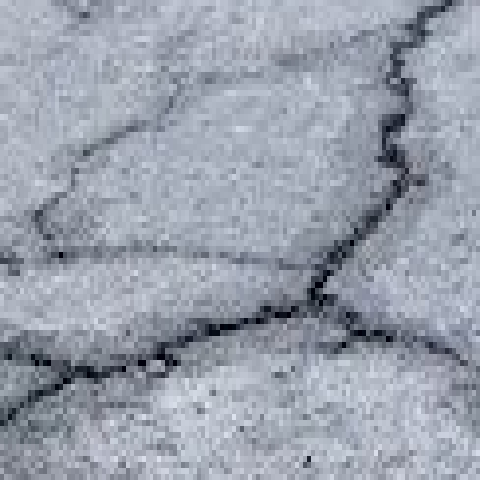

pothole1


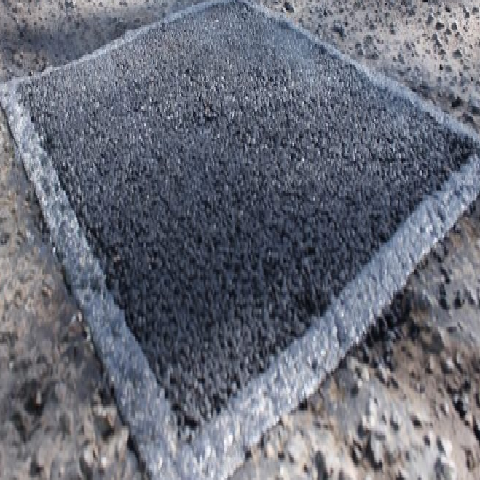

pothole0


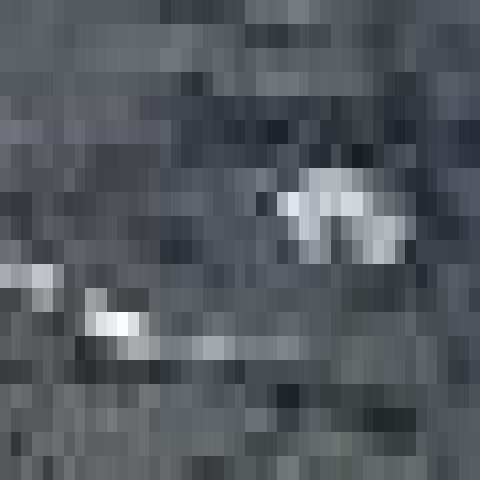

pothole3


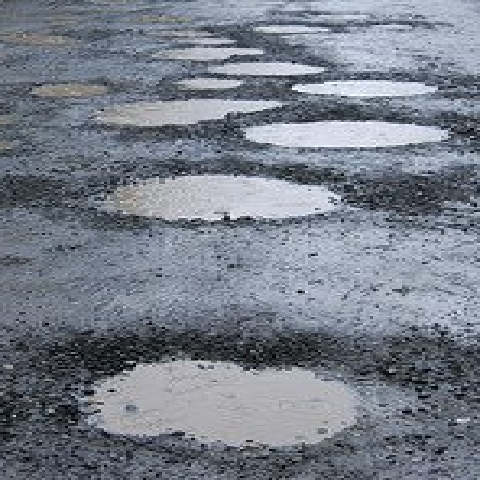

pothole1


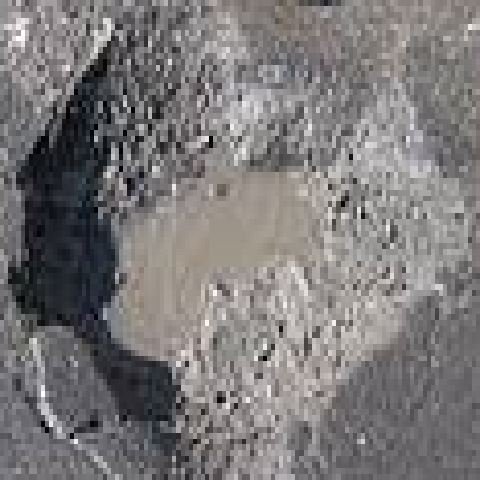

pothole3


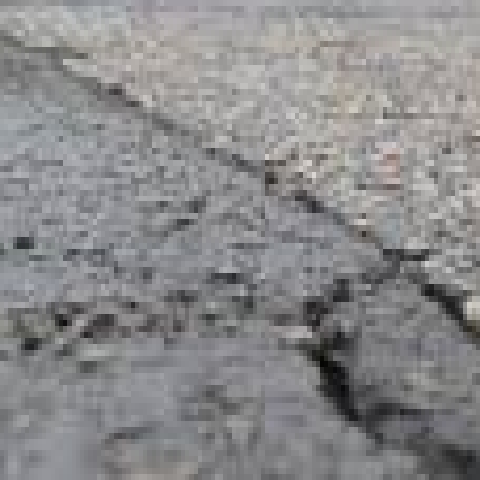

pothole1


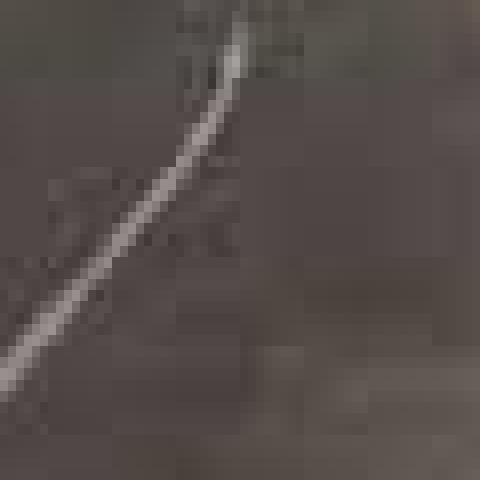

pothole0


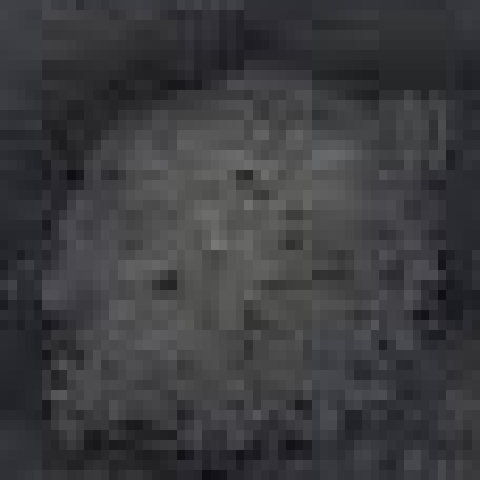

pothole3


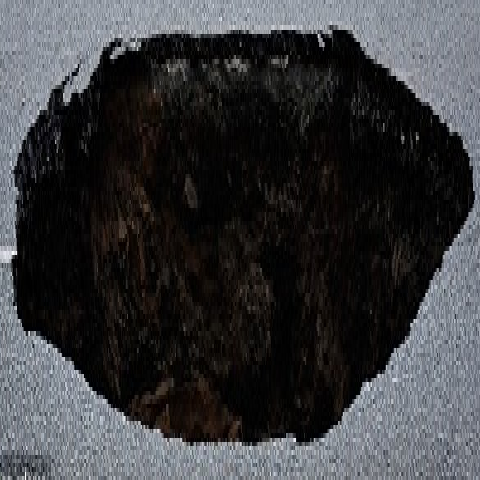

pothole4


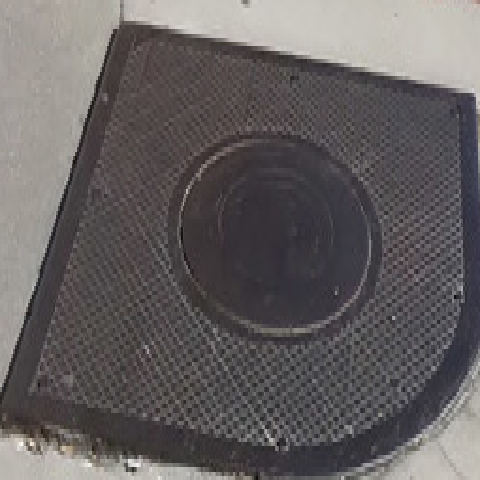

pothole0


In [8]:
import pathlib
import IPython.display as display
from PIL import Image
import os
import random


data_root = pathlib.Path('./')
training_objs = list(data_root.glob('training_objects/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

for i in range(10):
    display.display(display.Image(training_objs[i]))
    print(os.path.basename(training_objs[i])[0:8])

## Prepare testing data

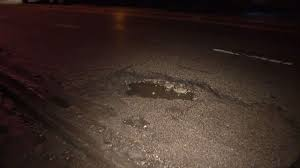

Images\users\kles90105\257_test_data\extra702.jpg


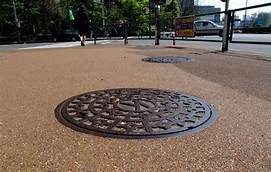

Images\users\kles90105\257_test_data\7n.jpg


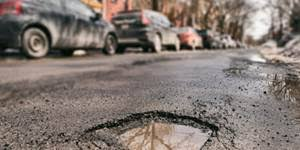

Images\users\kles90105\257_test_data\extra711.jpg


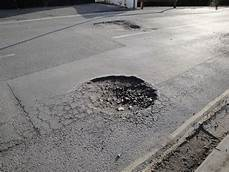

Images\users\kles90105\257_test_data\7p.jpg


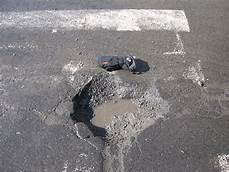

Images\users\kles90105\257_test_data\5p.jpg


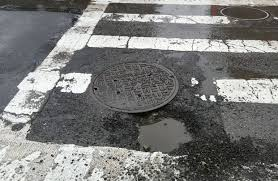

Images\users\kles90105\257_test_data\extra703.jpg


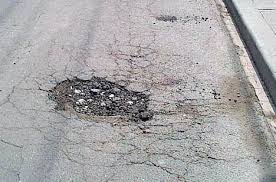

Images\users\kles90105\257_test_data\extra701.jpg


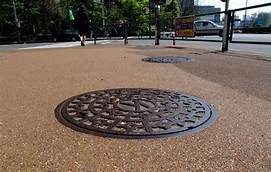

Images\users\kles90105\257_test_data\7n.jpg


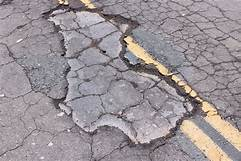

Images\users\kles90105\257_test_data\21p.jpg


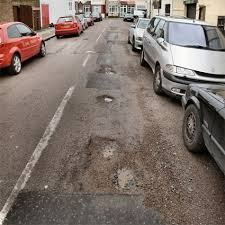

Images\users\kles90105\257_test_data\extra715.jpg


In [9]:
import pathlib
import IPython.display as display
import random

DATADIR = './test_data'
data_root = pathlib.Path(DATADIR)

all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    
for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))


In [10]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    url = './test_data/Images/users/kles90105/257_test_data/' + root.find("./filename").text

    x_list = []
    y_list = []
    i = 0
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(url) 
        outfile = 'testing_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((480, 480)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []


filename : 10n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 212
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:02:42
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 47
y : 51
pt
x : 172
y : 51
pt
x : 172
y : 129
pt
x : 47
y : 129

pothole0
point
47 51
point
172 51
point
172 129
point
47 129
top-left 47 51
bottom-right 172 129

Save as: testing_objects/pothole0-e0b2508e-87e3-4c2b-8f44-c974cb883d4a.png

filename : 10p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 258
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:05:19
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 125
y : 54
pt
x : 168
y : 54
pt
x : 168
y : 76
pt
x : 125
y : 76
object
name : pothole3
dele

Save as: testing_objects/pothole0-a0fdebfa-7c4a-4df6-9c0e-042420134110.png

filename : 17p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:06:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 24
y : 30
pt
x : 158
y : 30
pt
x : 158
y : 92
pt
x : 24
y : 92

pothole3
point
24 30
point
158 30
point
158 92
point
24 92
top-left 24 30
bottom-right 158 92

Save as: testing_objects/pothole3-0b5470f8-295c-4967-91da-761cf54864bd.png

filename : 18n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 900
ncols : 1600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:03:46
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 576
y : 388
pt
x : 1

42 159
top-left 42 53
bottom-right 210 159

Save as: testing_objects/pothole3-f4ae1ce4-7c20-4efe-bb21-a1135b426ee0.png

filename : 27p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 825
ncols : 1100
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:08:39
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 82
y : 256
pt
x : 1005
y : 256
pt
x : 1005
y : 758
pt
x : 82
y : 758

pothole3
point
82 256
point
1005 256
point
1005 758
point
82 758
top-left 82 256
bottom-right 1005 758

Save as: testing_objects/pothole3-b1c75034-4352-4272-bd5a-eb6fe75d78c0.png

filename : 28p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1632
ncols : 1224
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:08:49
id : 0
type : bo

Save as: testing_objects/pothole3-fe8aa6f0-71ad-4a80-ab79-d497e59e9cb2.png

pothole3
point
86 15
point
147 15
point
147 39
point
86 39
top-left 86 15
bottom-right 147 39

Save as: testing_objects/pothole3-7dec6359-2c47-49a5-9455-5c3db6e761c8.png

filename : 8n.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 220
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 20-Apr-2019 19:02:31
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 72
y : 119
pt
x : 161
y : 119
pt
x : 161
y : 156
pt
x : 72
y : 156

pothole0
point
72 119
point
161 119
point
161 156
point
72 156
top-left 72 119
bottom-right 161 156

Save as: testing_objects/pothole0-04676b03-7c31-40b5-92c1-013f909679ae.png

filename : 8p.jpg
folder : users/kles90105//257_test_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 388
object
name : pothole3
deleted : 0
verified : 

Save as: testing_objects/pothole2-2aa67115-4f26-4a96-a61b-b3446674a6ed.png

filename : extra709.jpg
folder : users/robert4213//pothole_data/extra2
source
submittedBy : Shiyan Cai
imagesize
nrows : 194
ncols : 259
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:50:22
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 83
y : 113
pt
x : 146
y : 113
pt
x : 146
y : 133
pt
x : 83
y : 133
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 10-May-2019 03:50:26
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 5
y : 137
pt
x : 190
y : 137
pt
x : 190
y : 186
pt
x : 5
y : 186

pothole3
point
83 113
point
146 113
point
146 133
point
83 133
top-left 83 113
bottom-right 146 133

Save as: testing_objects/pothole3-7edc1d44-76af-4649-8192-e9537a32cf7d.png

pothole3
point
5 137
point
190 137
point
190 186
point
5 18

filename : pothole_neg3.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 400
ncols : 600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:42:51
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 219
y : 120
pt
x : 385
y : 120
pt
x : 385
y : 174
pt
x : 219
y : 174

pothole0
point
219 120
point
385 120
point
385 174
point
219 174
top-left 219 120
bottom-right 385 174

Save as: testing_objects/pothole0-007b958e-d2c0-4c9b-b21a-0ba485a438e6.png

filename : pothole_neg5.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1200
ncols : 1600
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 20:42:56
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 236
y : 288
pt
x : 1230
y : 288
pt
x : 1230
y : 1093
pt
x : 236
y : 

top-left 525 236
bottom-right 749 354

Save as: testing_objects/pothole3-23ff5aa5-dbf7-49ef-be56-fac186e3056b.png

pothole3
point
623 196
point
502 196
point
502 146
point
623 146
top-left 502 146
bottom-right 623 196

Save as: testing_objects/pothole3-35dff006-6619-4cf3-a2bb-bdeead082bf1.png

pothole2
point
461 382
point
258 382
point
258 273
point
461 273
top-left 258 273
bottom-right 461 382

Save as: testing_objects/pothole2-fa0c905a-833c-40a1-8bd7-c7378171e0e0.png

filename : pothole_pos158.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 199
ncols : 300
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:46:33
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 193
y : 135
pt
x : 76
y : 135
pt
x : 76
y : 85
pt
x : 193
y : 85

pothole3
point
193 135
point
76 135
point
76 85
point
193 85
top-left 76 85
bottom-right 193 135

Save as: testing_ob

filename : pothole_pos169.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 360
ncols : 540
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:48:12
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 483
y : 323
pt
x : 103
y : 323
pt
x : 103
y : 147
pt
x : 483
y : 147

pothole2
point
483 323
point
103 323
point
103 147
point
483 147
top-left 103 147
bottom-right 483 323

Save as: testing_objects/pothole2-8adb4c9a-ea3c-47e1-9077-6d70d617e77e.png

filename : pothole_pos170.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 682
ncols : 1023
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:48:30
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 998
y : 653
pt
x : 52
y : 653
pt
x : 52
y : 65
pt
x : 998
y : 65


Save as: testing_objects/pothole1-bf8f4b00-9bba-421b-920a-38d6fd3cacdf.png

filename : pothole_pos176.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 200
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:28
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 195
y : 270
pt
x : 3
y : 270
pt
x : 3
y : 6
pt
x : 195
y : 6

pothole1
point
195 270
point
3 270
point
3 6
point
195 6
top-left 3 6
bottom-right 195 270

Save as: testing_objects/pothole1-fcb97ecc-626a-4d53-b599-097a5517de49.png

filename : pothole_pos177.jpg
folder : users/kles90105//extra_data
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 350
ncols : 350
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 02-May-2019 23:53:33
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 333
y : 33